In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sea
from math import pi
import numpy as np
import plotly.express as px
from scipy import stats


df = pd.read_csv('supermarket_updated.csv')

In [2]:
#Data Cleaning
#remove any invalid elements 
df.dropna()


#Remove any columns that are irrelevant to our analysis such as invoice id, tax, n gross margin percentage
df.drop(['Invoice ID', 'Tax 5%', 'City', 'gross margin percentage'], axis = 1, inplace = True)



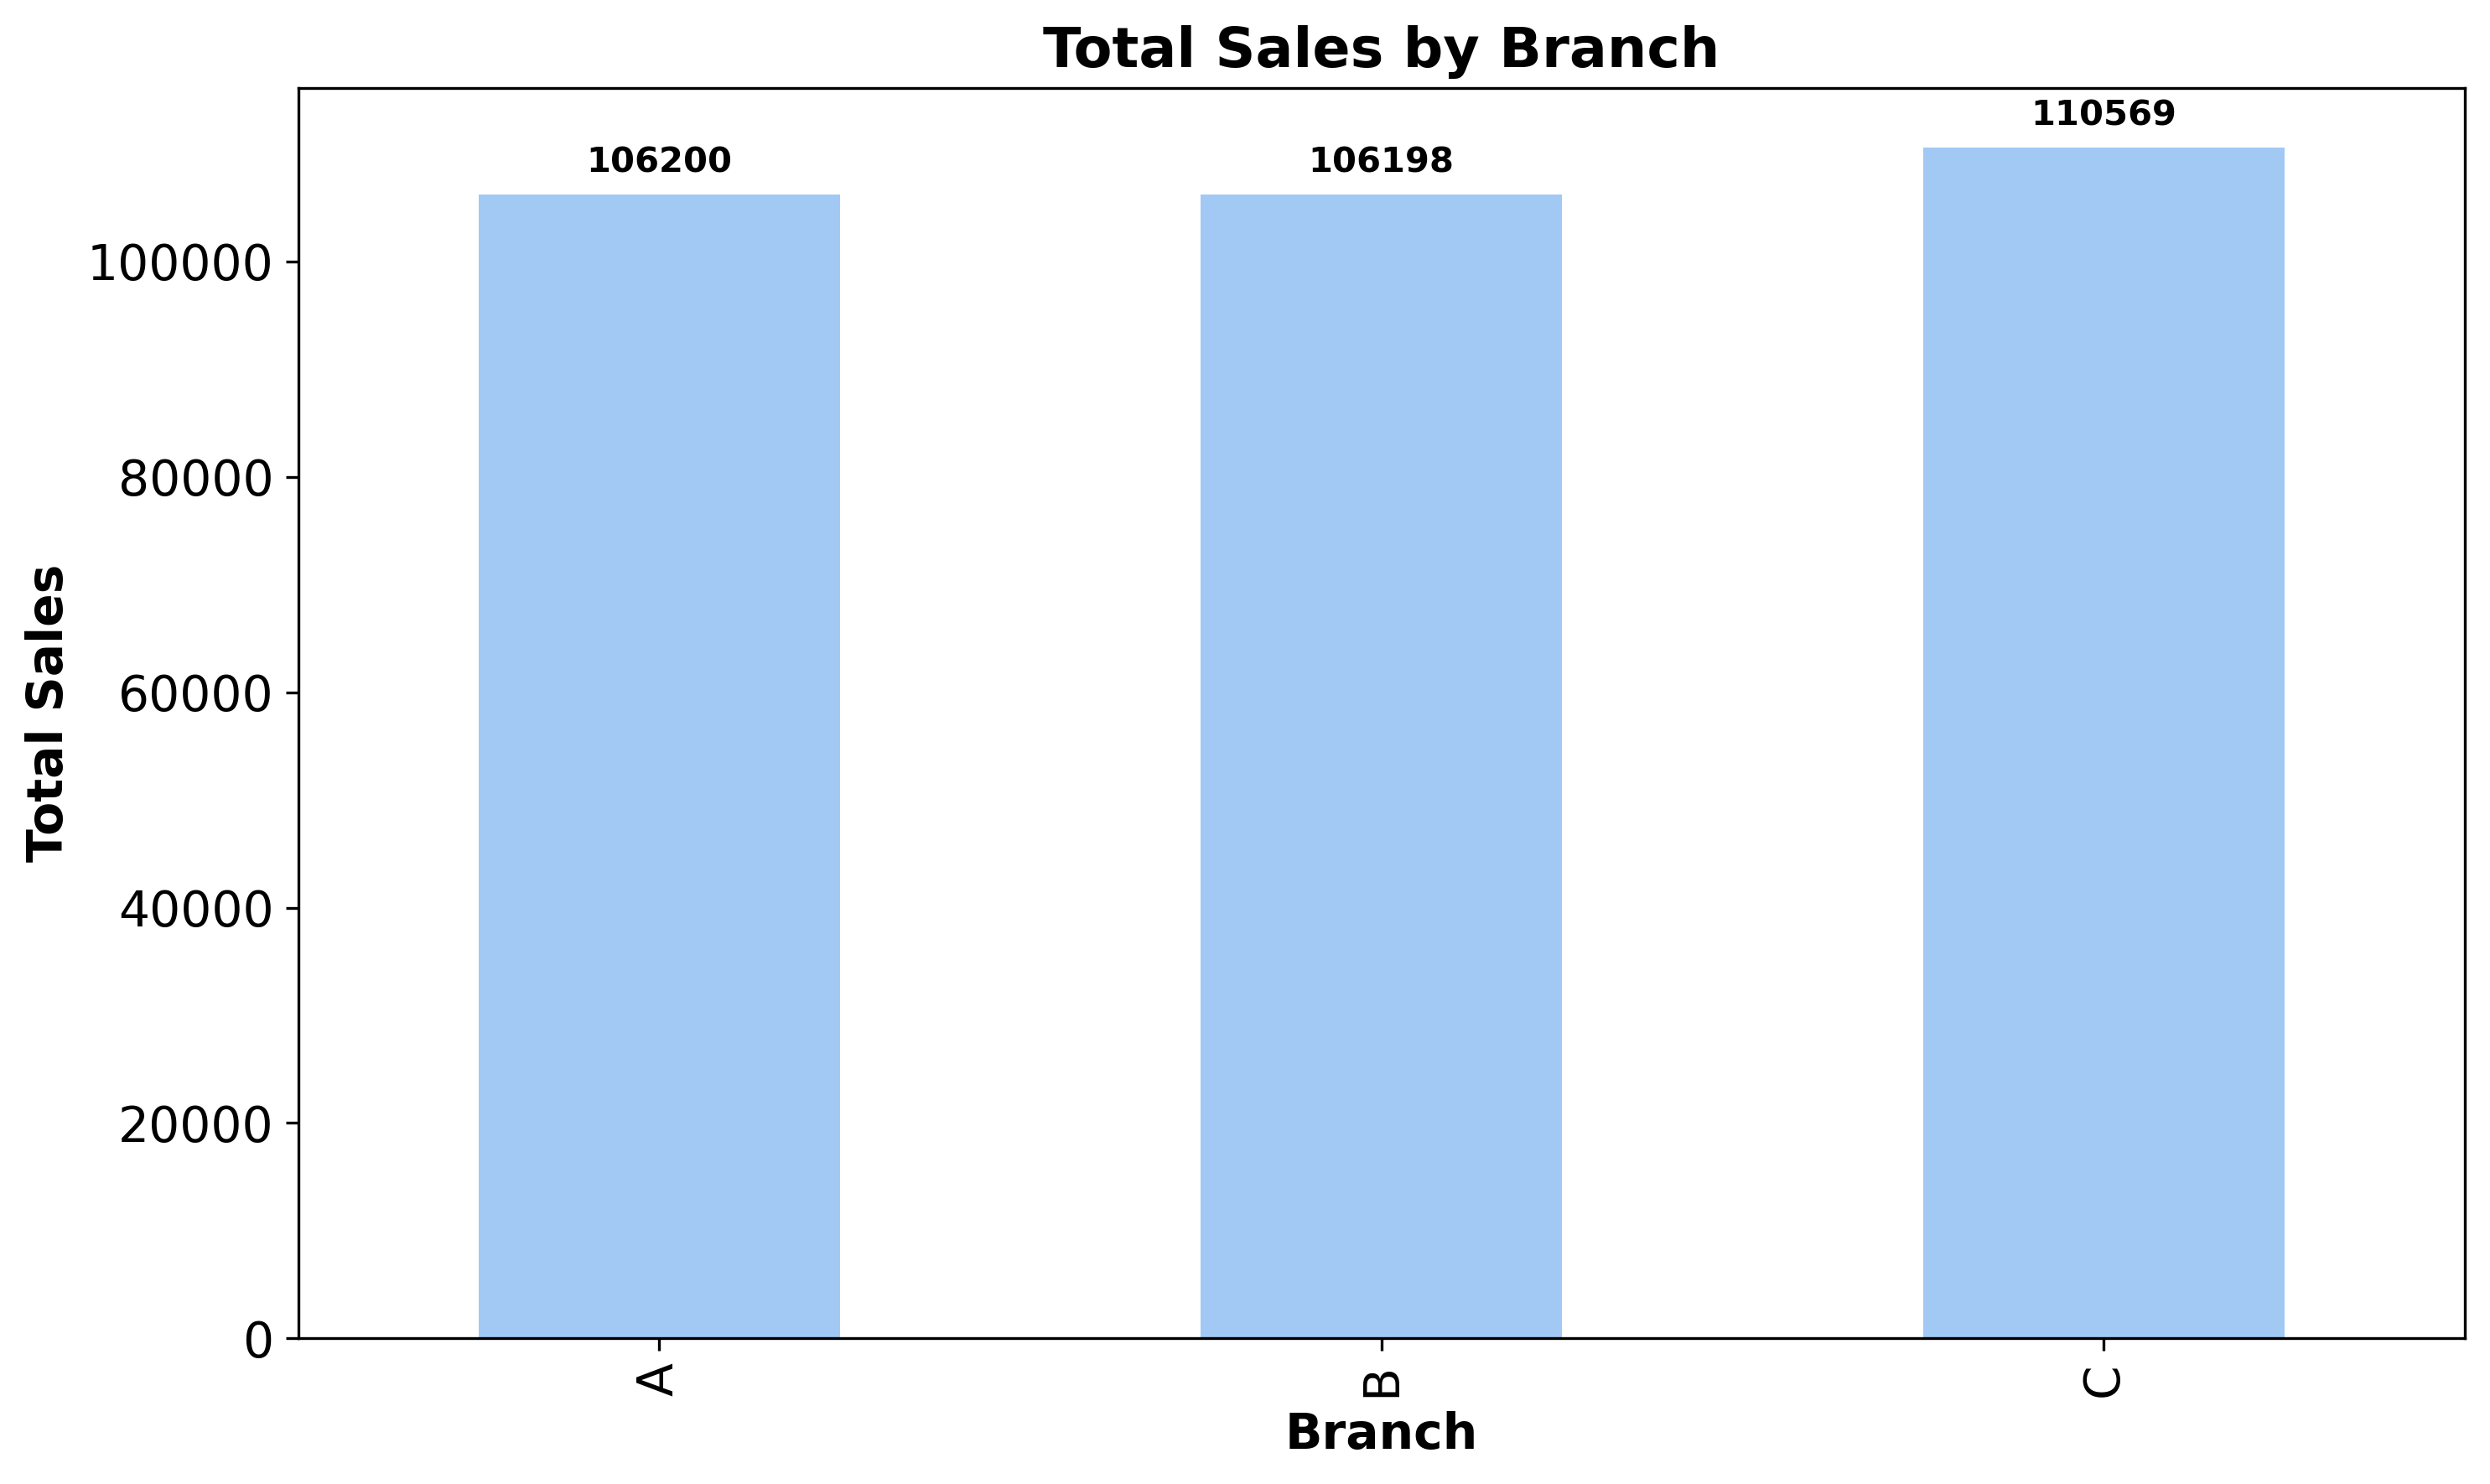

In [3]:
#We look at which is the most profitable branch
sales_by_branch = df.groupby('Branch')['Total'].sum()

branch_order = ['A', 'B', 'C']
sales_by_branch = sales_by_branch.reindex(branch_order)
sea.set_palette('pastel')

# Plotting the total sales for each branch
plt.figure(figsize=(10, 6), dpi = 300)
bar = sales_by_branch.plot(kind = 'bar', fontsize=14 , title = 'Total Sales by Branch')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Branch', fontsize=14, fontweight='bold')
plt.xticks()
plt.title('Total Sales by Branch', fontsize = 16, fontweight = 'bold')

#Add data labels on the bars:
for i in bar.patches:
    bar.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points',
                fontweight = 'semibold')

plt.tight_layout()
plt.show()

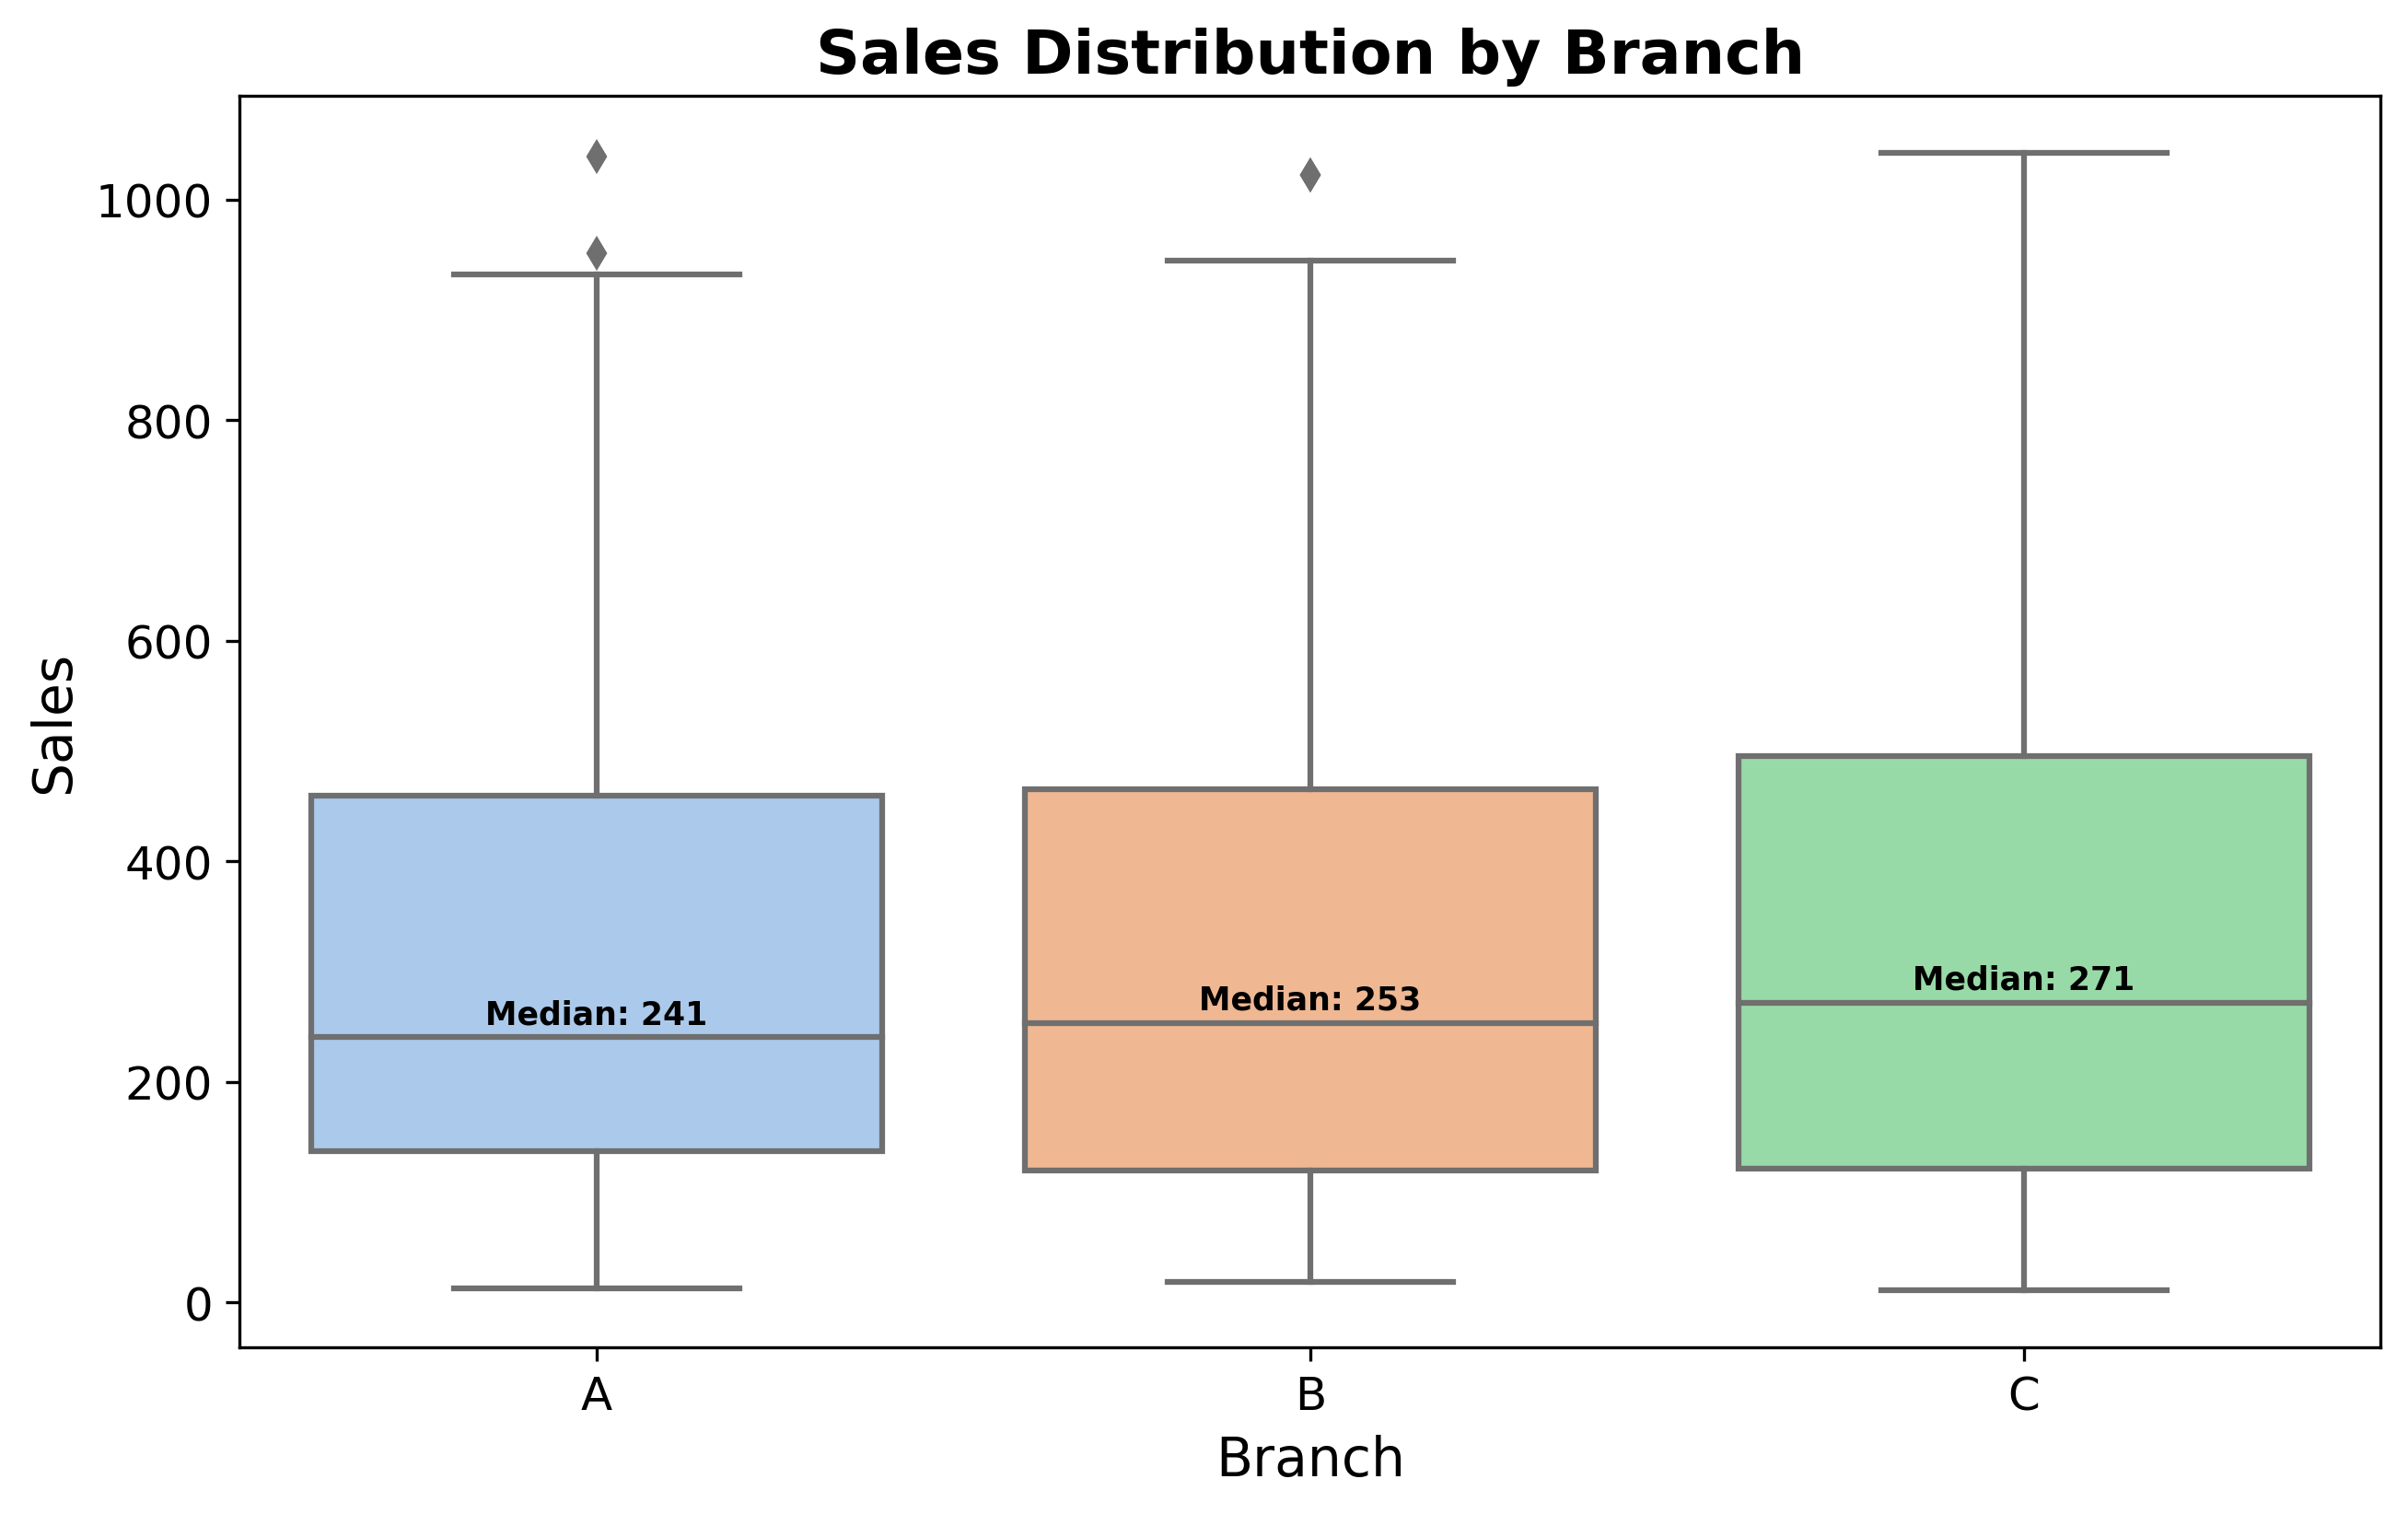

In [4]:
#Showing the average sales performance by city, shows that C has the least outliers, and greatest median so it should be the 
#branch that we focus on 
total_sales_by_branch = df.groupby('Branch')['Total'].sum()

plt.figure(figsize=(10, 6), dpi = 300)
box = sea.boxplot(x = 'Branch', y= 'Total', data = df, order = branch_order)

#Calculate and show the median values on the plot
for i, branch in enumerate(branch_order):
    median_val = df[df['Branch'] == branch]['Total'].median()
    median_val = round(median_val)
    box.text(i, median_val * 1.05, f'Median: {median_val}', ha = 'center', size = 'small', color = 'black', weight = 'semibold')
    
plt.title('Sales Distribution by Branch', fontsize = 16, fontweight = 'bold')
plt.xlabel('Branch', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

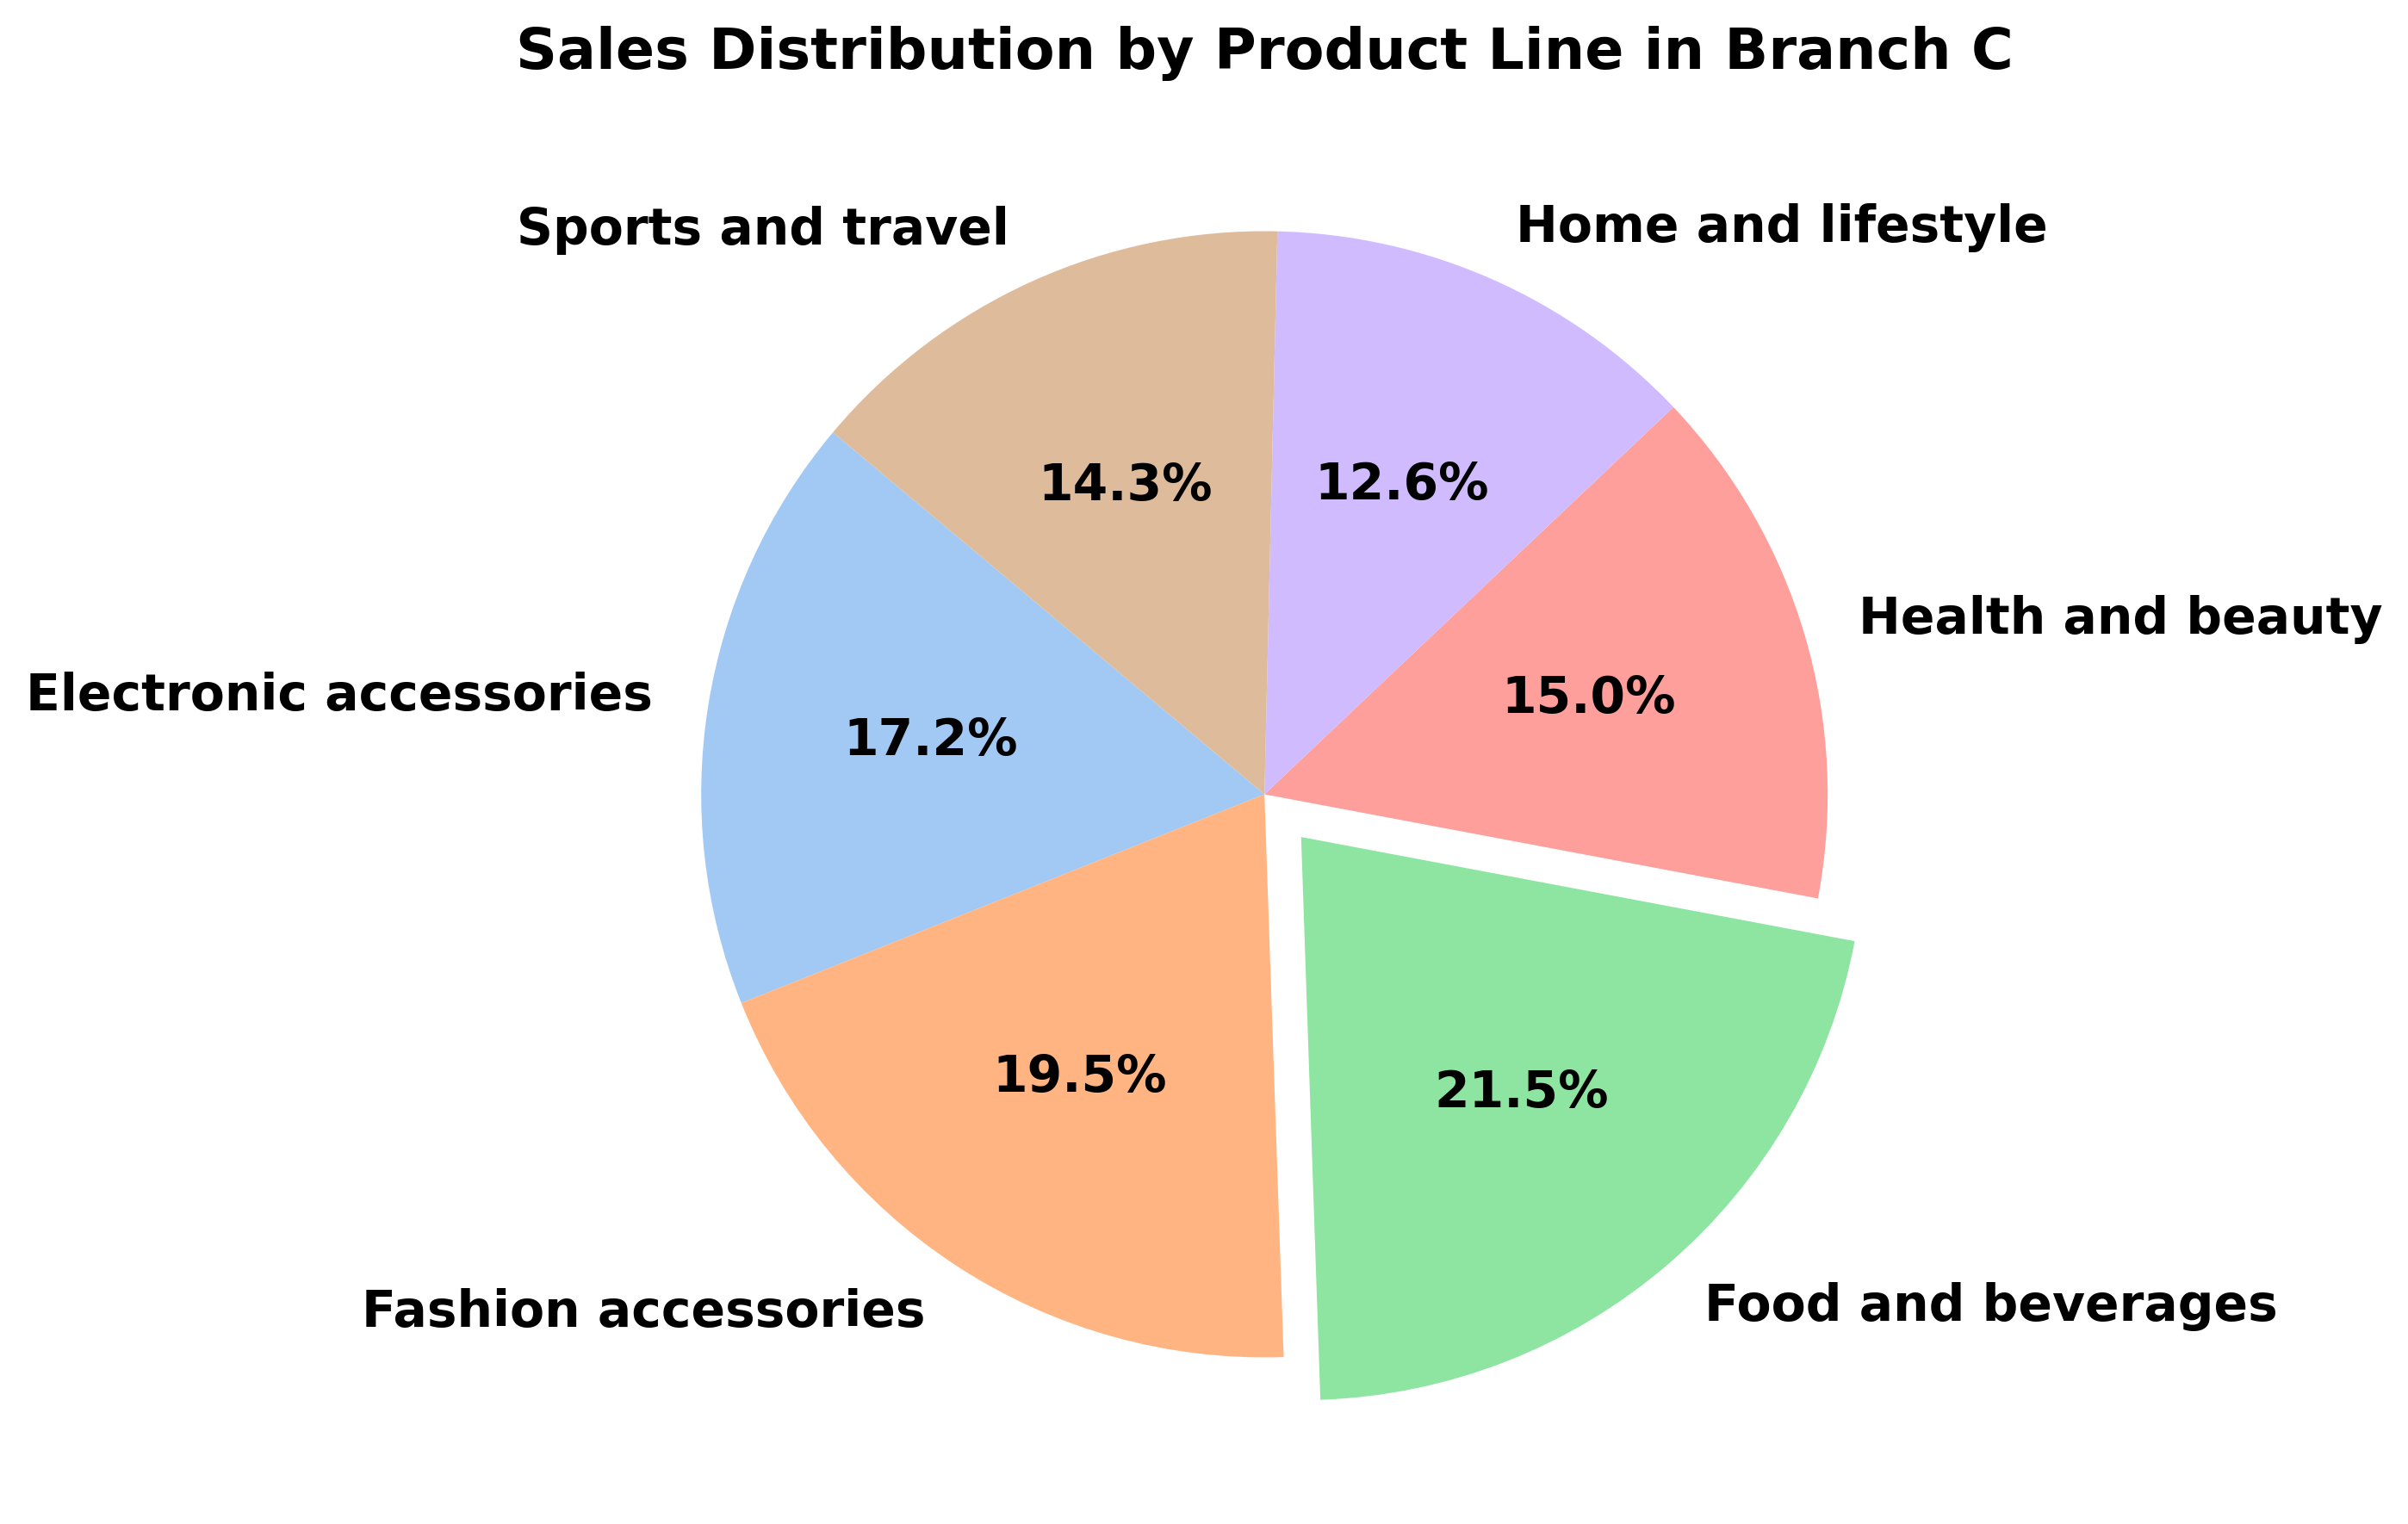

In [5]:
#I want to find out the best product line for Branch C, I will compare it via total sales 

branch_c_data = df[df['Branch'] == 'C']

product_line_sales = branch_c_data.groupby('Product line')['Total'].sum()

plt.figure(figsize = (10, 6), dpi = 300)

#find the maximum value in the product line to explode it out the pie
max_product_line = product_line_sales.idxmax()

explode = []

for i in product_line_sales.index:
    if i == max_product_line:
        explode.append(0.1)
    else:
        explode.append(0)

plt.pie(product_line_sales, labels = product_line_sales.index, autopct='%1.1f%%', startangle= 140, explode = explode, 
        textprops={'fontsize': 14, 'fontweight': 'semibold'})
plt.title('Sales Distribution by Product Line in Branch C', fontsize=16, fontweight='semibold')
plt.tight_layout()
plt.show()

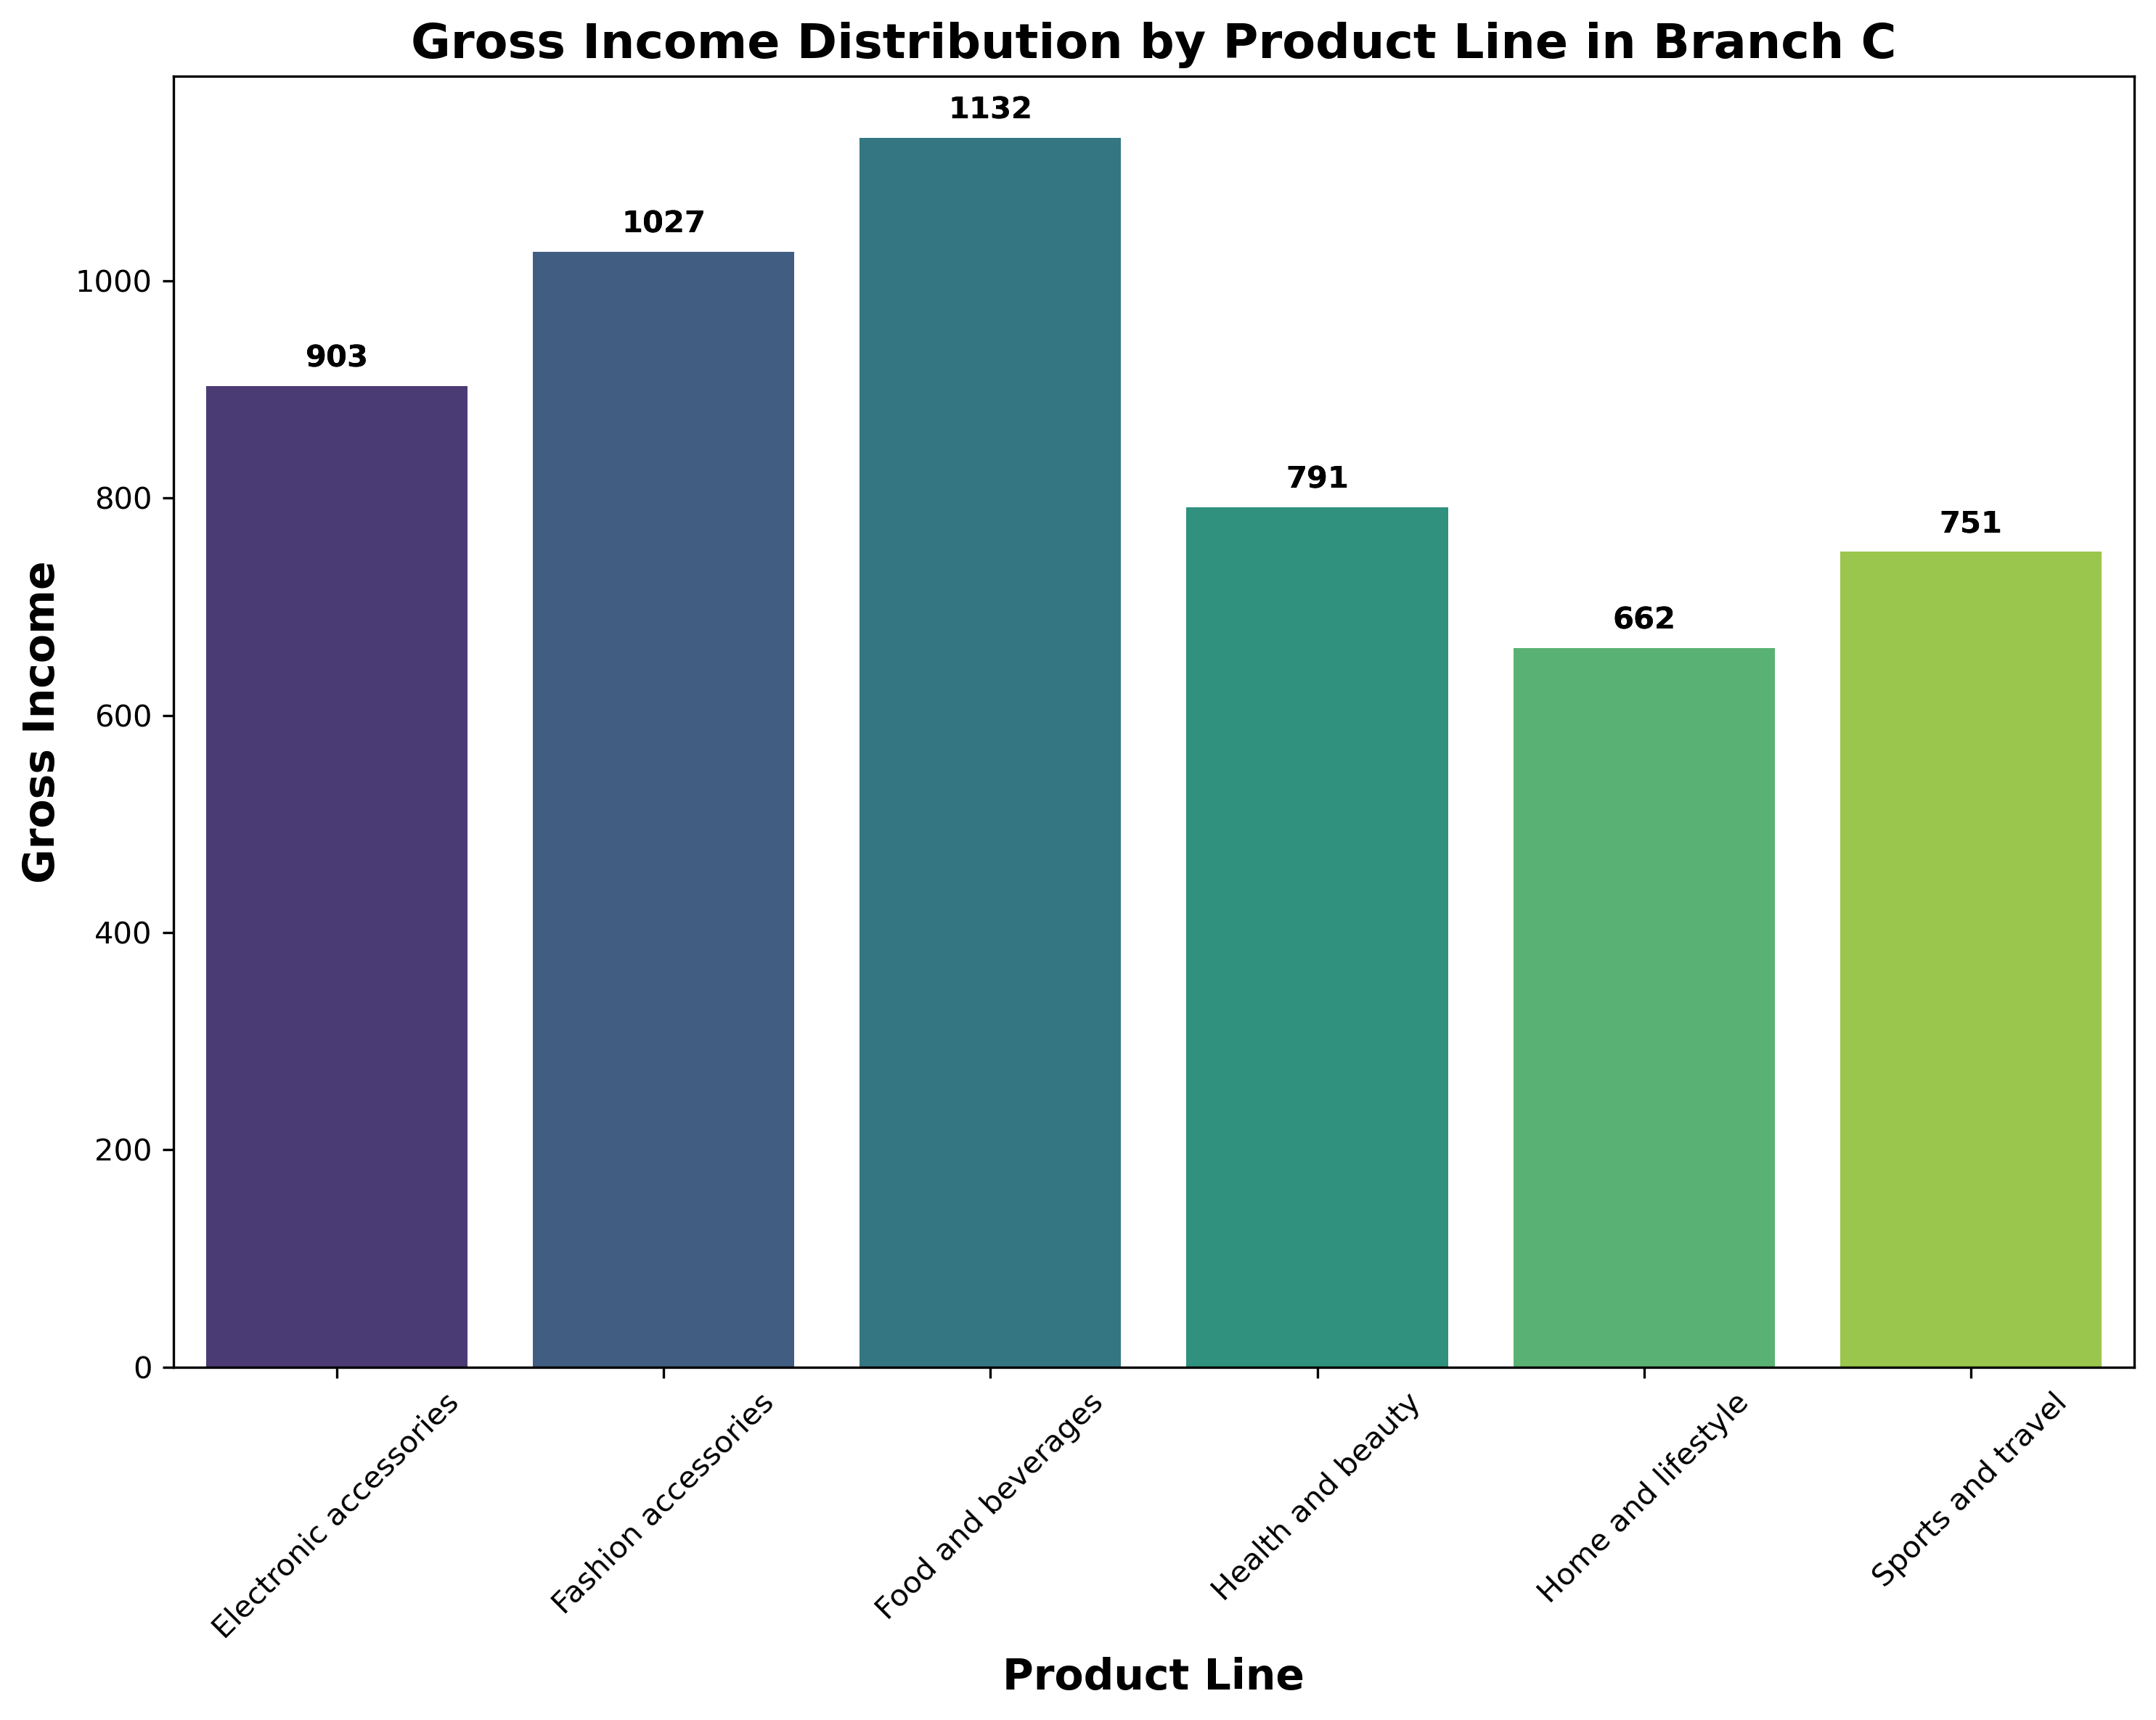

In [6]:
#I want to find out the best product line for Branch C, I will compare it via Gross Income

product_line_sales = branch_c_data.groupby('Product line')['gross income'].sum()

plt.figure(figsize=(10, 8), dpi=300)

# Use seaborn cuz i like the colors lol
sea.barplot(x=product_line_sales.index, y=product_line_sales.values)

palette = sea.color_palette("viridis", len(product_line_sales))

gross_bar = sea.barplot(x = product_line_sales.index, y = product_line_sales.values, palette = palette)

#Add data labels on the bars:
for i in gross_bar.patches:
    gross_bar.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points',
                fontweight = 'semibold')

plt.title('Gross Income Distribution by Product Line in Branch C', fontsize=16, fontweight='semibold')
plt.xlabel('Product Line', fontsize=14, fontweight='semibold')
plt.ylabel('Gross Income', fontsize=14, fontweight='semibold')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

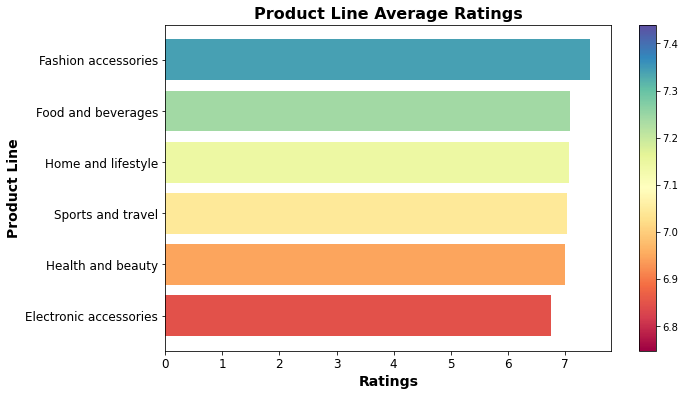

In [7]:
# Calculate the average rating for each product line in Branch C
avg_rating_per_product_line = branch_c_data.groupby('Product line')['Rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(avg_rating_per_product_line.index, avg_rating_per_product_line.values, color = sea.color_palette("Spectral", len(avg_rating_per_product_line)))

#Create the color map on the side 
sm = plt.cm.ScalarMappable(cmap = "Spectral", norm = plt.Normalize(vmin = min(avg_rating_per_product_line.values), vmax = max(avg_rating_per_product_line.values)))
sm.set_array([])
plt.colorbar(sm)

plt.title('Product Line Average Ratings', fontsize=16, fontweight = 'bold')
plt.xlabel('Ratings', fontsize=14, fontweight = 'bold')
plt.ylabel('Product Line', fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


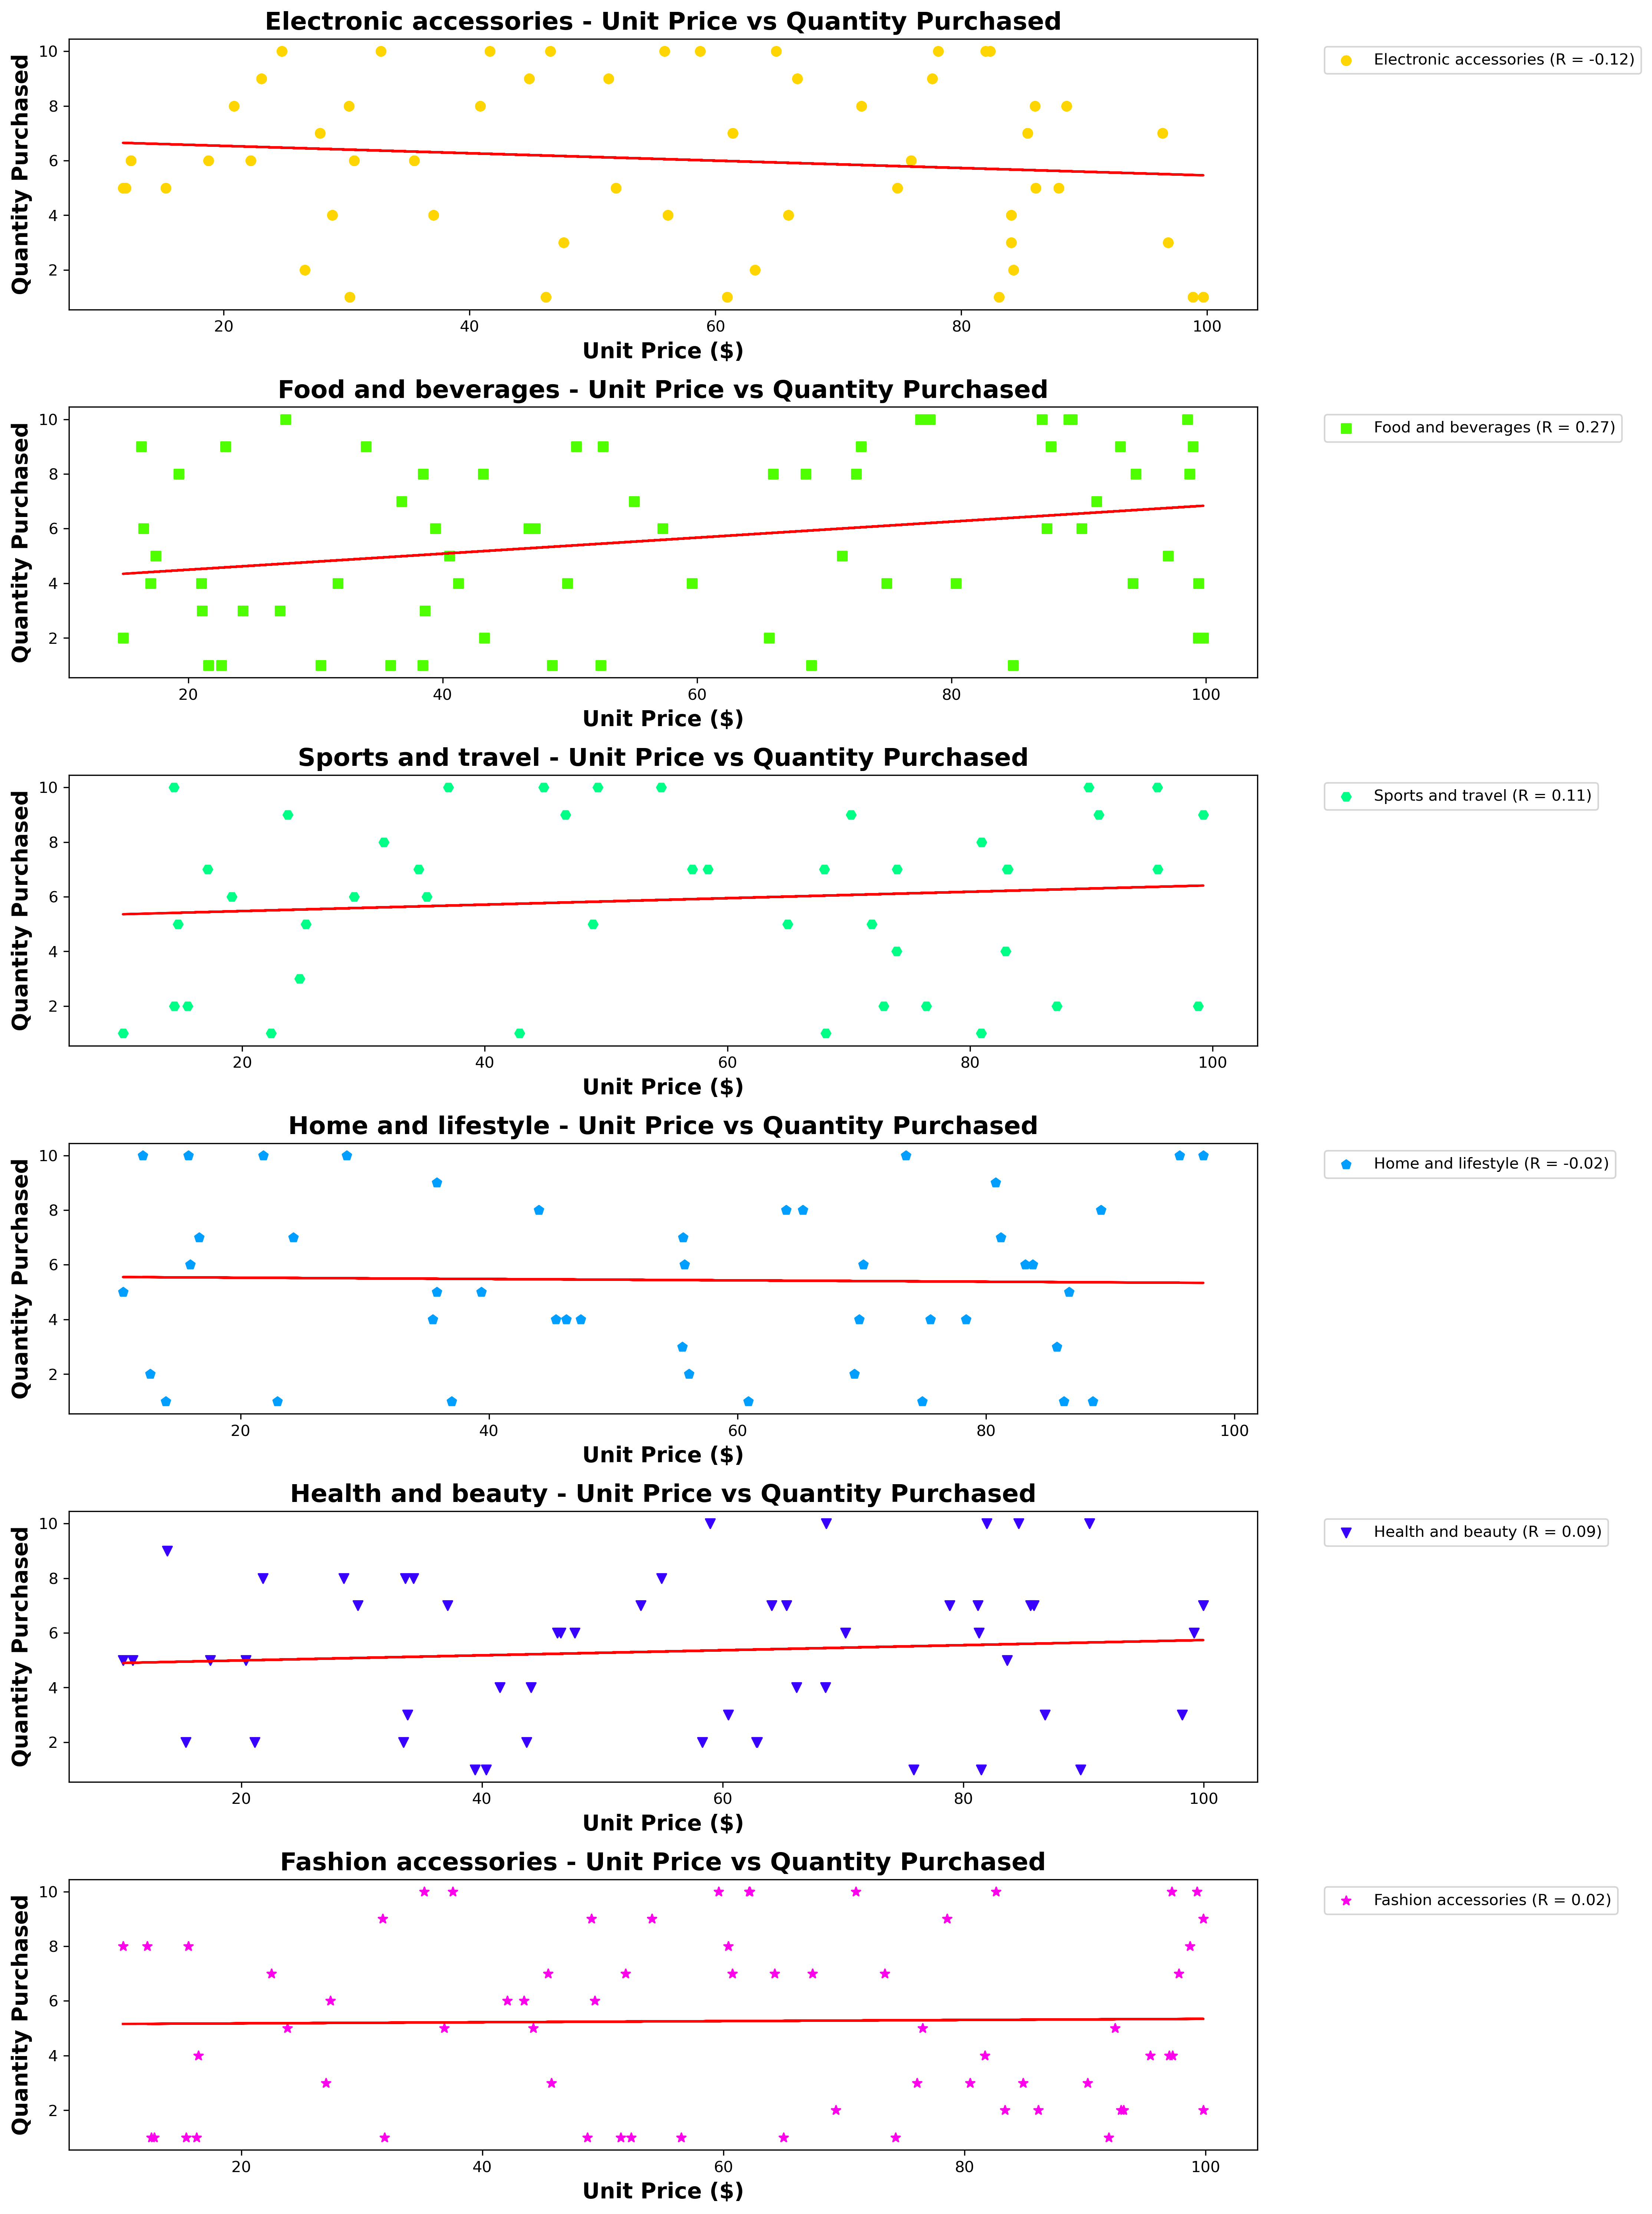

In [8]:
#I want to find the relationship between the price and the quantity purchased for each product line in branch C

# Get unique product lines
product_lines = branch_c_data['Product line'].unique()

plt.figure(figsize=(15, 20), dpi = 300)

marker_1 = ['o', 's', 'H', 'p', 'v', '*']

colors = sea.color_palette('hsv', len(product_lines))

# Create a scatter plot for each product line
for i, product_line in enumerate(product_lines, start = 1):
    # Filter the data for the current product line
    product_data = branch_c_data[branch_c_data['Product line'] == product_line]

    # Calculate the R value
    correlation = np.corrcoef(product_data['Unit price'], product_data['Quantity'])[0, 1]
    
    # Calculate the best fit line 
    slope, intercept, r_value, p_value, std_err = stats.linregress(product_data['Unit price'], product_data['Quantity'])

    # Create a subplot for each product line
    plt.subplot(len(product_lines), 1, i)
    plt.scatter(product_data['Unit price'], product_data['Quantity'], marker = marker_1[i - 1], color = colors[i - 1], label = f'{product_line} (R = {r_value:.2f})')

    # Plot the best fit line
    line = slope * product_data['Unit price'] + intercept
    plt.plot(product_data['Unit price'], line, color = 'red')
  
    plt.title(f'{product_line} - Unit Price vs Quantity Purchased', fontsize=16, fontweight = 'bold')
    plt.xlabel('Unit Price ($)', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Quantity Purchased', fontsize = 14, fontweight = 'bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')

plt.tight_layout()
plt.show()


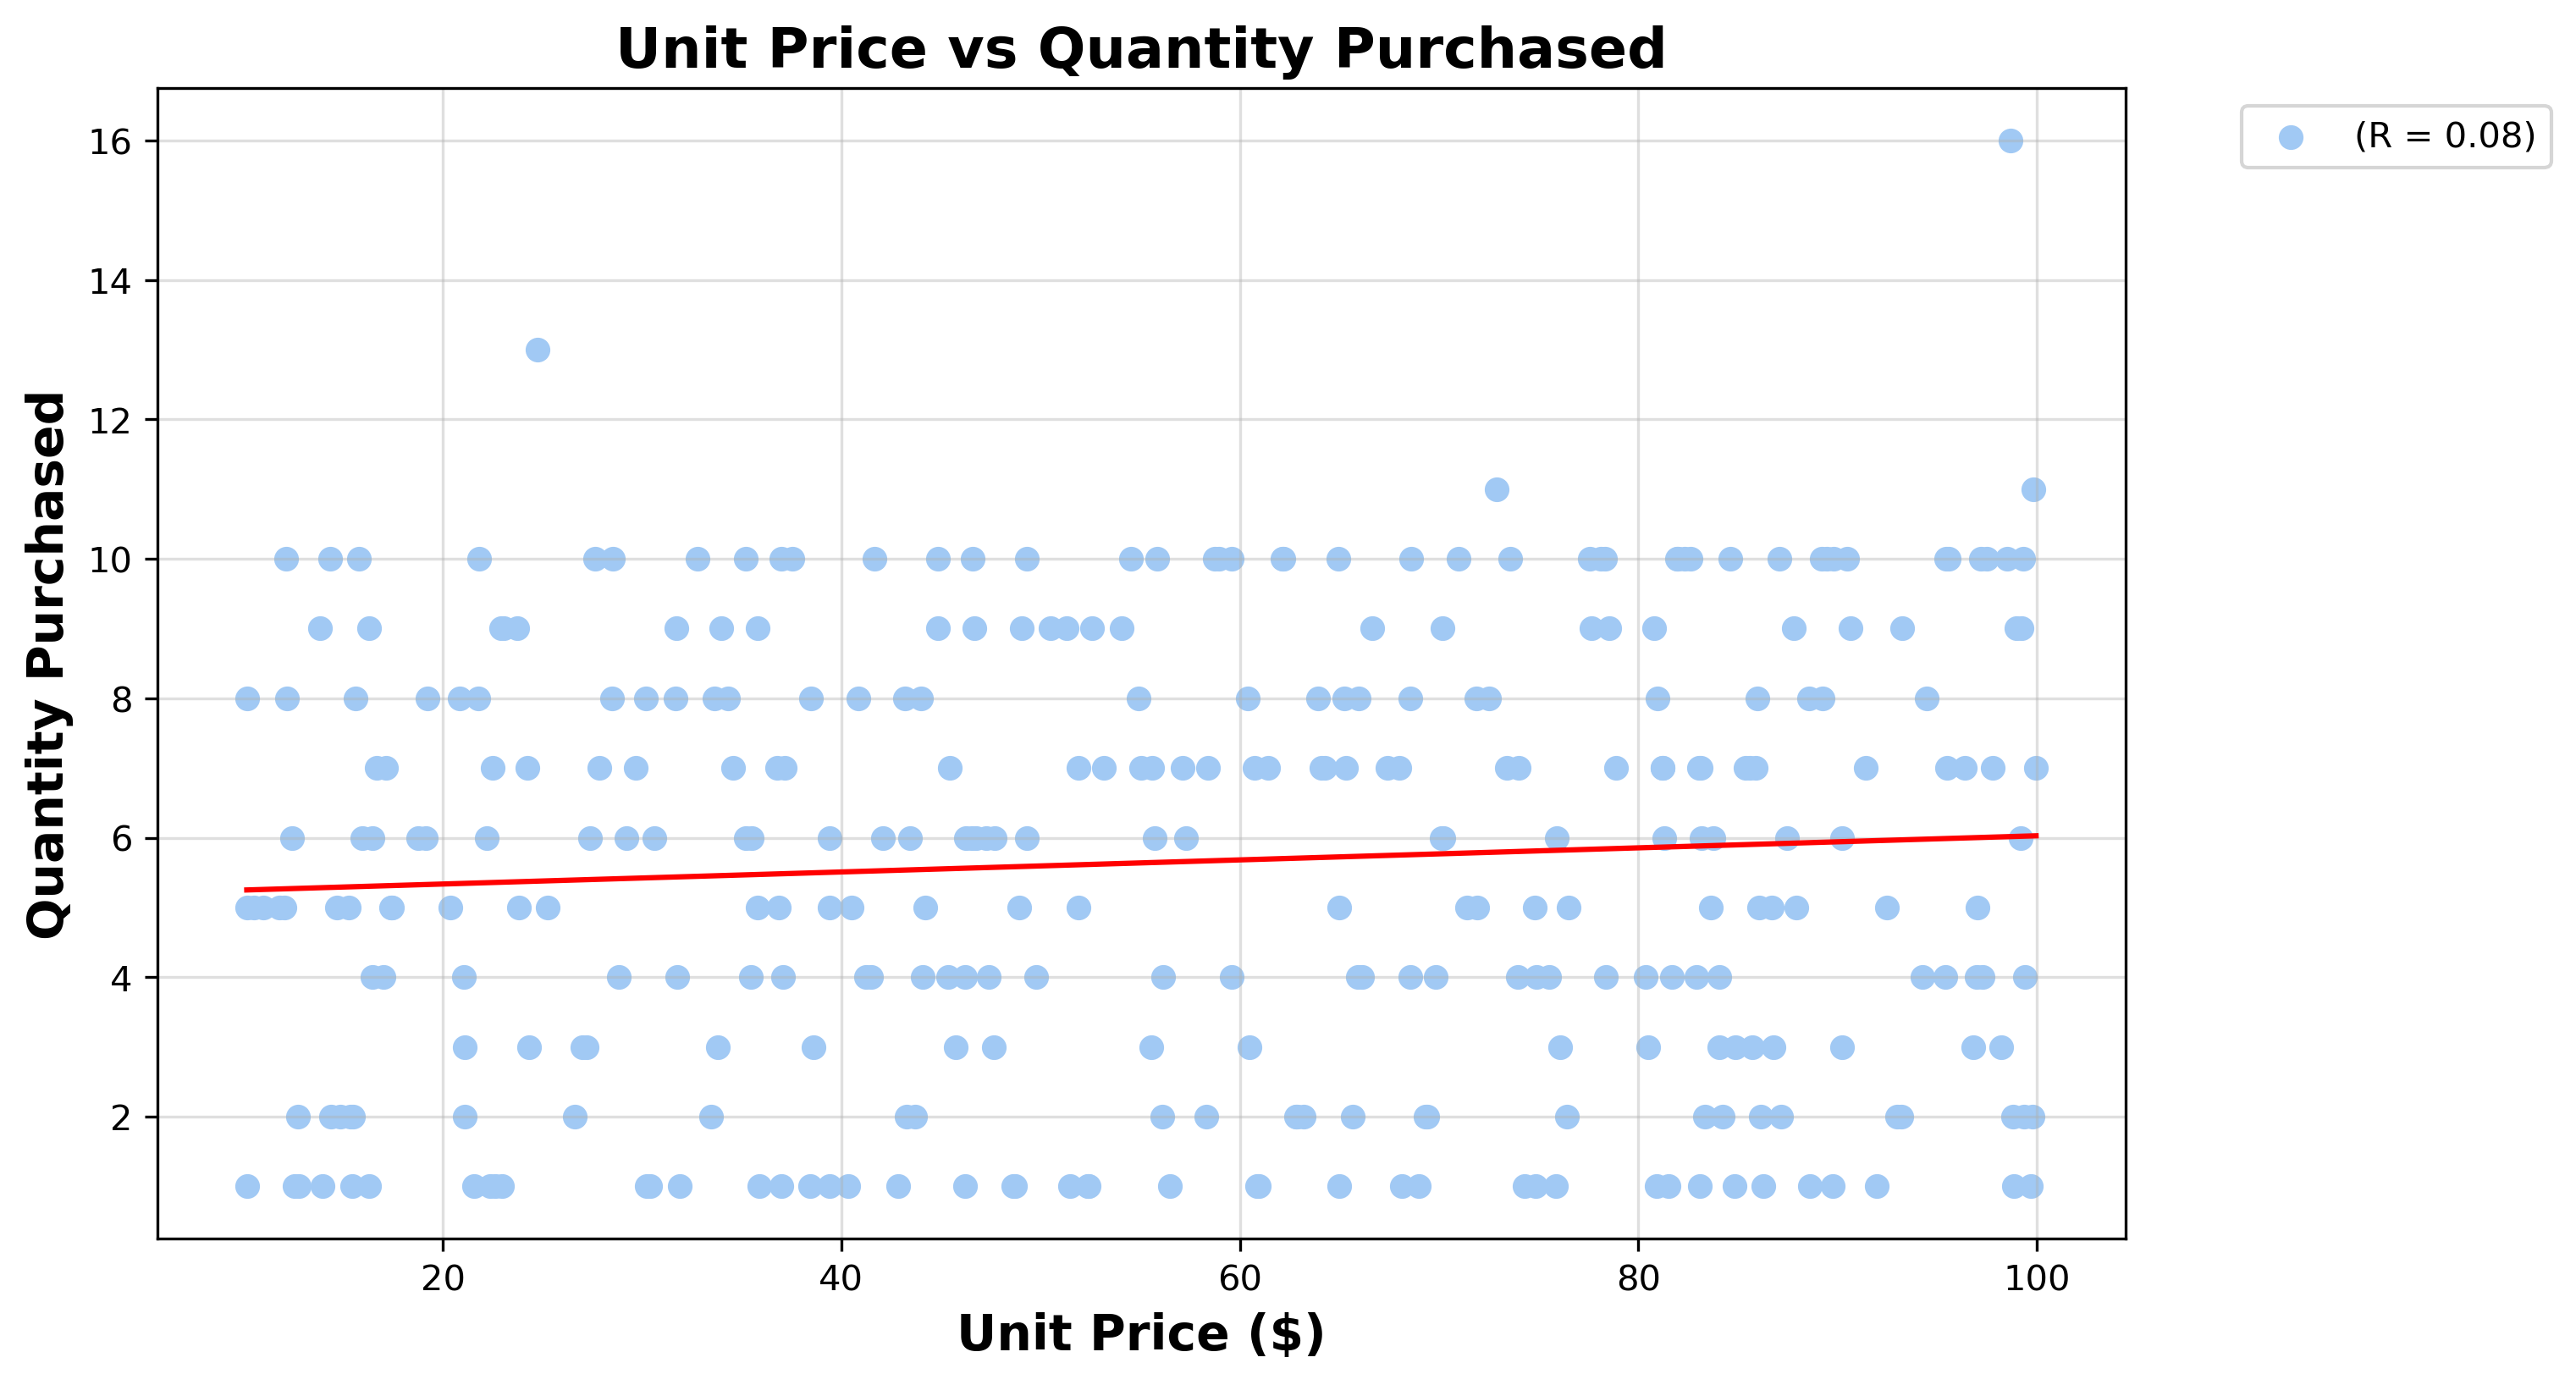

In [9]:
product_lines = branch_c_data.groupby('Unit price')['Quantity'].sum().reset_index()

slope, intercept, r_value, p_value, std_err = stats.linregress(product_lines['Unit price'], product_lines['Quantity'])
line = slope * product_lines['Unit price'] + intercept

plt.figure(figsize = (10, 6), dpi = 300)
plt.plot(product_lines['Unit price'], line, color='red')
plt.scatter(product_lines['Unit price'], product_lines['Quantity'], label= f'(R = {r_value:.2f})')
plt.title( 'Unit Price vs Quantity Purchased', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unit Price ($)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Quantity Purchased', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.grid(alpha = 0.4)
plt.show()

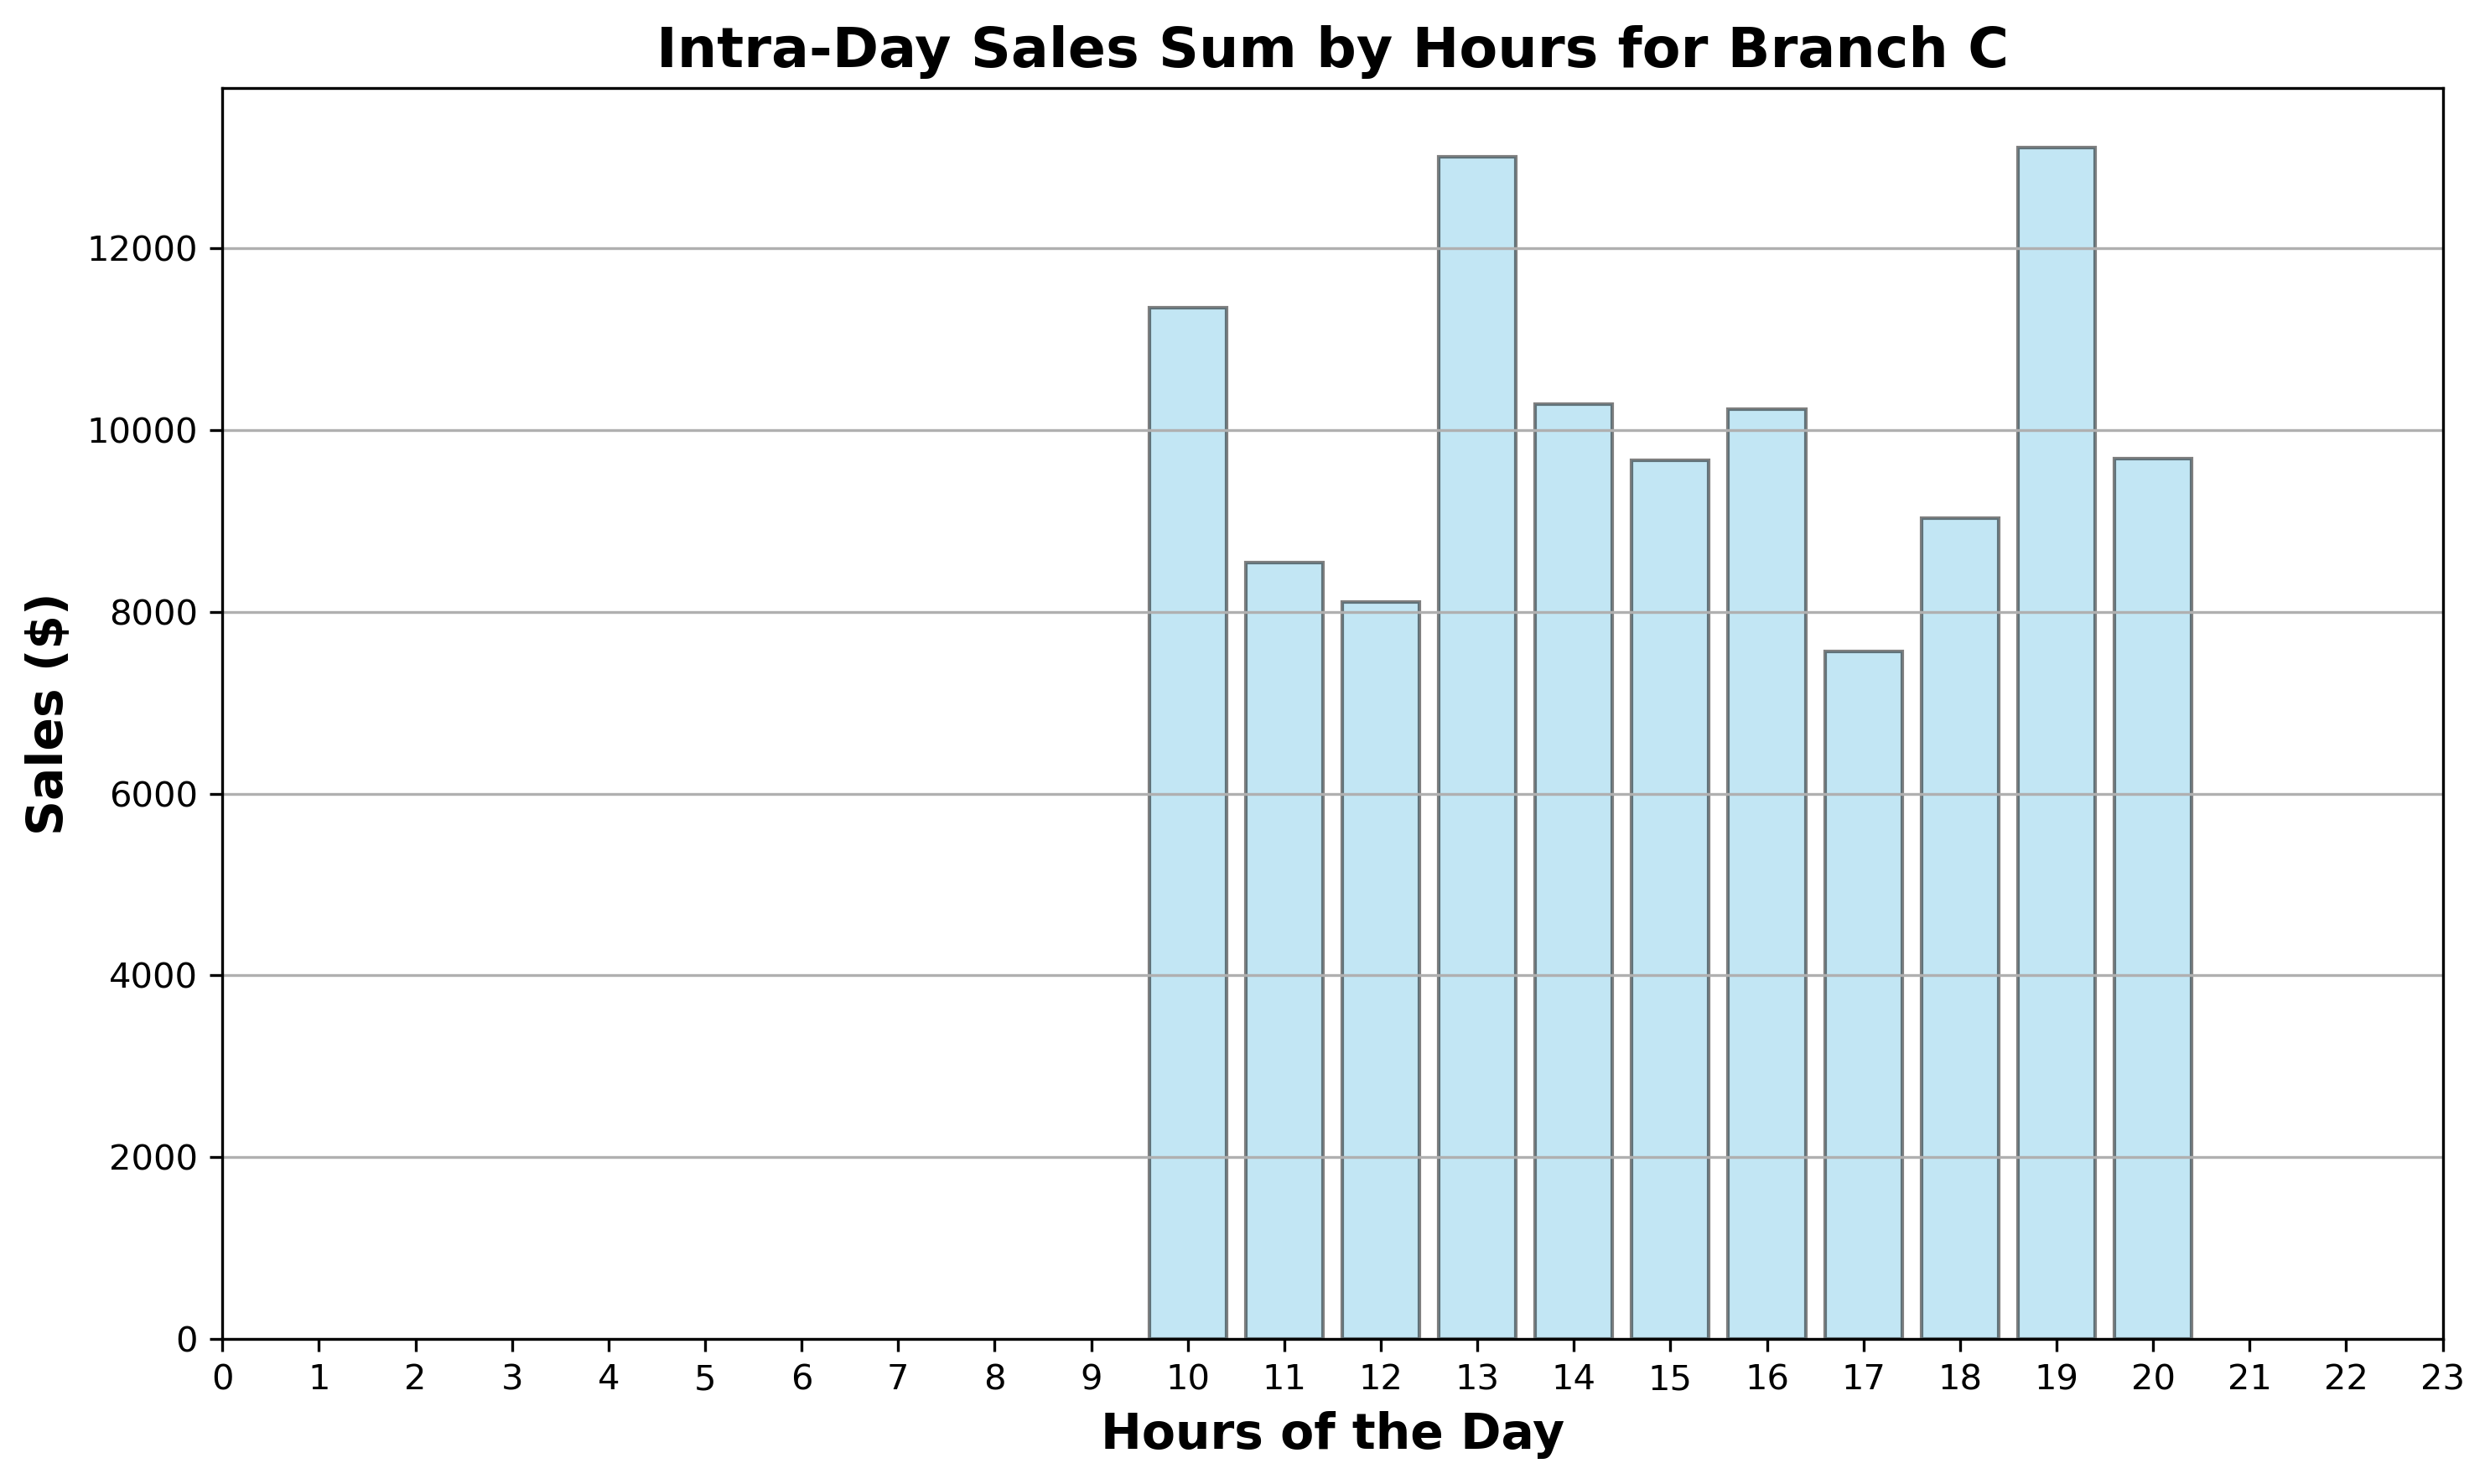

In [10]:
#I want to find out the intra day sales to see which time is the busiest 

branch_c_data = df[df['Branch'] == 'C'].copy()
branch_c_data['Hour'] = pd.to_datetime(branch_c_data['Time'], format='%H:%M').dt.hour

hourly_counts = branch_c_data.groupby("Hour")['Total'].sum()
plt.figure(figsize=(10, 6), dpi = 300)
plt.bar(hourly_counts.index, hourly_counts.values, color = 'skyblue', alpha = 0.5, edgecolor = 'black')

plt.title('Intra-Day Sales Sum by Hours for Branch C',  fontsize = 16, fontweight = 'bold')
plt.xlabel('Hours of the Day',  fontsize = 14, fontweight = 'bold')
plt.ylabel('Sales ($)', fontsize = 14, fontweight = 'bold')
plt.xticks(range(0, 24), rotation = 0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
branch_c_data.head()

Branch Customer type  Gender            Product line  Unit price  Quantity  \
1       C        Normal  Female  Electronic accessories       15.28         5   
17      C        Member  Female      Food and beverages       99.42         4   
18      C        Member  Female       Sports and travel       68.12         1   
21      C        Member    Male      Home and lifestyle       56.11         2   
23      C        Member  Female      Food and beverages       98.70         8   

      Total      Date   Time  Payment    cogs  gross income  Rating  Hour  
1    80.220  3/8/2019  10:29     Cash   76.40         3.820     9.6    10  
17  417.564  2/6/2019  10:42  Ewallet  397.68        19.884     7.5    10  
18   71.526  1/7/2019  12:28  Ewallet   68.12         3.406     6.8    12  
21  117.831  2/2/2019  10:11     Cash  112.22         5.611     6.3    10  
23  829.080  3/4/2019  20:39     Cash  789.60        39.480     7.6    20

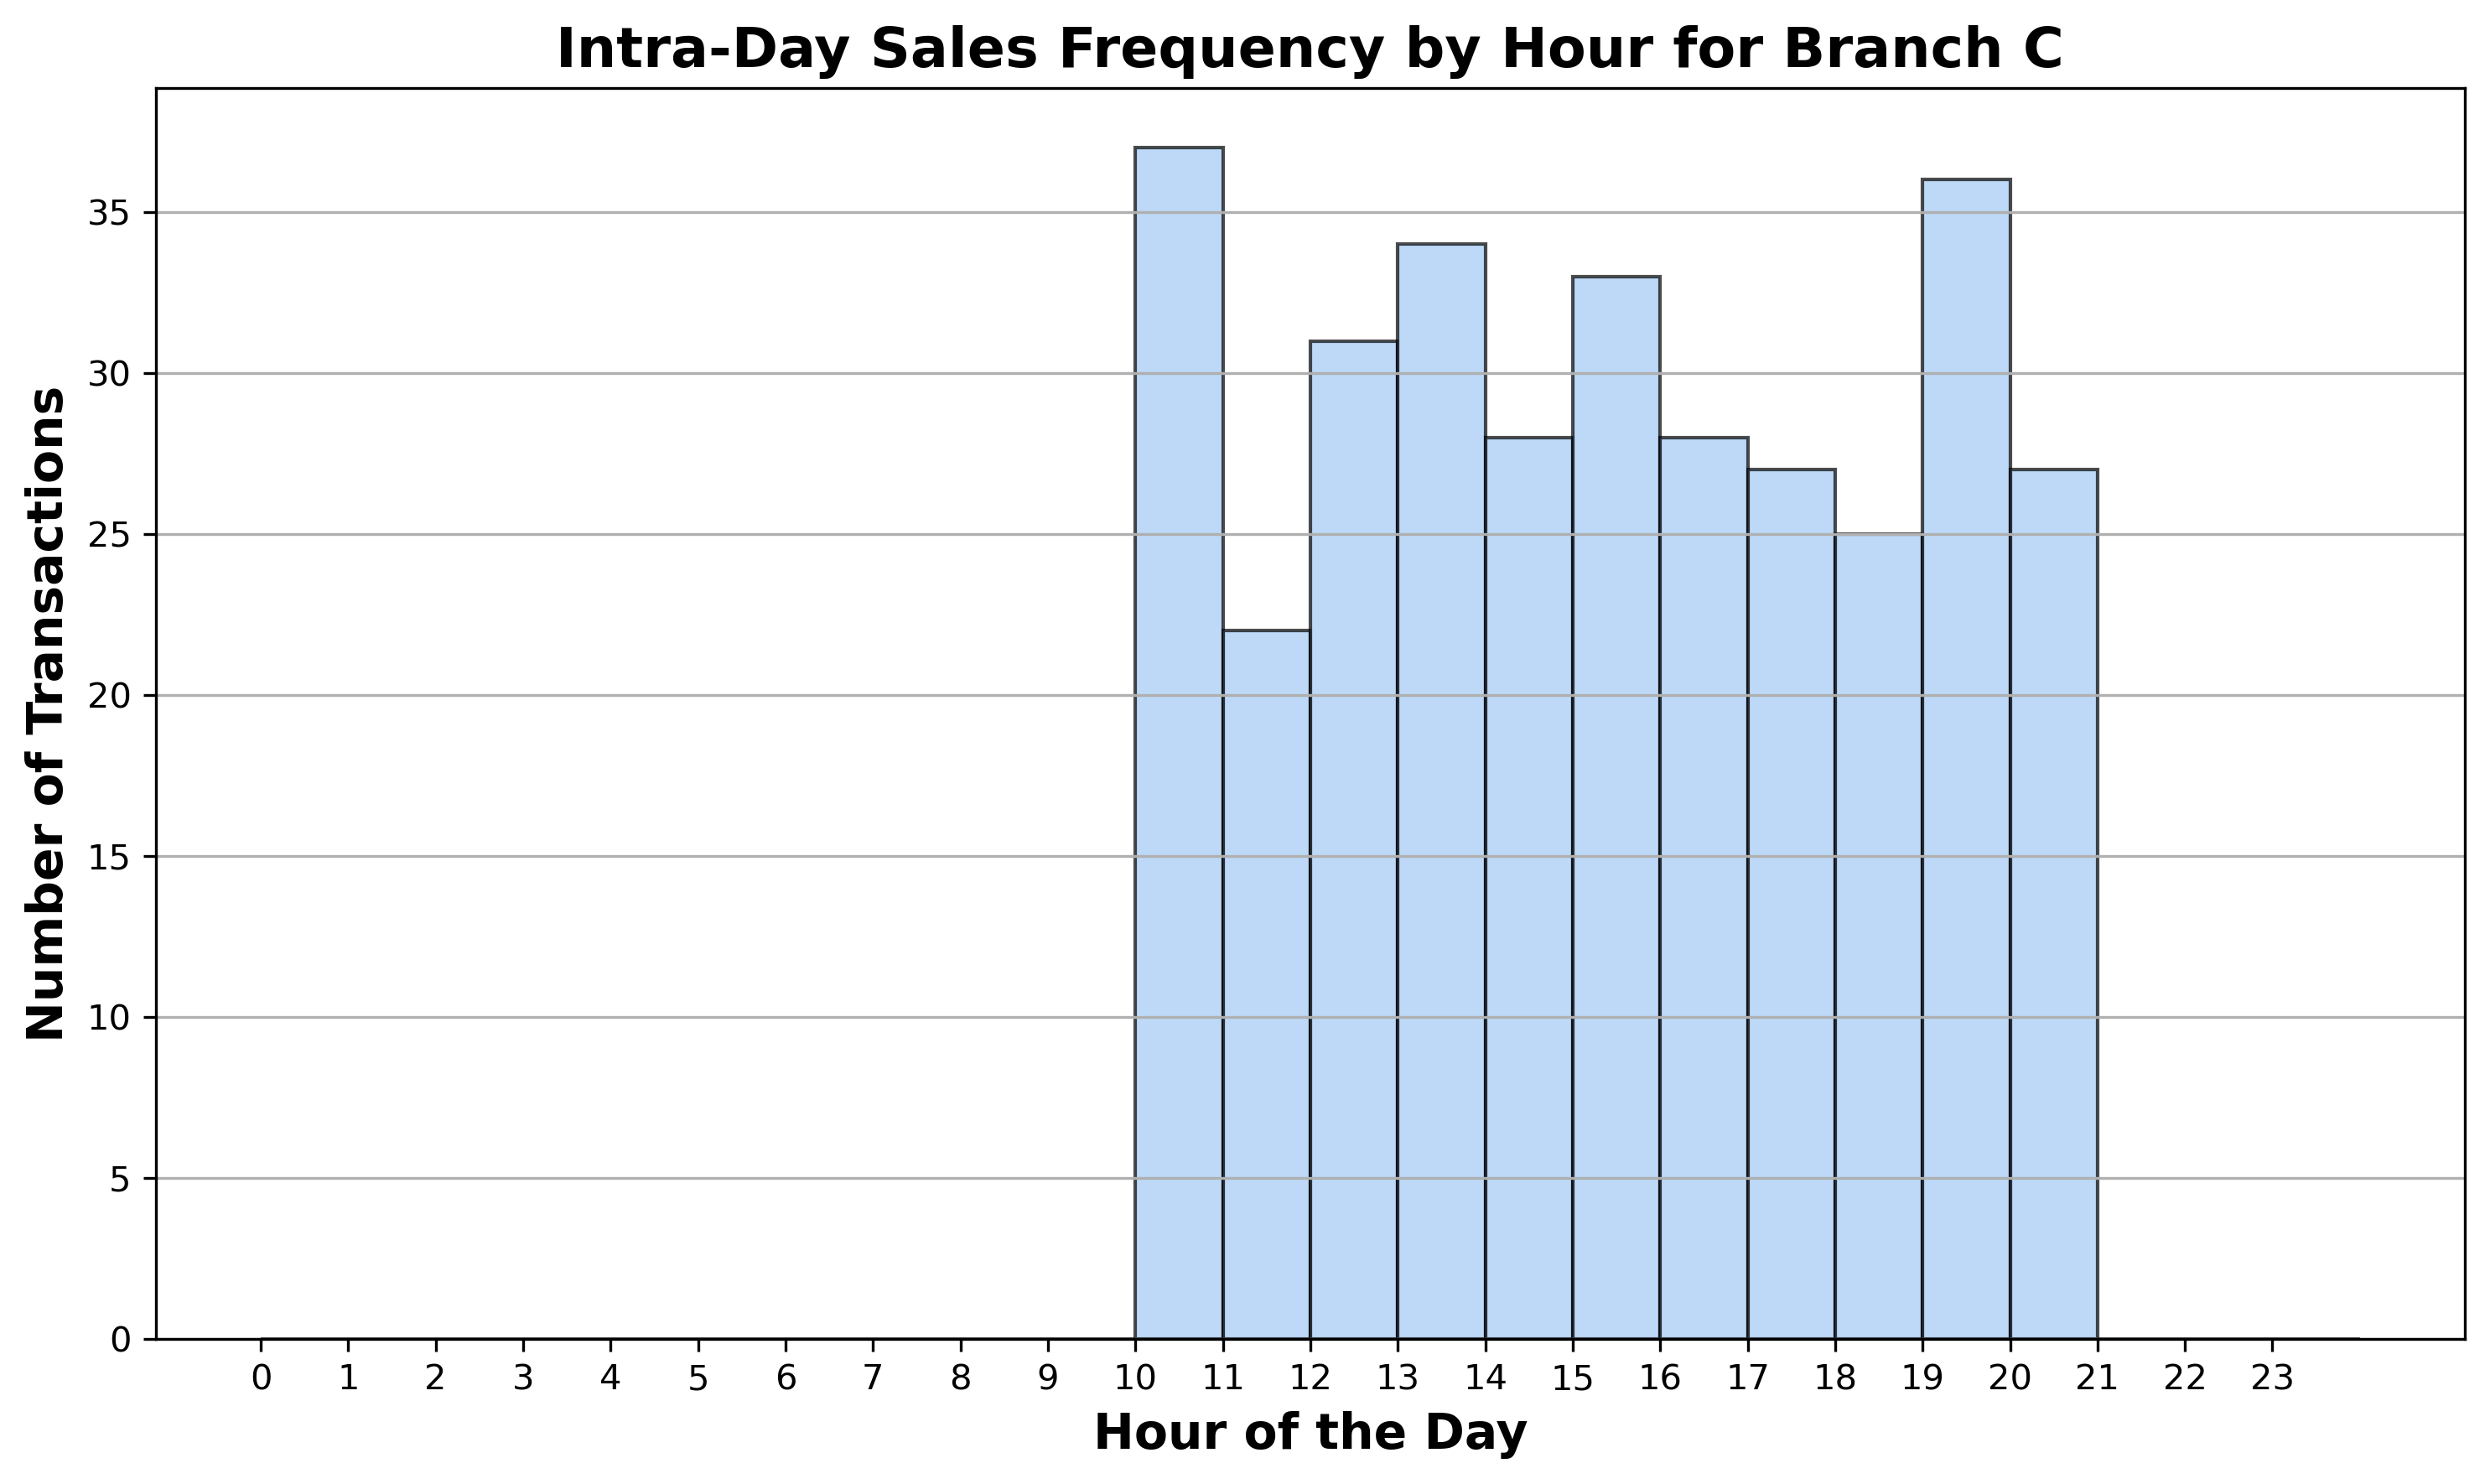

In [12]:
#I want to find out the intra day customer visits to see which time is the busiest 

plt.figure(figsize=(10, 6), dpi = 300)
plt.hist(branch_c_data['Hour'], bins=range(0, 25), alpha=0.7, edgecolor='black')

plt.title('Intra-Day Sales Frequency by Hour for Branch C',  fontsize = 16, fontweight = 'bold')
plt.xlabel('Hour of the Day',  fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Transactions', fontsize = 14, fontweight = 'bold')
plt.xticks(range(0, 24), rotation = 0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

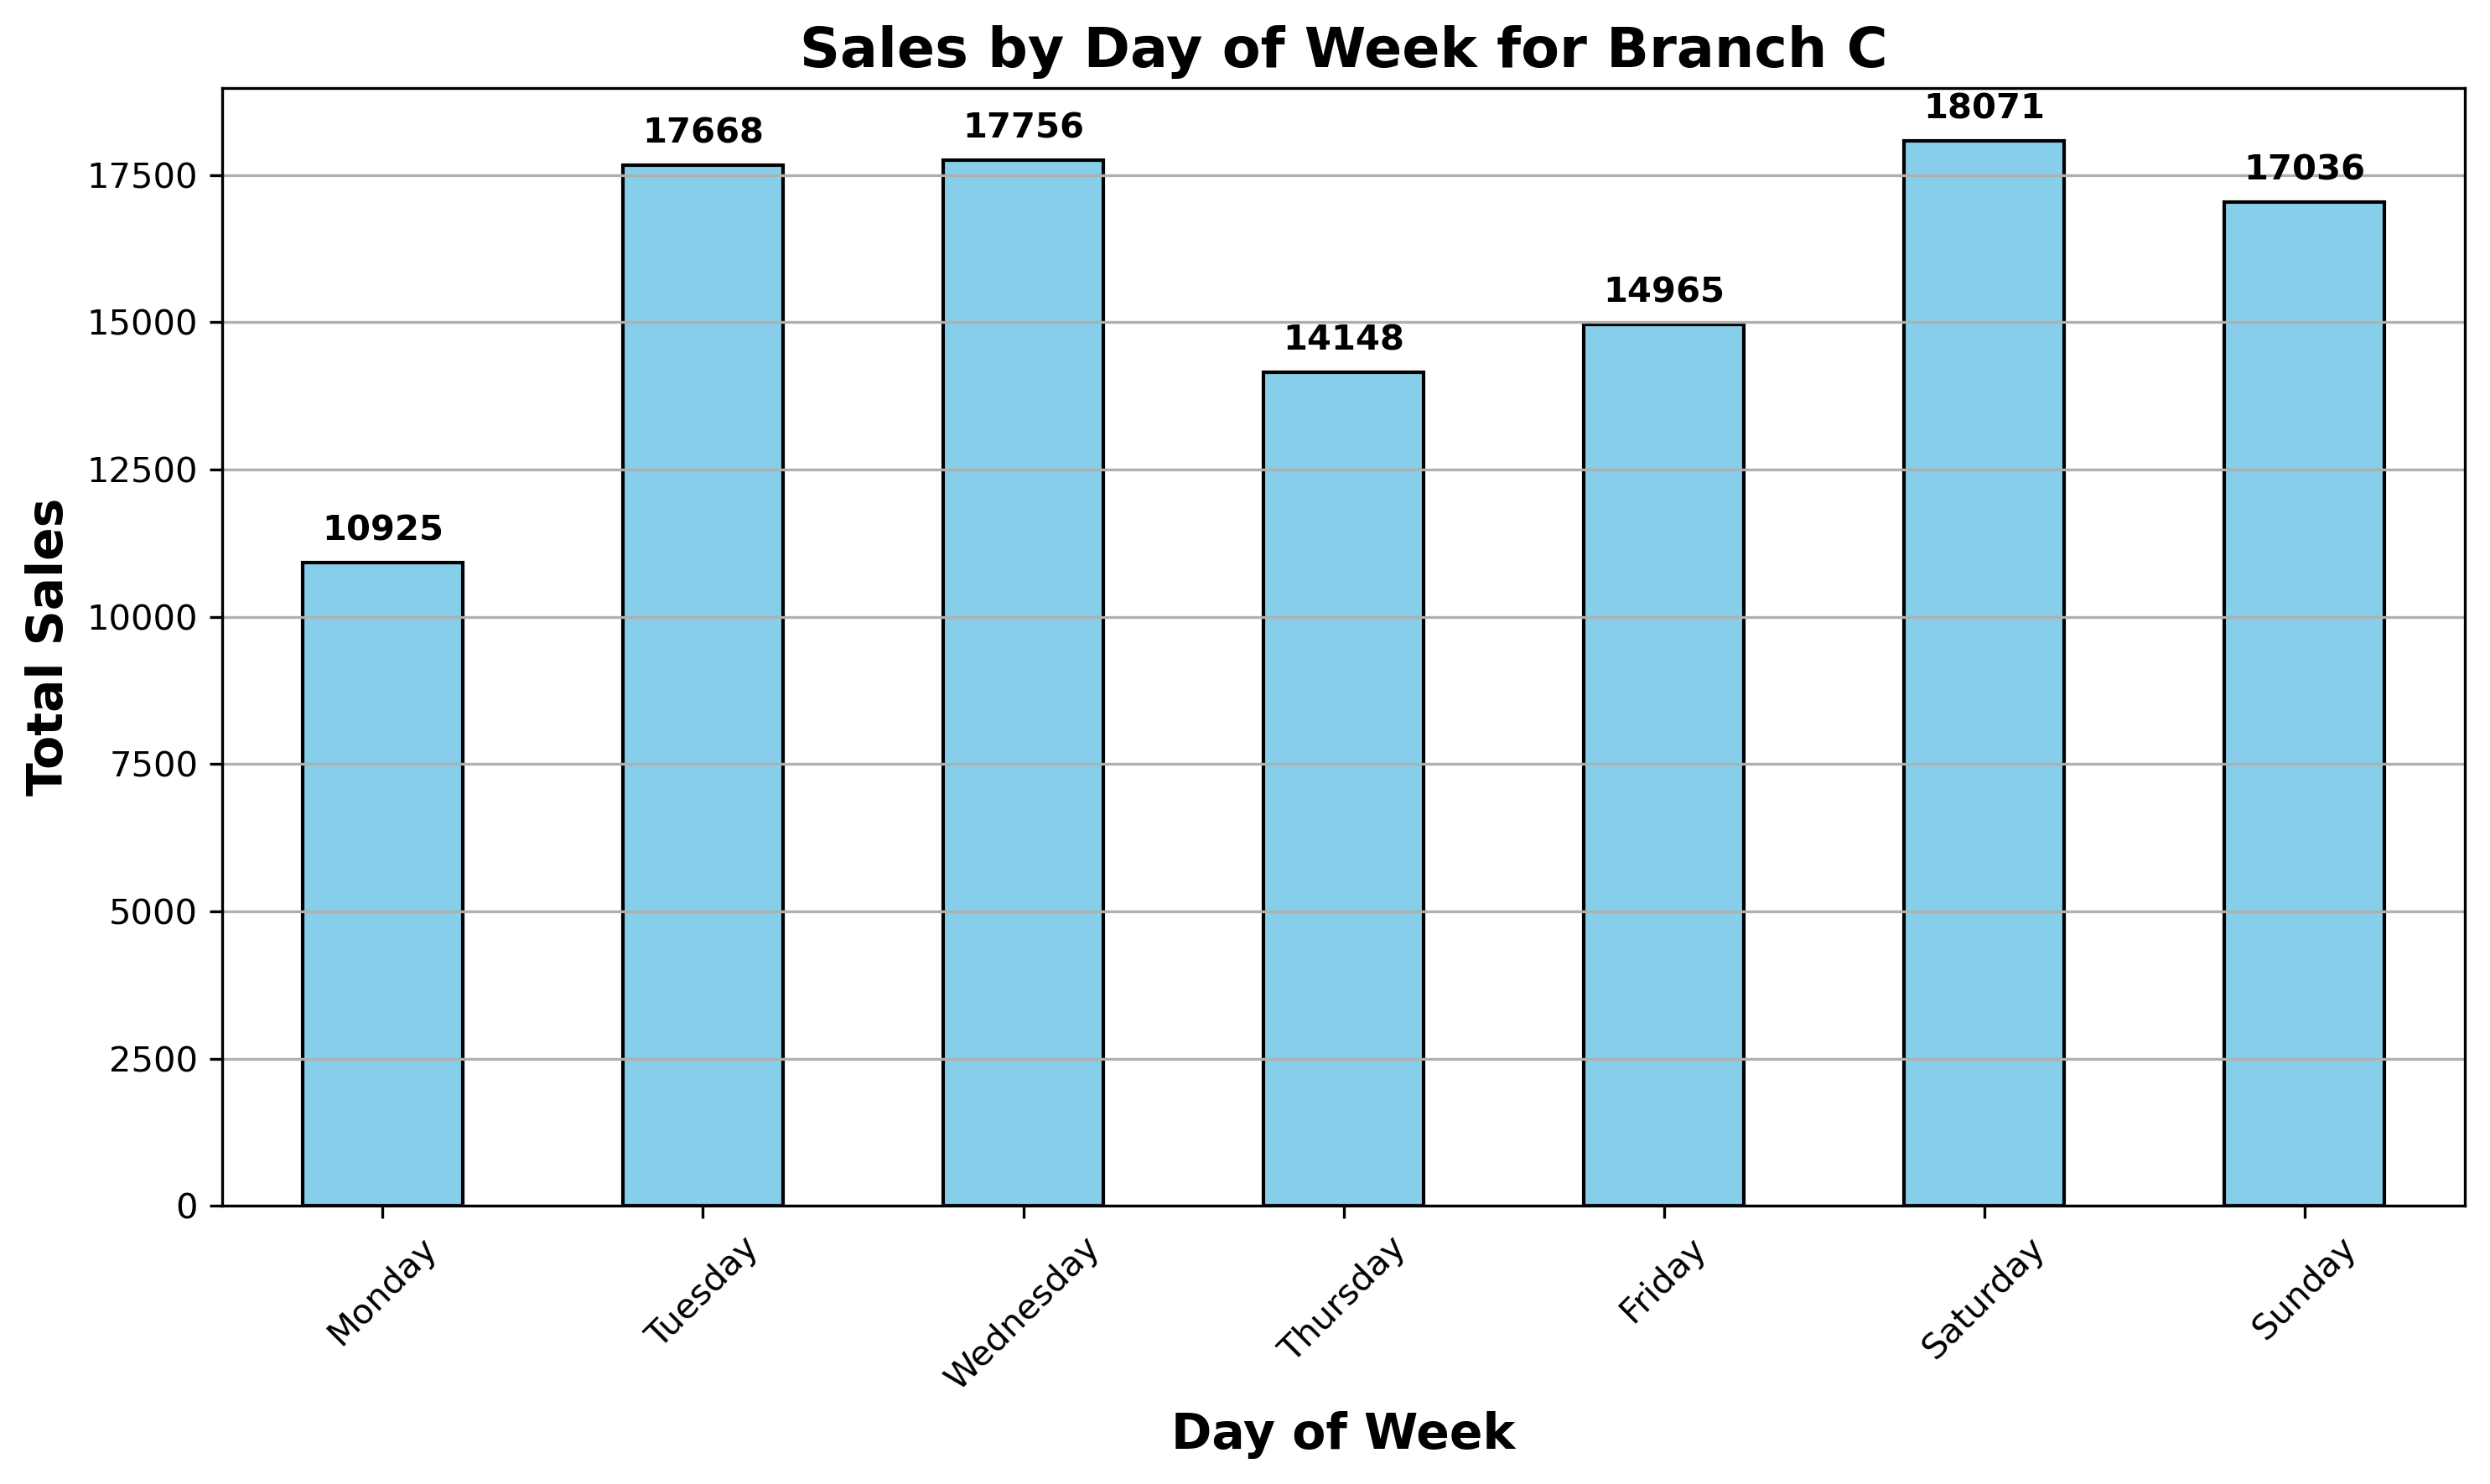

In [13]:
#I want to see which day of the week has the most sales 

branch_c_data['Date'] = pd.to_datetime(branch_c_data['Date'])

# Create a new column for the day of the week
branch_c_data['Day of Week'] = branch_c_data['Date'].dt.day_name()

sales_by_day = branch_c_data.groupby('Day of Week')['Total'].sum()

# Sort the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order)

# Plot the results
plt.figure(figsize=(10, 6), dpi = 300)
day_bar = sales_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

for i in day_bar.patches:
    day_bar.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points',
                fontweight = 'semibold')

# Add titles and labels
plt.title('Sales by Day of Week for Branch C', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


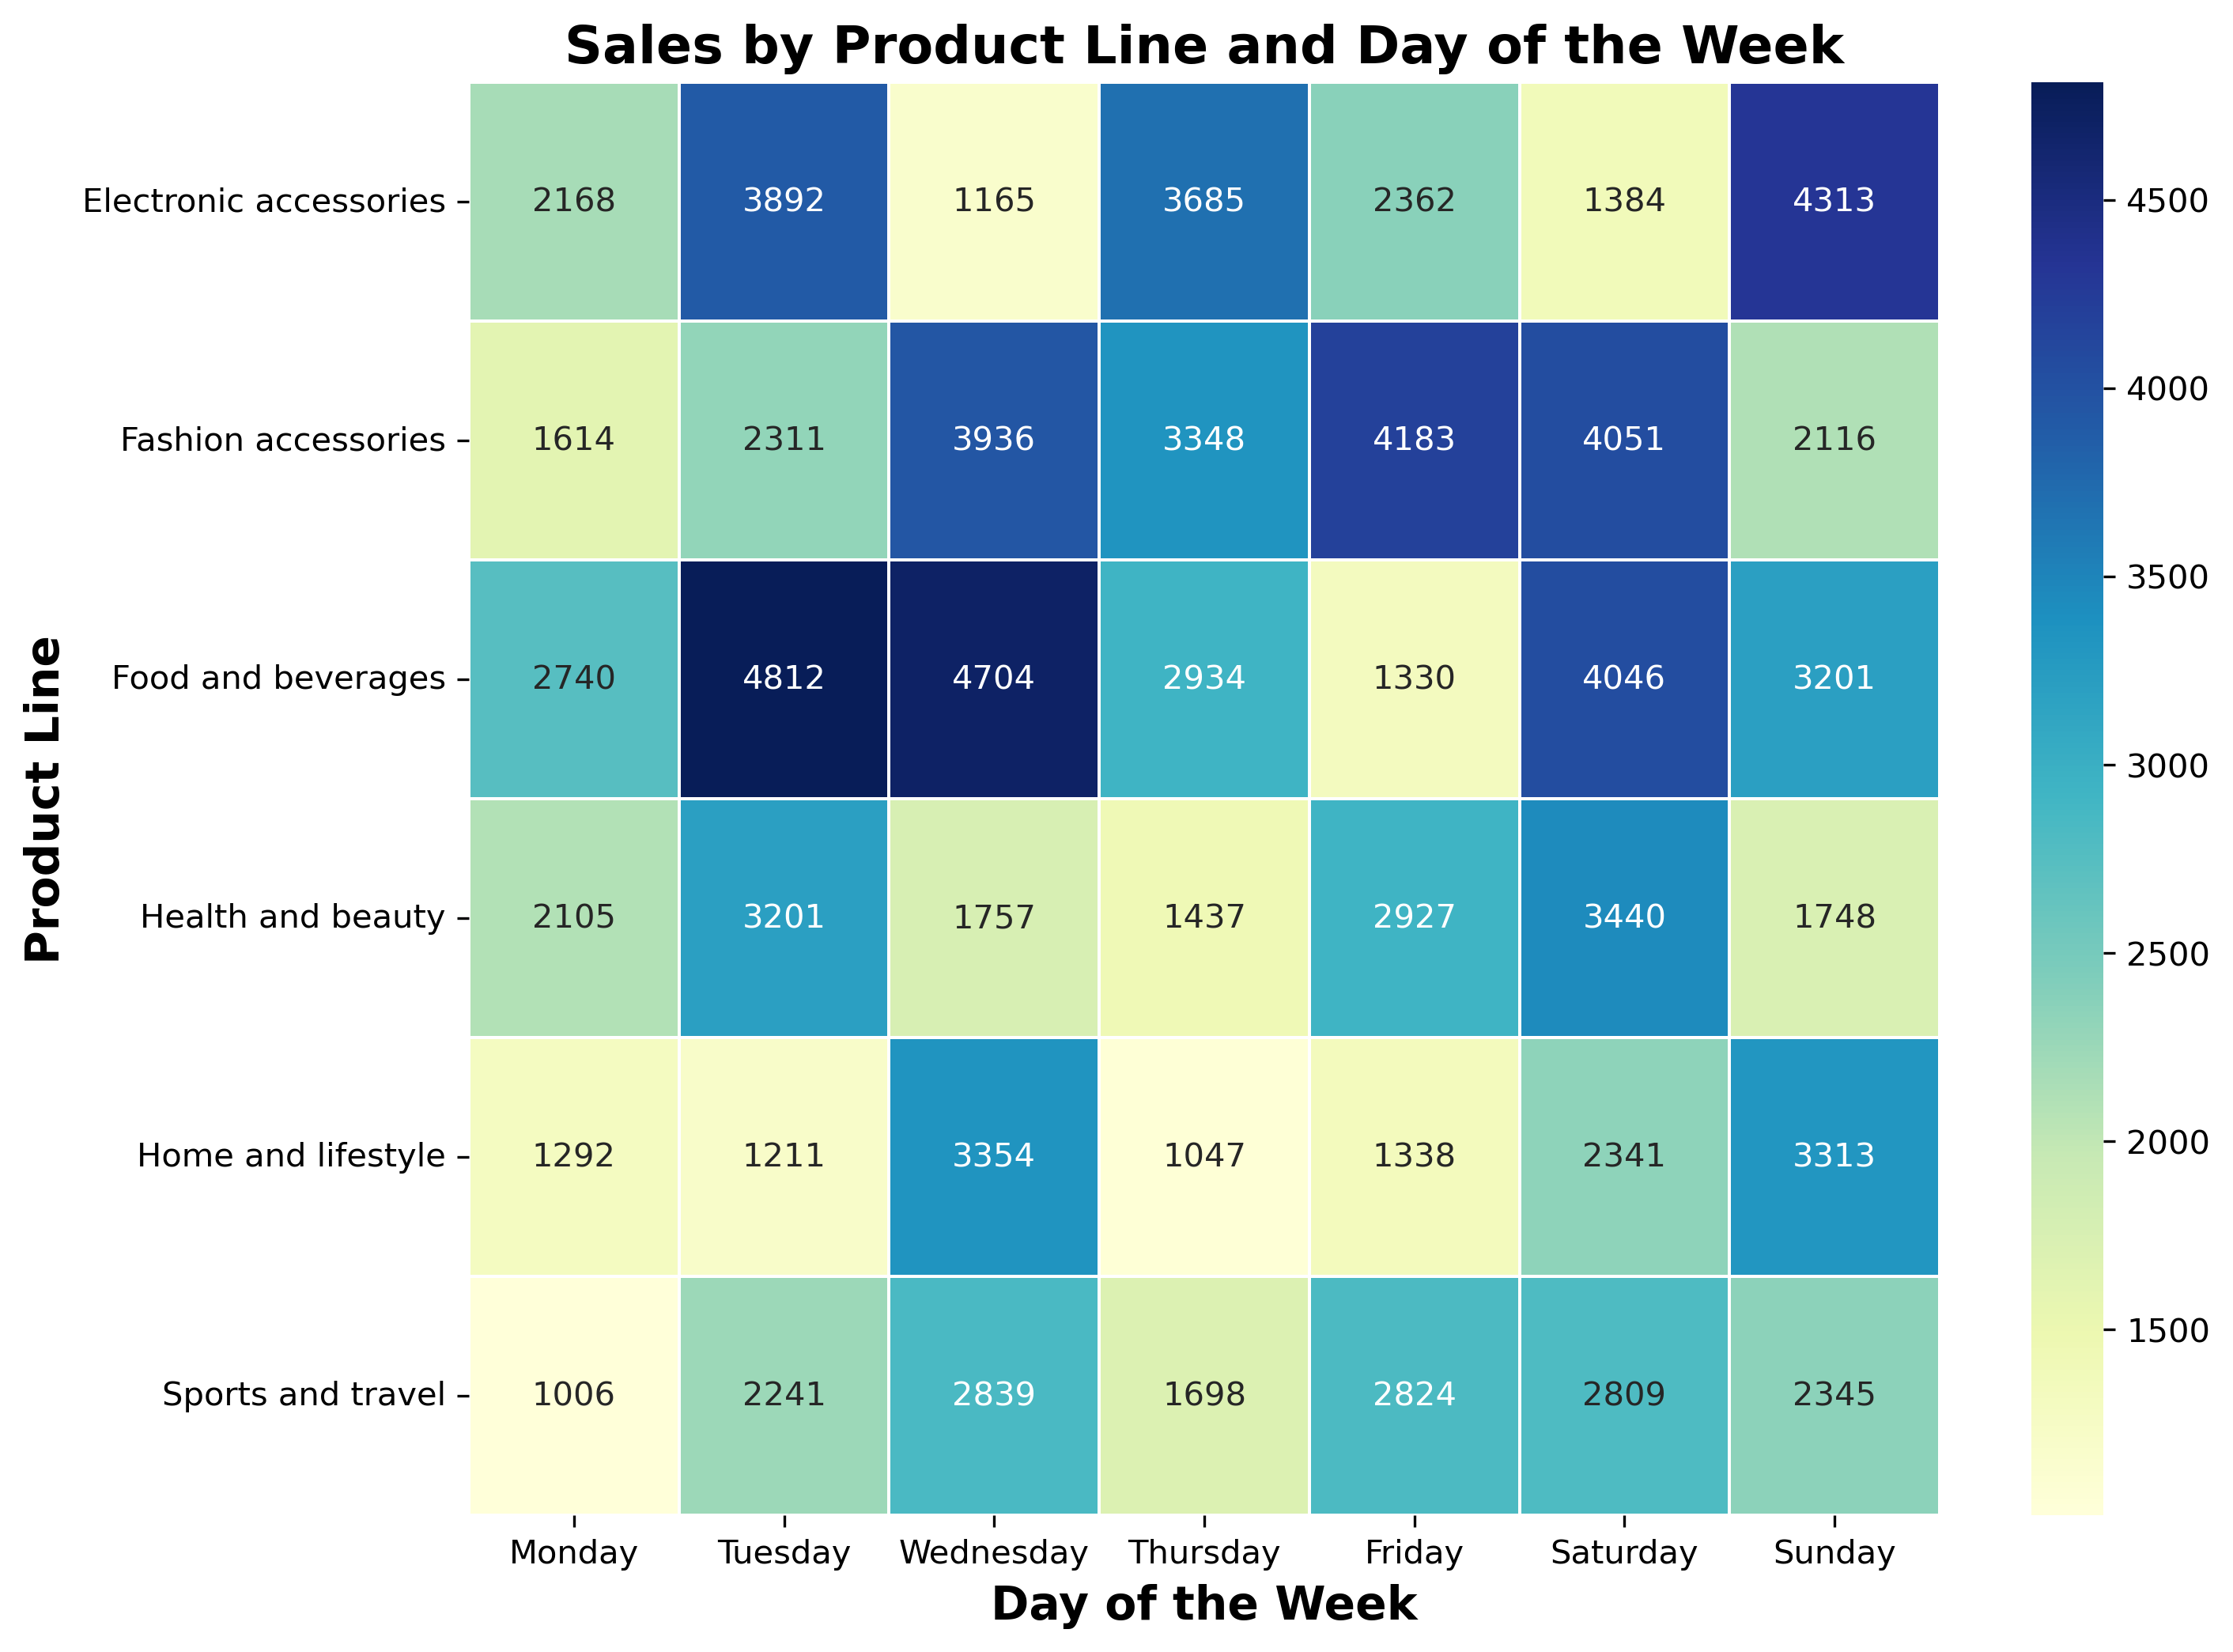

In [14]:
# I want to see which products has the highest sale across the days through a heat map
sales_pivot = branch_c_data.pivot_table(index = 'Product line', columns='Day of Week', values='Total', aggfunc='sum')

# Reorder the columns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot[day_order]

# Plot the heatmap
plt.figure(figsize=(10, 8), dpi = 300)
sea.heatmap(sales_pivot, annot = True, fmt = ".0f",cmap = 'YlGnBu',  linewidths = .5)

plt.title('Sales by Product Line and Day of the Week', fontsize = 16, fontweight = 'bold')
plt.ylabel('Product Line', fontsize = 14, fontweight = 'bold')
plt.xlabel('Day of the Week', fontsize = 14, fontweight = 'bold')
plt.show()

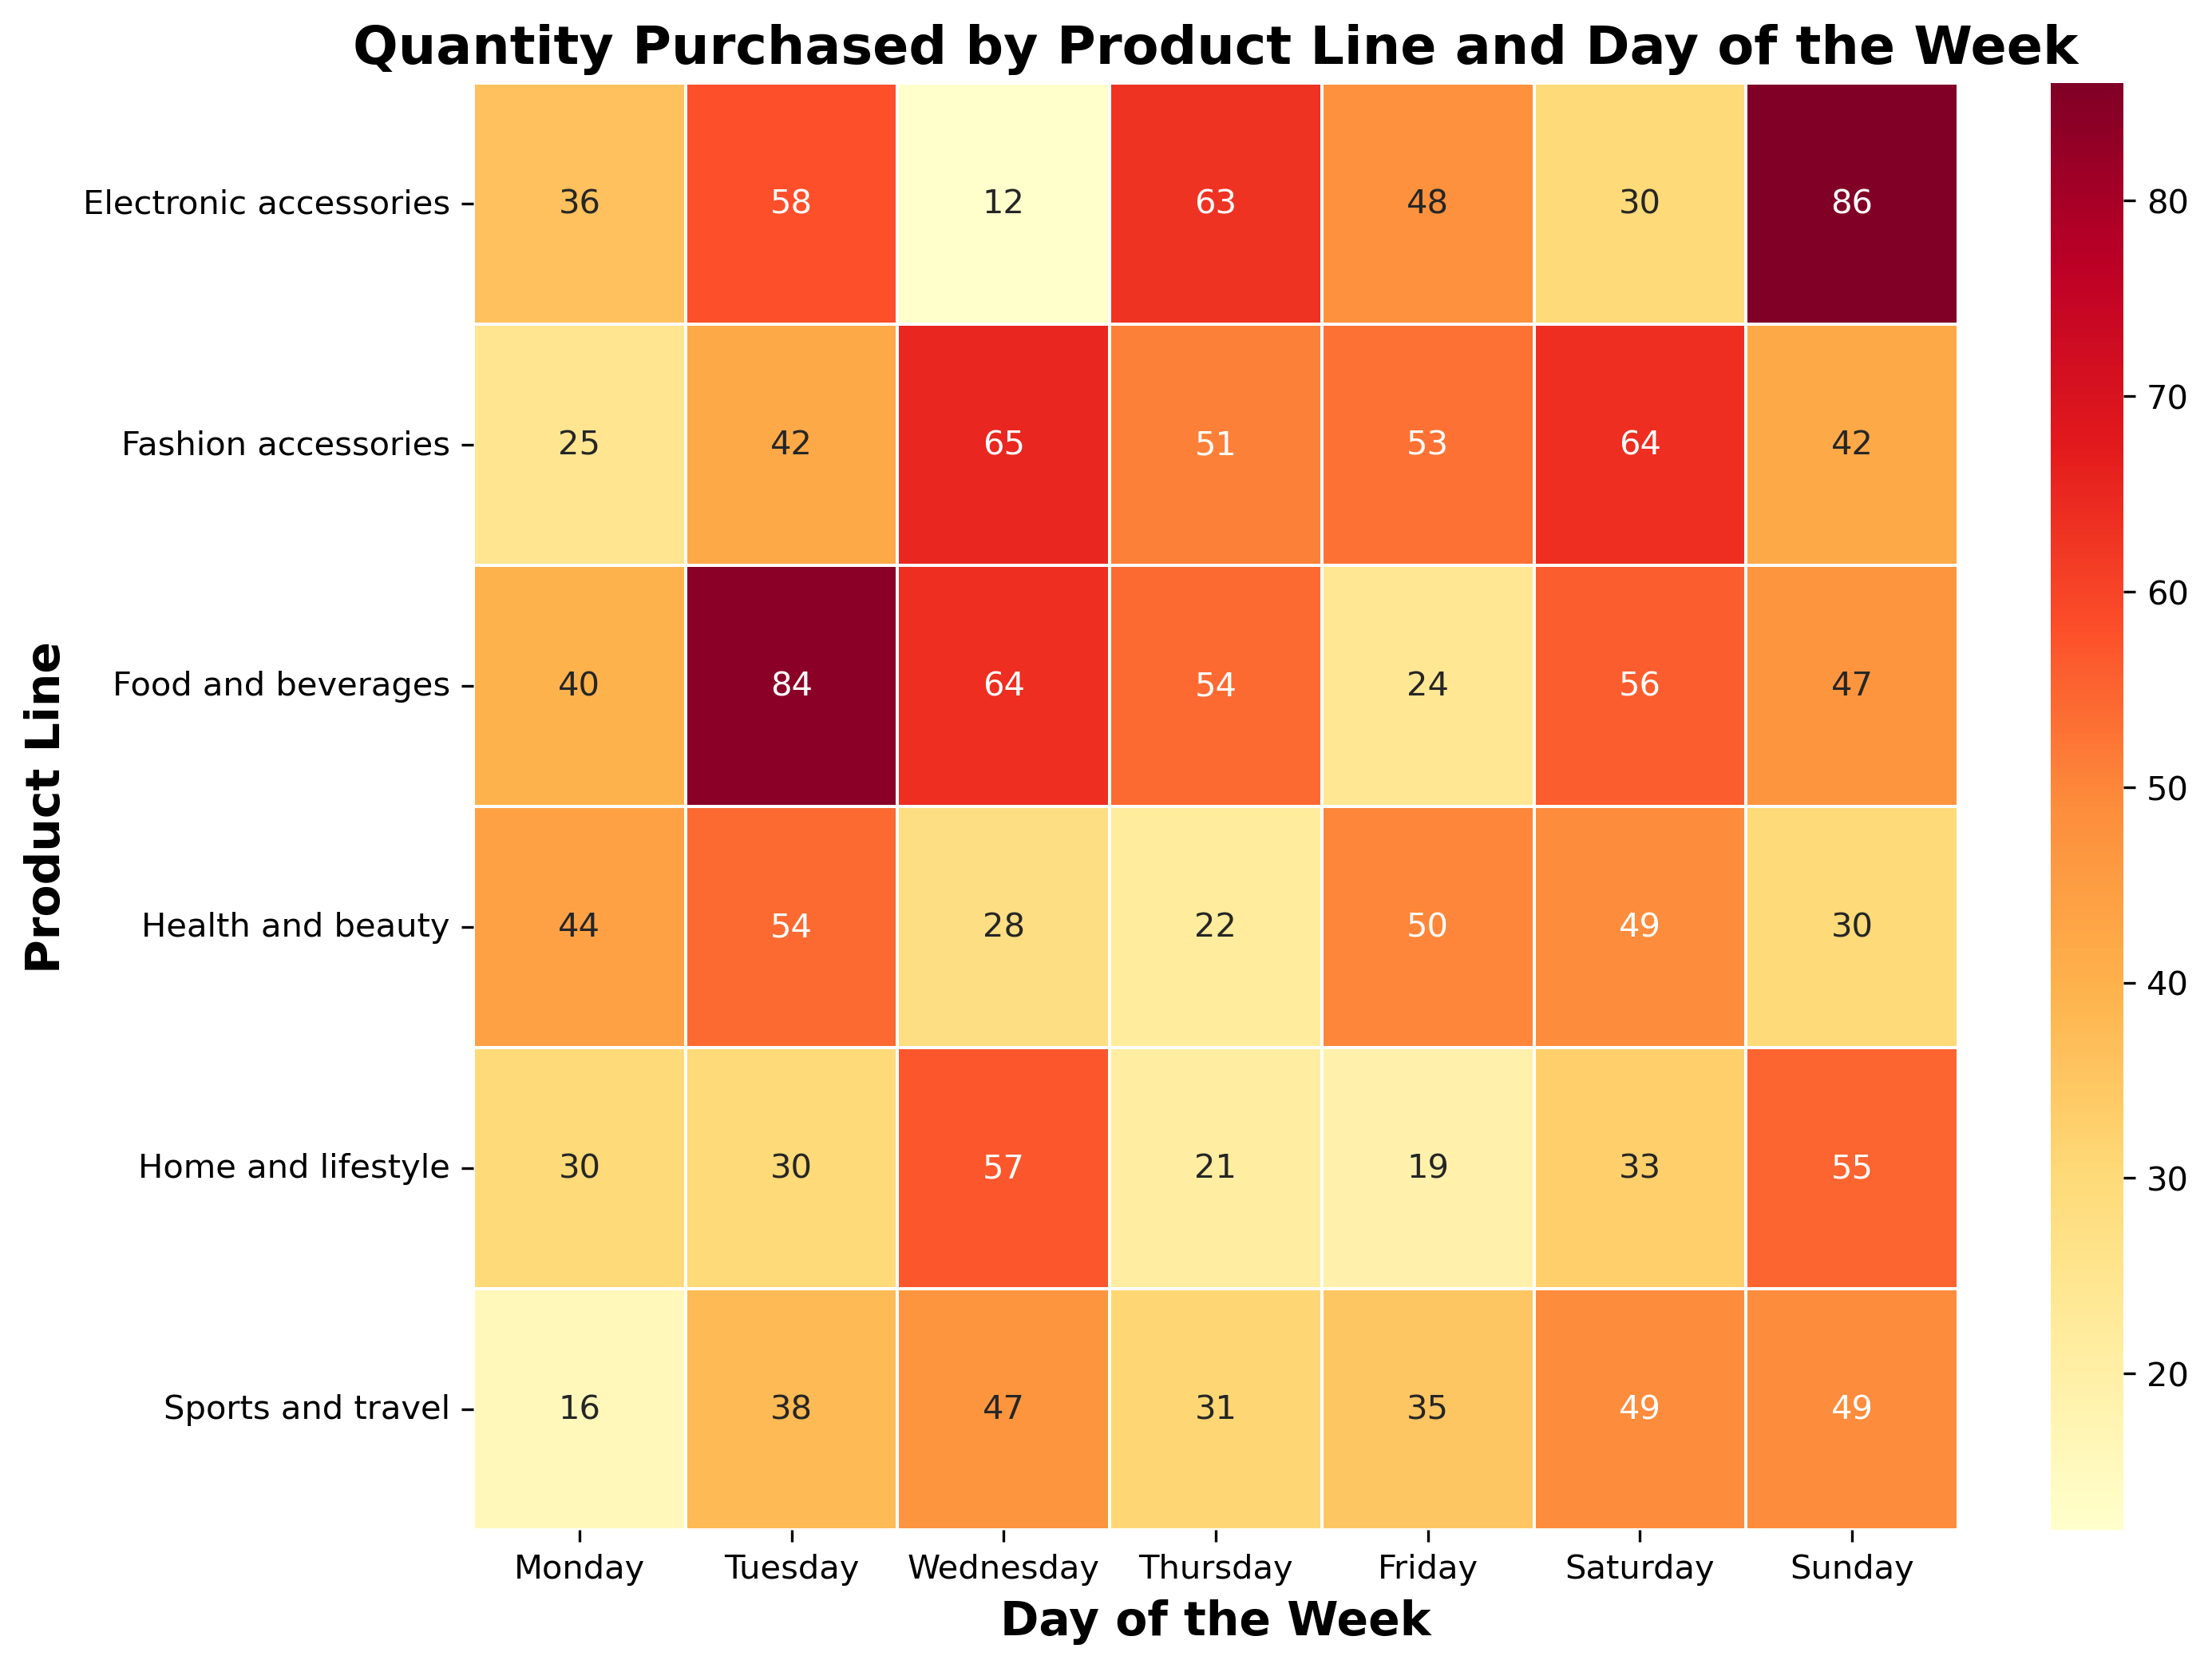

In [15]:
# I want to see which products has the highest quantity sold across the days through a heat map
sales_pivot = branch_c_data.pivot_table(index = 'Product line', columns = 'Day of Week', values = 'Quantity', aggfunc='sum')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot[day_order]

# Plot the heatmap
plt.figure(figsize=(10, 8), dpi = 300)
sea.heatmap(sales_pivot, annot = True, fmt =".0f",cmap = 'YlOrRd',  linewidths = .5)

plt.title('Quantity Purchased by Product Line and Day of the Week', fontsize = 16, fontweight = 'bold')
plt.ylabel('Product Line', fontsize = 14, fontweight = 'bold')
plt.xlabel('Day of the Week', fontsize = 14, fontweight = 'bold')
plt.show()

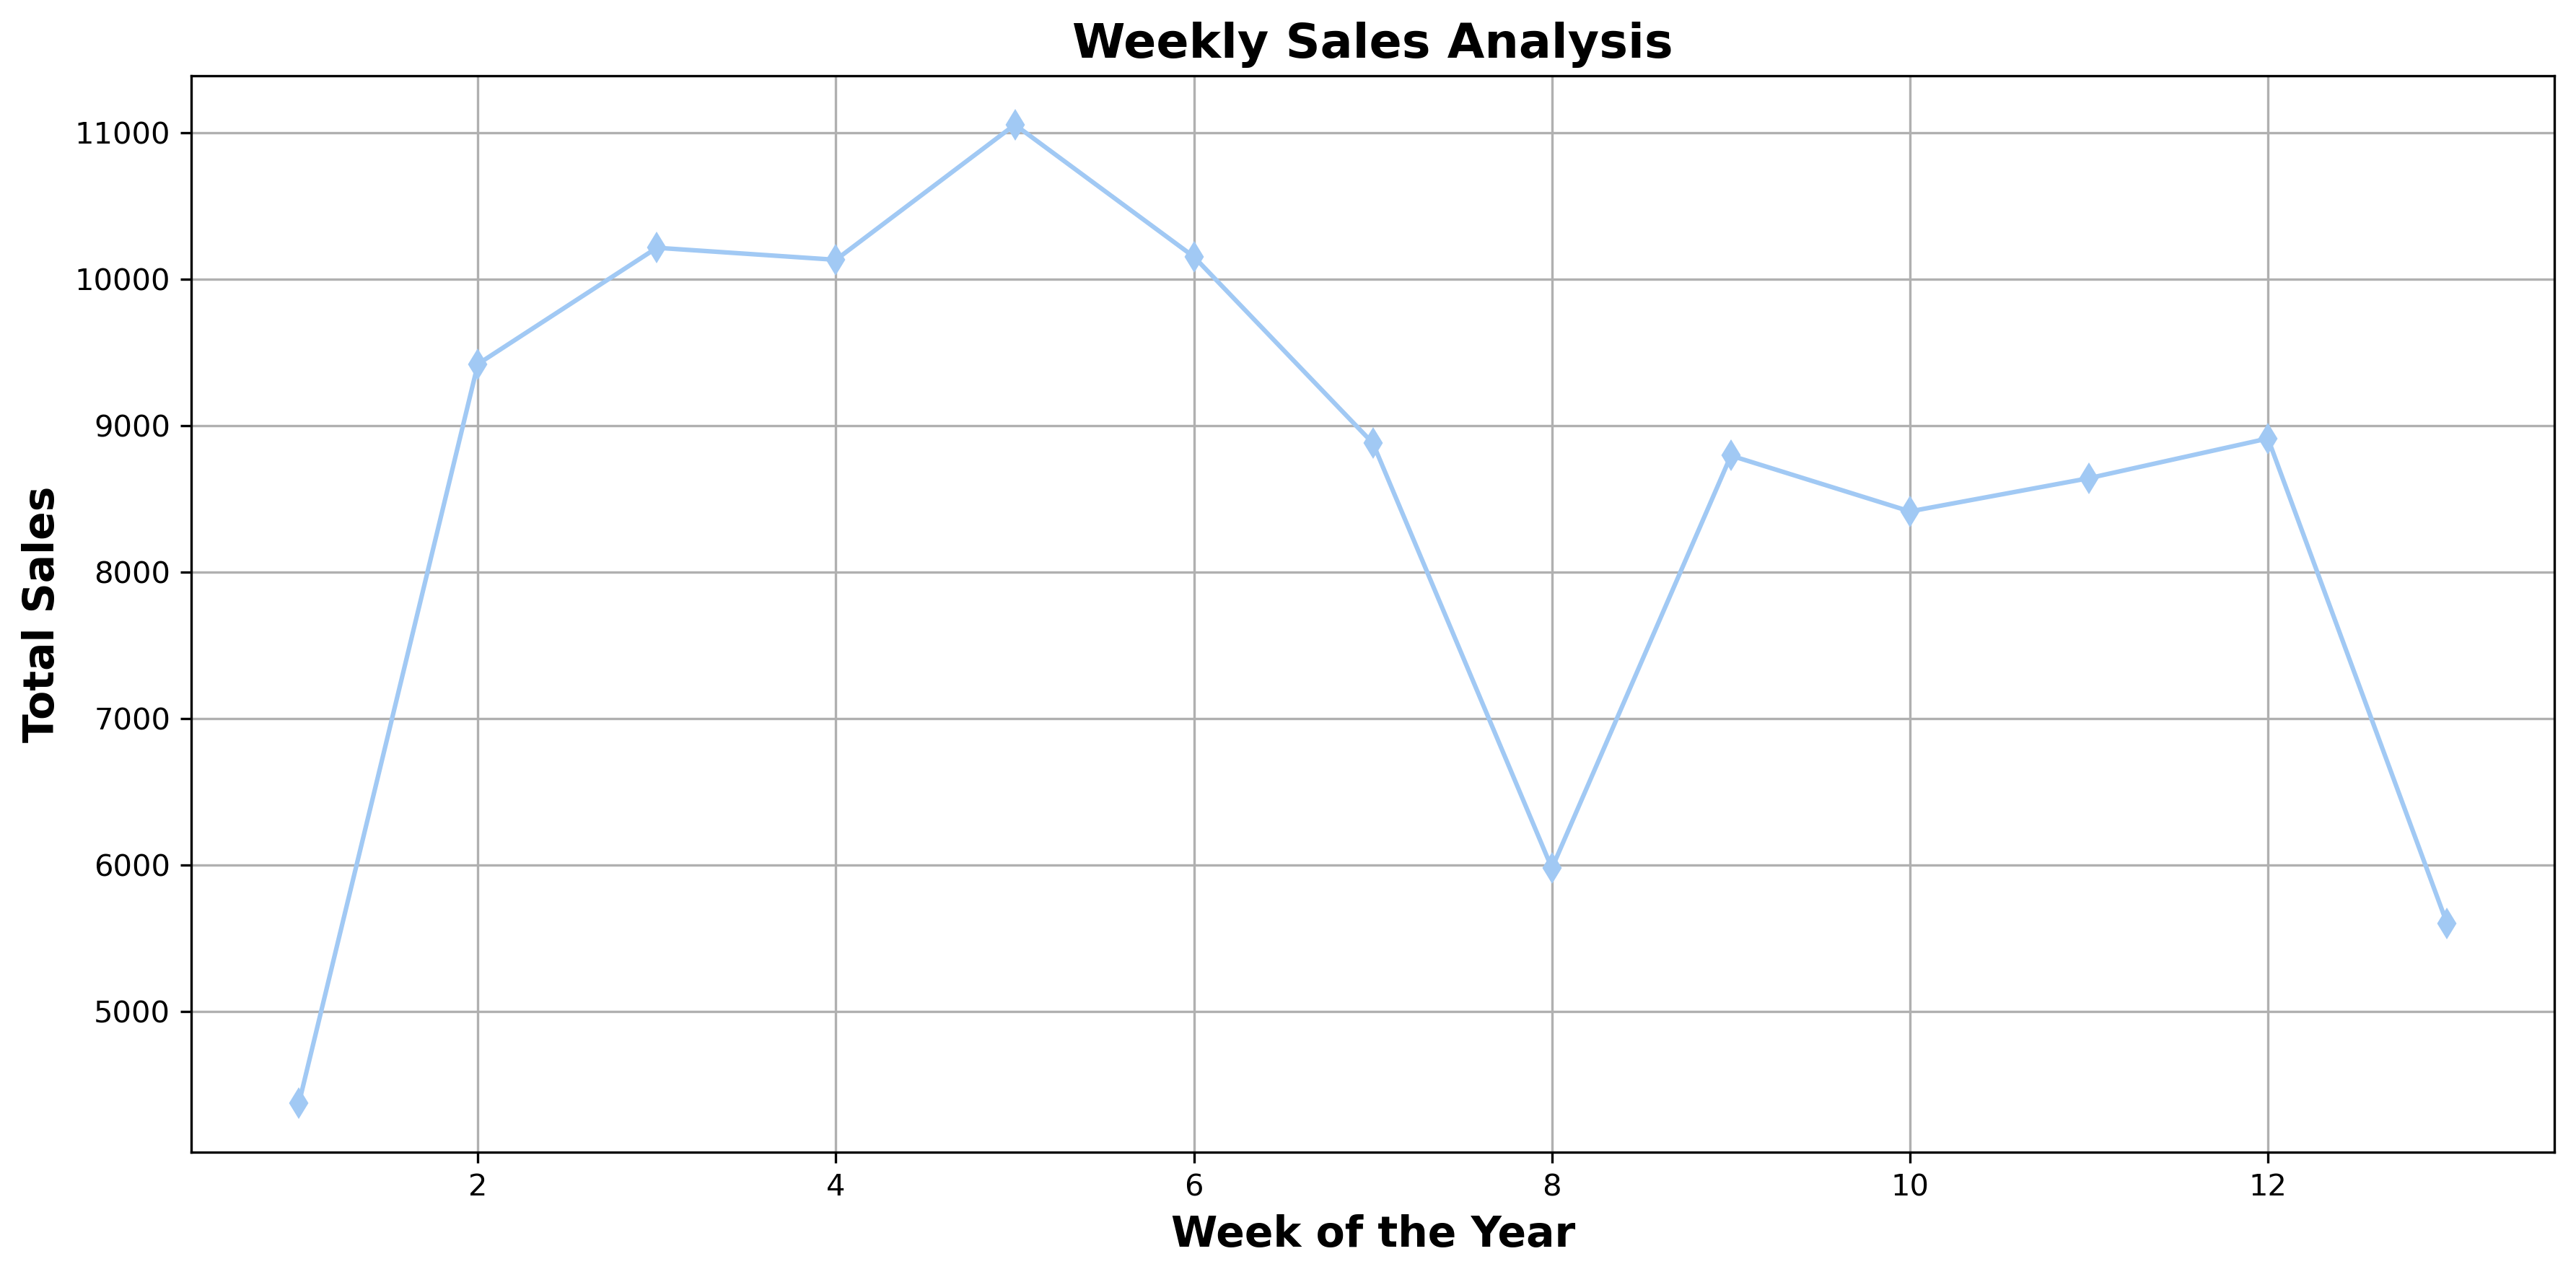

In [16]:
#Finding out the weekly sales for the first 3 months 
branch_c_data['Date'] = pd.to_datetime(branch_c_data['Date'])

# Extract the week number from the date
branch_c_data['Week'] = branch_c_data['Date'].dt.isocalendar().week

# Group by week and sum the total sales
weekly_sales = branch_c_data.groupby('Week')['Total'].sum()

# Plot the results
plt.figure(figsize=(12, 6), dpi = 300)
weekly_sales.plot(kind = 'line', marker = 'd', linestyle = '-')
plt.title('Weekly Sales Analysis', fontsize = 16, fontweight = 'bold')
plt.xlabel('Week of the Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('Total Sales', fontsize = 14, fontweight = 'bold')

plt.grid(True)
plt.tight_layout()
plt.show()

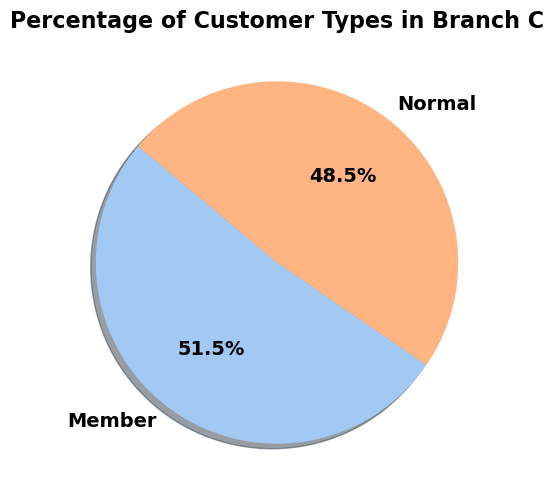

In [17]:
#I want to see the Customer Type of Branch C

customer_types = branch_c_data['Customer type'].value_counts()

plt.figure(figsize = (10,6), dpi = 100)

plt.pie(customer_types, labels = customer_types.index, autopct = '%1.1f%%', startangle = 140, 
        textprops = {'fontsize': 14, 'fontweight': 'semibold'}, shadow = True)

plt.title("Percentage of Customer Types in Branch C", fontsize = 16, fontweight = 'bold')

plt.show()

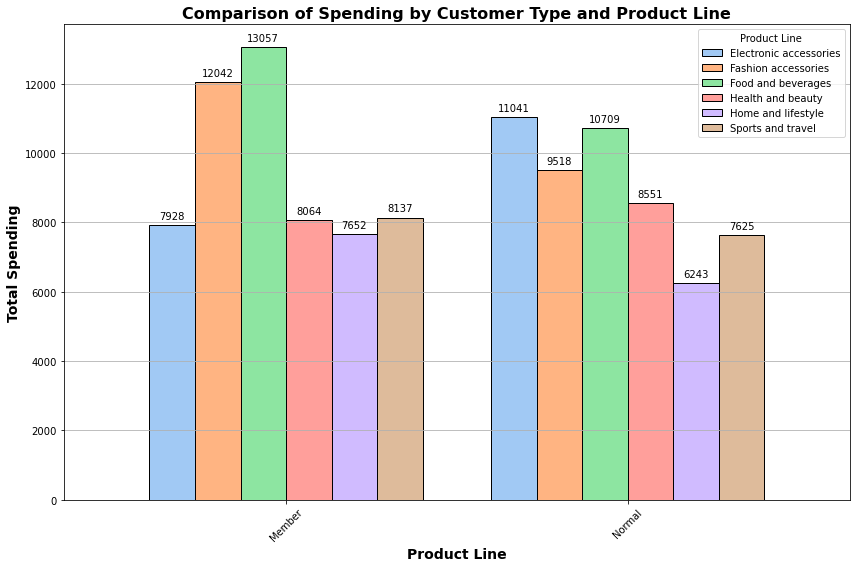

In [18]:
#I want to see how much do members spend in comparison with normal customers

spending_cust_type = branch_c_data.groupby(['Customer type', 'Product line'])['Total'].sum().unstack()

ax = spending_cust_type.plot(kind = 'bar', figsize = (12, 8), width = 0.8, edgecolor = 'black')
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points',
                )

plt.title('Comparison of Spending by Customer Type and Product Line', fontsize = 16, fontweight = 'bold')
plt.xlabel('Product Line', fontsize = 14, fontweight = 'bold')
plt.ylabel('Total Spending', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(title = 'Product Line')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

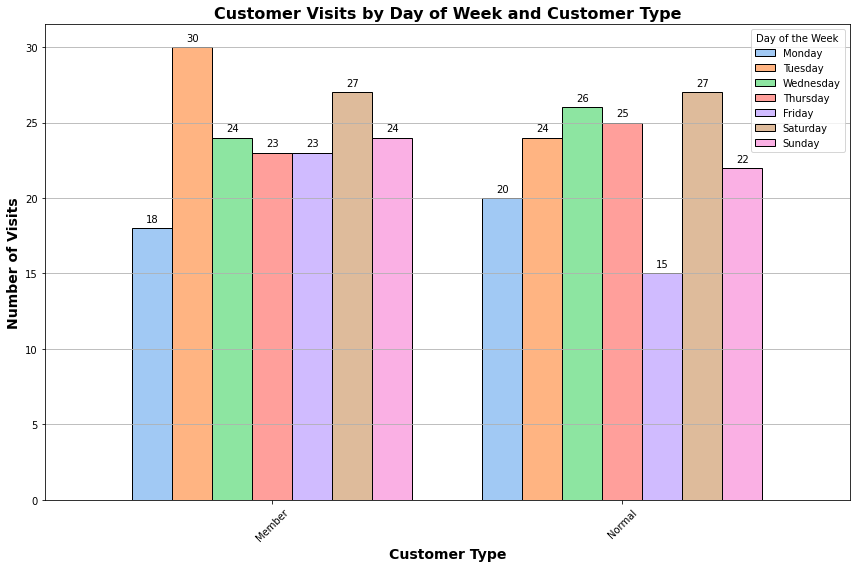

In [19]:
#I want to see member and normal customer type and their preference to visit the supermarket on which day 

# Group by 'Customer type' and 'Day of the Week'
customer_day_preference = branch_c_data.groupby(['Customer type', 'Day of Week']).size().unstack()

# Reorder the columns 
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
customer_day_preference = customer_day_preference[days_order]

# Plot the bar chart
bro = customer_day_preference.plot(kind='bar', figsize=(12, 8), width=0.8, edgecolor = 'black')

for i in bro.patches:
    bro.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points',
                )

plt.title('Customer Visits by Day of Week and Customer Type', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer Type', fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Visits', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


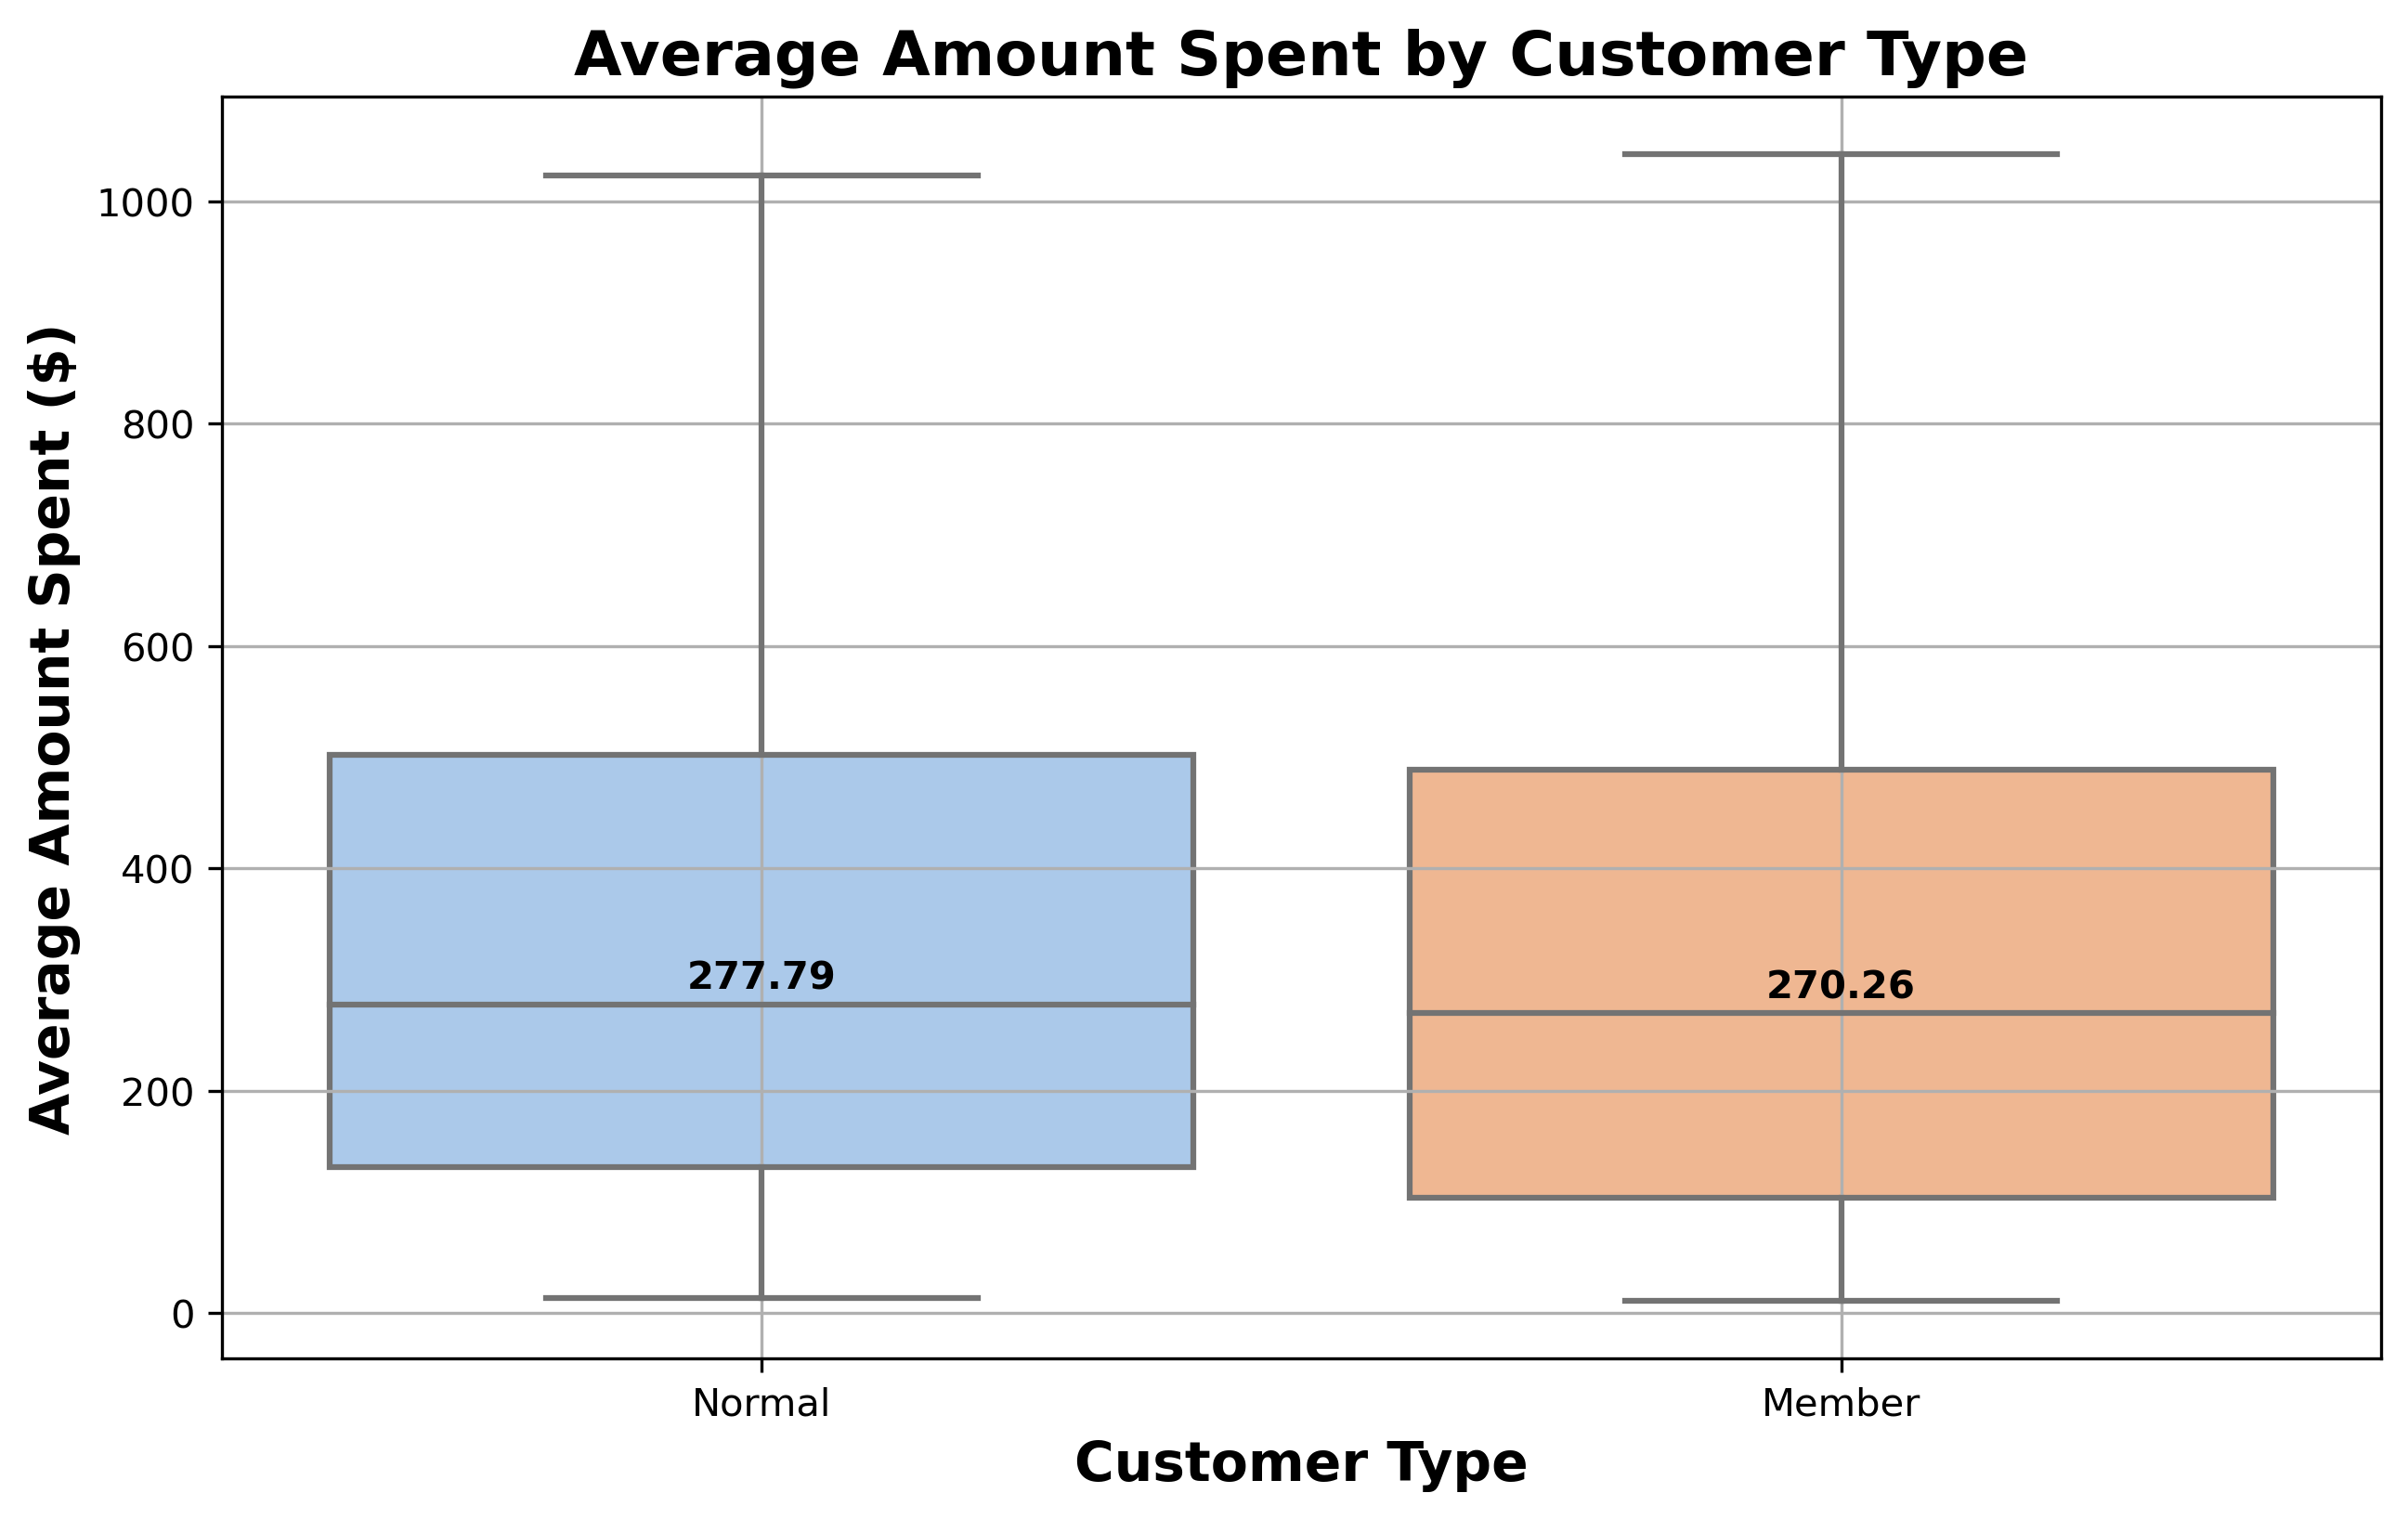

In [20]:
#Finding out whether member spends more than normal customer

plt.figure(figsize=(10, 6), dpi = 300)
box_2 = sea.boxplot(x = 'Customer type', y = 'Total', data = branch_c_data)

medians = branch_c_data.groupby(['Customer type'])['Total'].median()
proper_order = ['Normal', 'Member']
medians = medians.reindex(proper_order)
median_labels = [f'{median:.2f}' for median in medians]
pos = range(len(medians))

for i in pos:
    box_2.text(pos[i], medians[i] * 1.05, median_labels[i], 
            ha = 'center', color = 'black', weight = 'semibold')


plt.title('Average Amount Spent by Customer Type', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer Type', fontsize = 14, fontweight = 'bold')
plt.ylabel('Average Amount Spent ($)', fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()



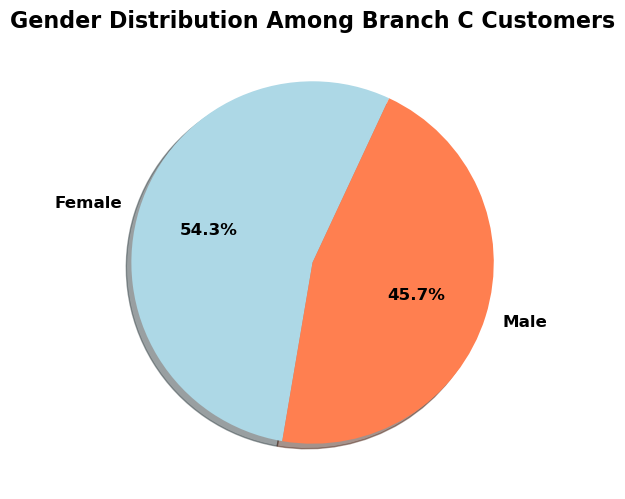

In [21]:
#I want to see the proportion of gender that goes to branch C

plt.figure(figsize = (10,6), dpi = 100)

gender_c = branch_c_data['Gender'].value_counts()

colors = ['lightblue', 'coral']
plt.pie(gender_c, labels = gender_c.index, autopct = '%1.1f%%', startangle = 65, 
        colors = colors, textprops = {'fontweight': 'semibold', 'fontsize': 12}, shadow = True)

plt.title("Gender Distribution Among Branch C Customers", fontsize = 16, fontweight = 'bold')

plt.show()

<Figure size 3600x1800 with 0 Axes>

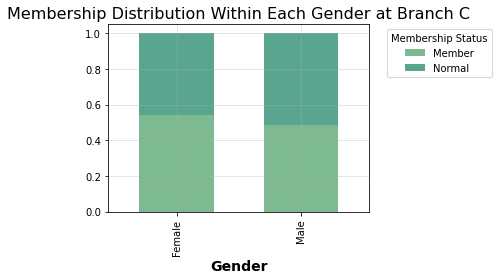

In [22]:
#I want to find the gender proportion in customer types

gender_type = branch_c_data.groupby(['Gender', 'Customer type']).size().unstack()

plt.figure(figsize = (12, 6), dpi = 300)

#we need to normalize the data for the proportion and not use absolute values

gender_type_normal = gender_type.div(gender_type.sum(axis = 1), axis = 0)

palette = sea.color_palette("crest")

gender_type_normal.plot(kind='bar', stacked = True, color = palette, width = 0.6)

plt.grid(alpha = 0.4)

plt.title('Membership Distribution Within Each Gender at Branch C', fontsize=16)
plt.xlabel('Gender', fontsize = 14, fontweight = 'bold')

plt.legend(title='Membership Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

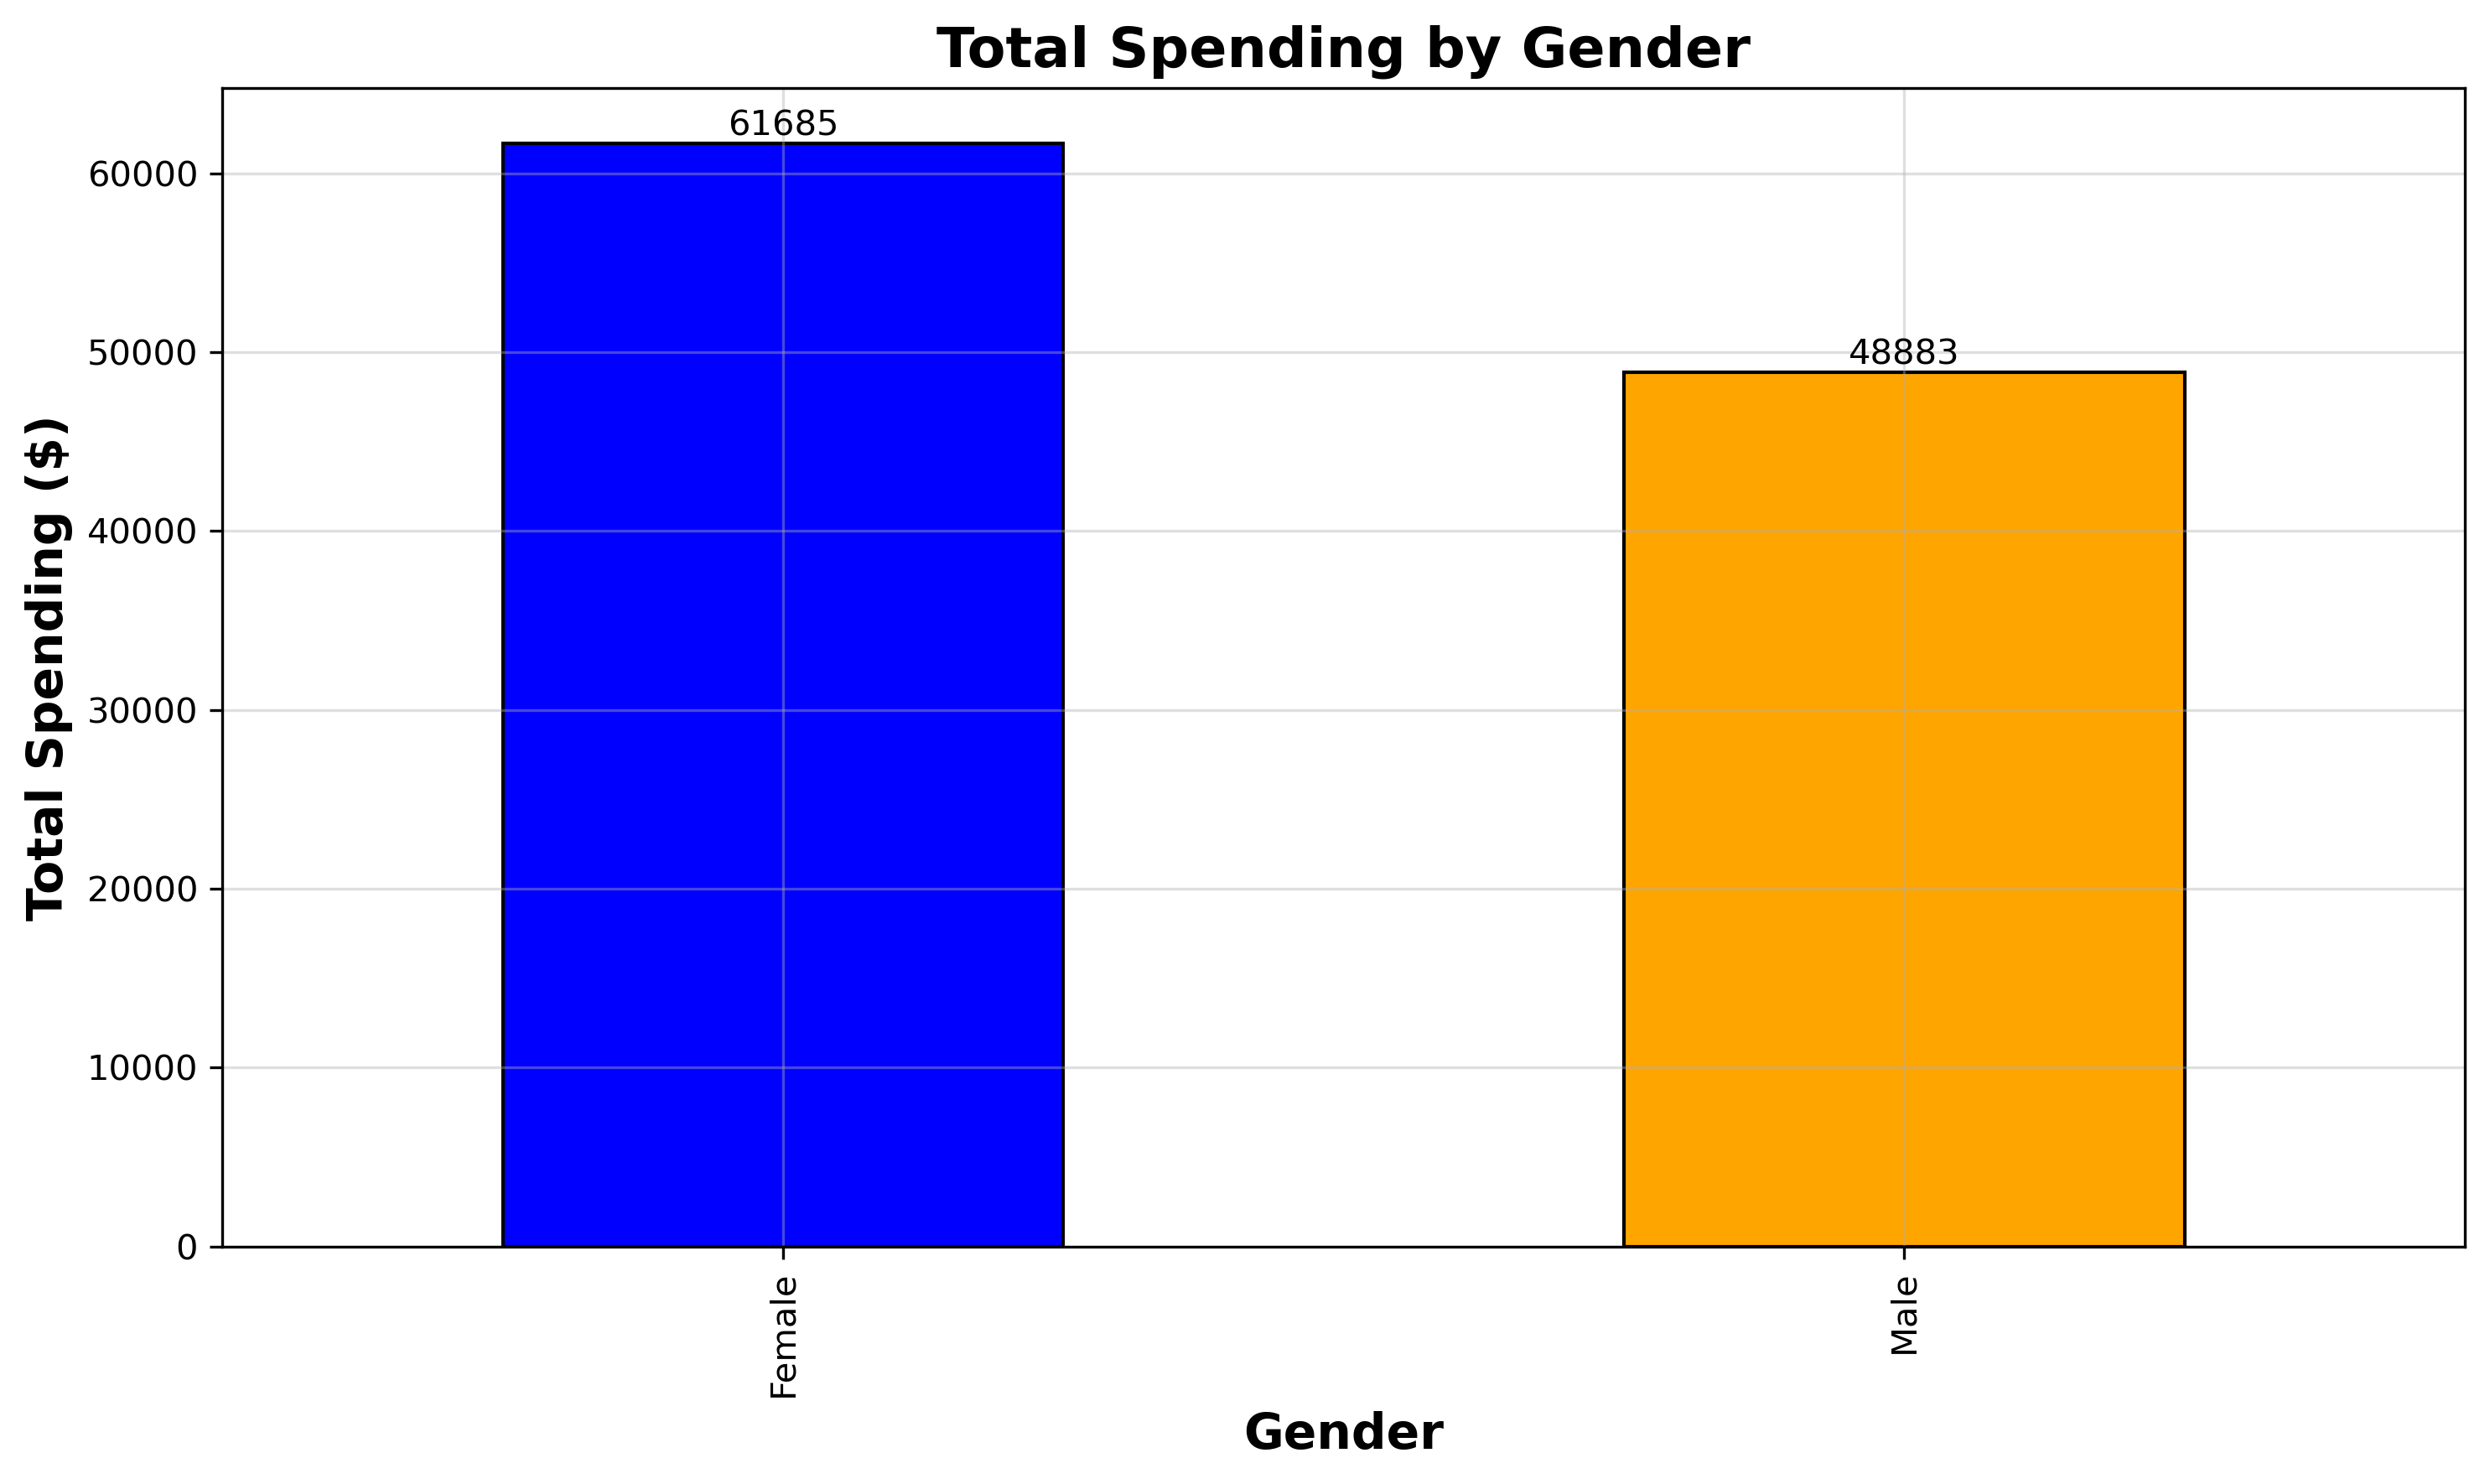

In [23]:
#I want to find out the total spending by both gender
total_spending_gender = branch_c_data.groupby('Gender')['Total'].sum()

plt.figure(figsize = (10, 6), dpi = 300)

total_spending_gender.plot(kind = 'bar', color = ['blue', 'orange'], edgecolor = 'black')

plt.title('Total Spending by Gender', fontsize = 16, fontweight = 'bold')
plt.xlabel('Gender', fontsize = 14, fontweight = 'bold')
plt.ylabel('Total Spending ($)', fontsize = 14, fontweight = 'bold')

# Adding value labels on top of the bars
for i, value in enumerate(total_spending_gender):
    plt.text(i, value, f'{value:.0f}', ha = 'center', va = 'bottom')

plt.grid(alpha = 0.4)
plt.tight_layout()
plt.show()

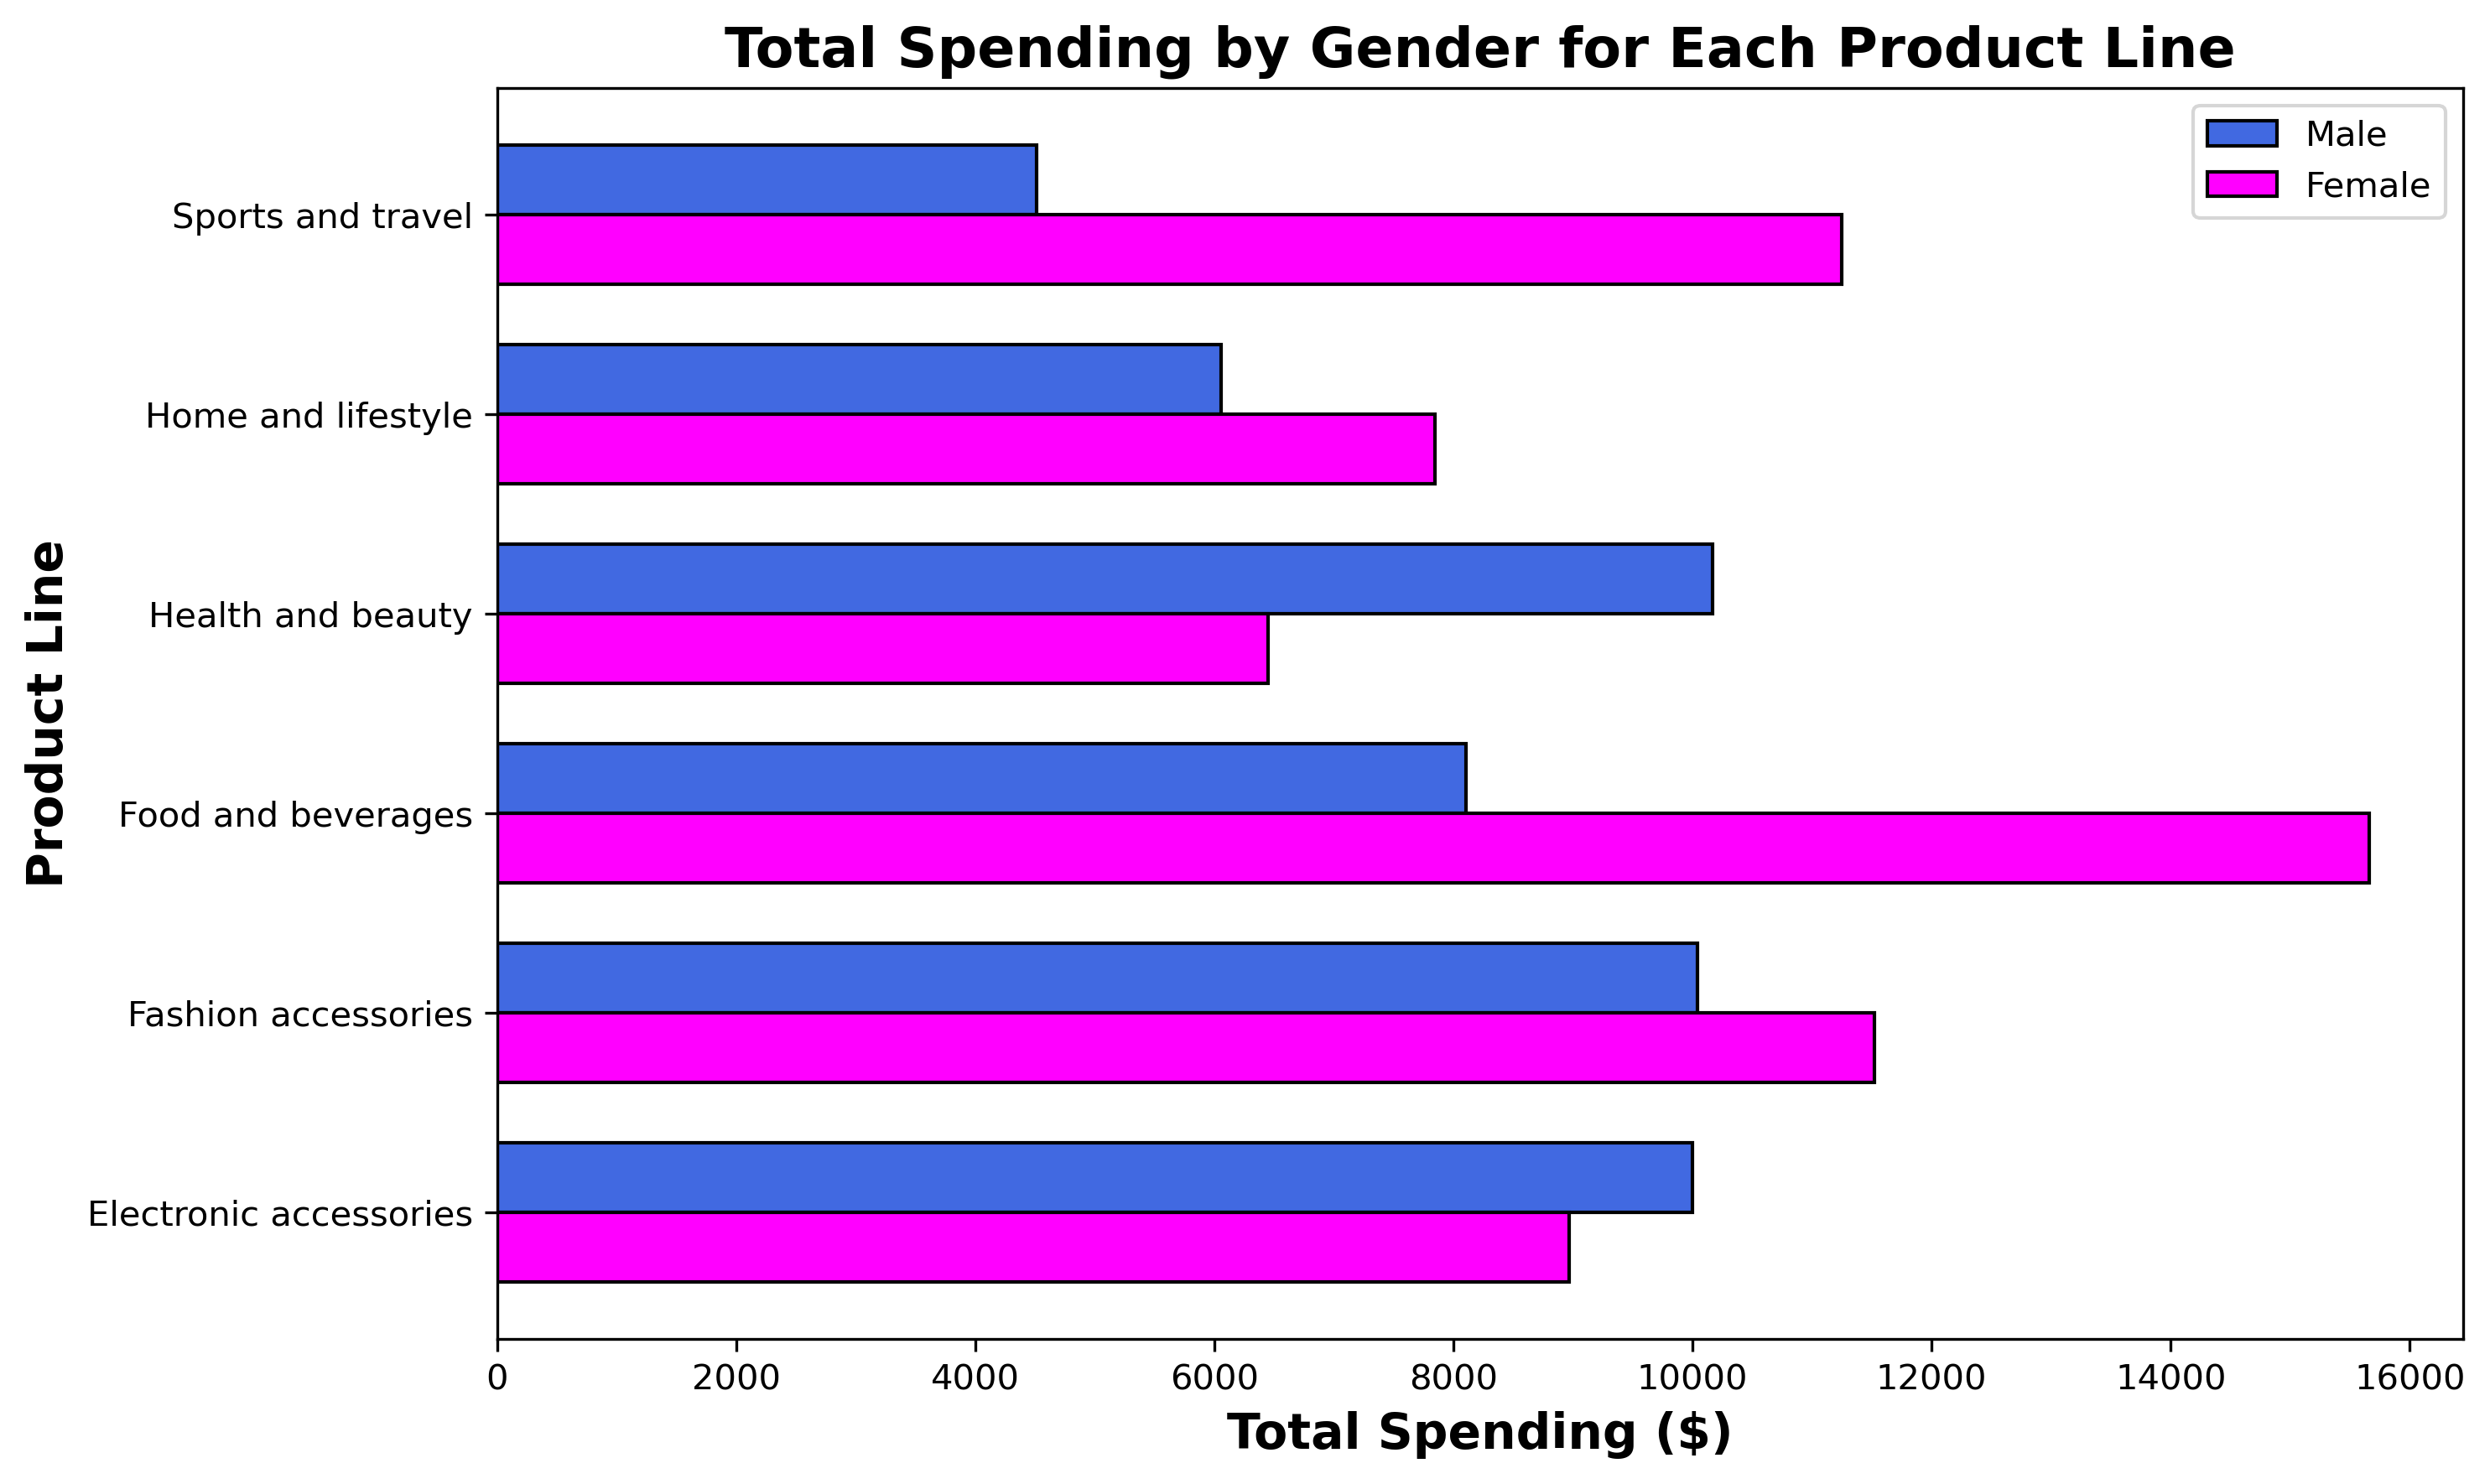

In [24]:
#Since we know that females spend more, but I want to see which gender prefers what product line

# Calculate the average rating for each product line in Branch C q
gender_product_line = branch_c_data.groupby(['Product line', 'Gender'])['Total'].sum().unstack()

#plt.figure(figsize = (10, 6), dpi = 300)

plt.figure(figsize=(10, 6), dpi = 300)

# We will have two sets of bars, one for Female and one for Male
bar_width = 0.35  # the width of the bars
index = gender_product_line.index
# For female, we can use the positions from 0 to the number of product lines
female_positions = range(len(index))
# For male, we add the bar width to the female positions to move them to the right
male_positions = [x + bar_width for x in female_positions]

# Plot Female bars
plt.barh(male_positions, gender_product_line['Male'], height = bar_width, label= 'Male', color = 'royalblue', edgecolor = 'black')

# Plot Male bars
plt.barh(female_positions, gender_product_line['Female'], height=bar_width, label= 'Female', color = 'fuchsia', edgecolor = 'black')

# Set the y-ticks to be in the middle of the two sets of bars
plt.yticks([r + bar_width / 2 for r in female_positions], gender_product_line.index)

plt.title('Total Spending by Gender for Each Product Line', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Spending ($)', fontsize= 14, fontweight = 'bold')
plt.ylabel('Product Line', fontsize= 14, fontweight = 'bold')

plt.legend()
plt.tight_layout()
plt.show()

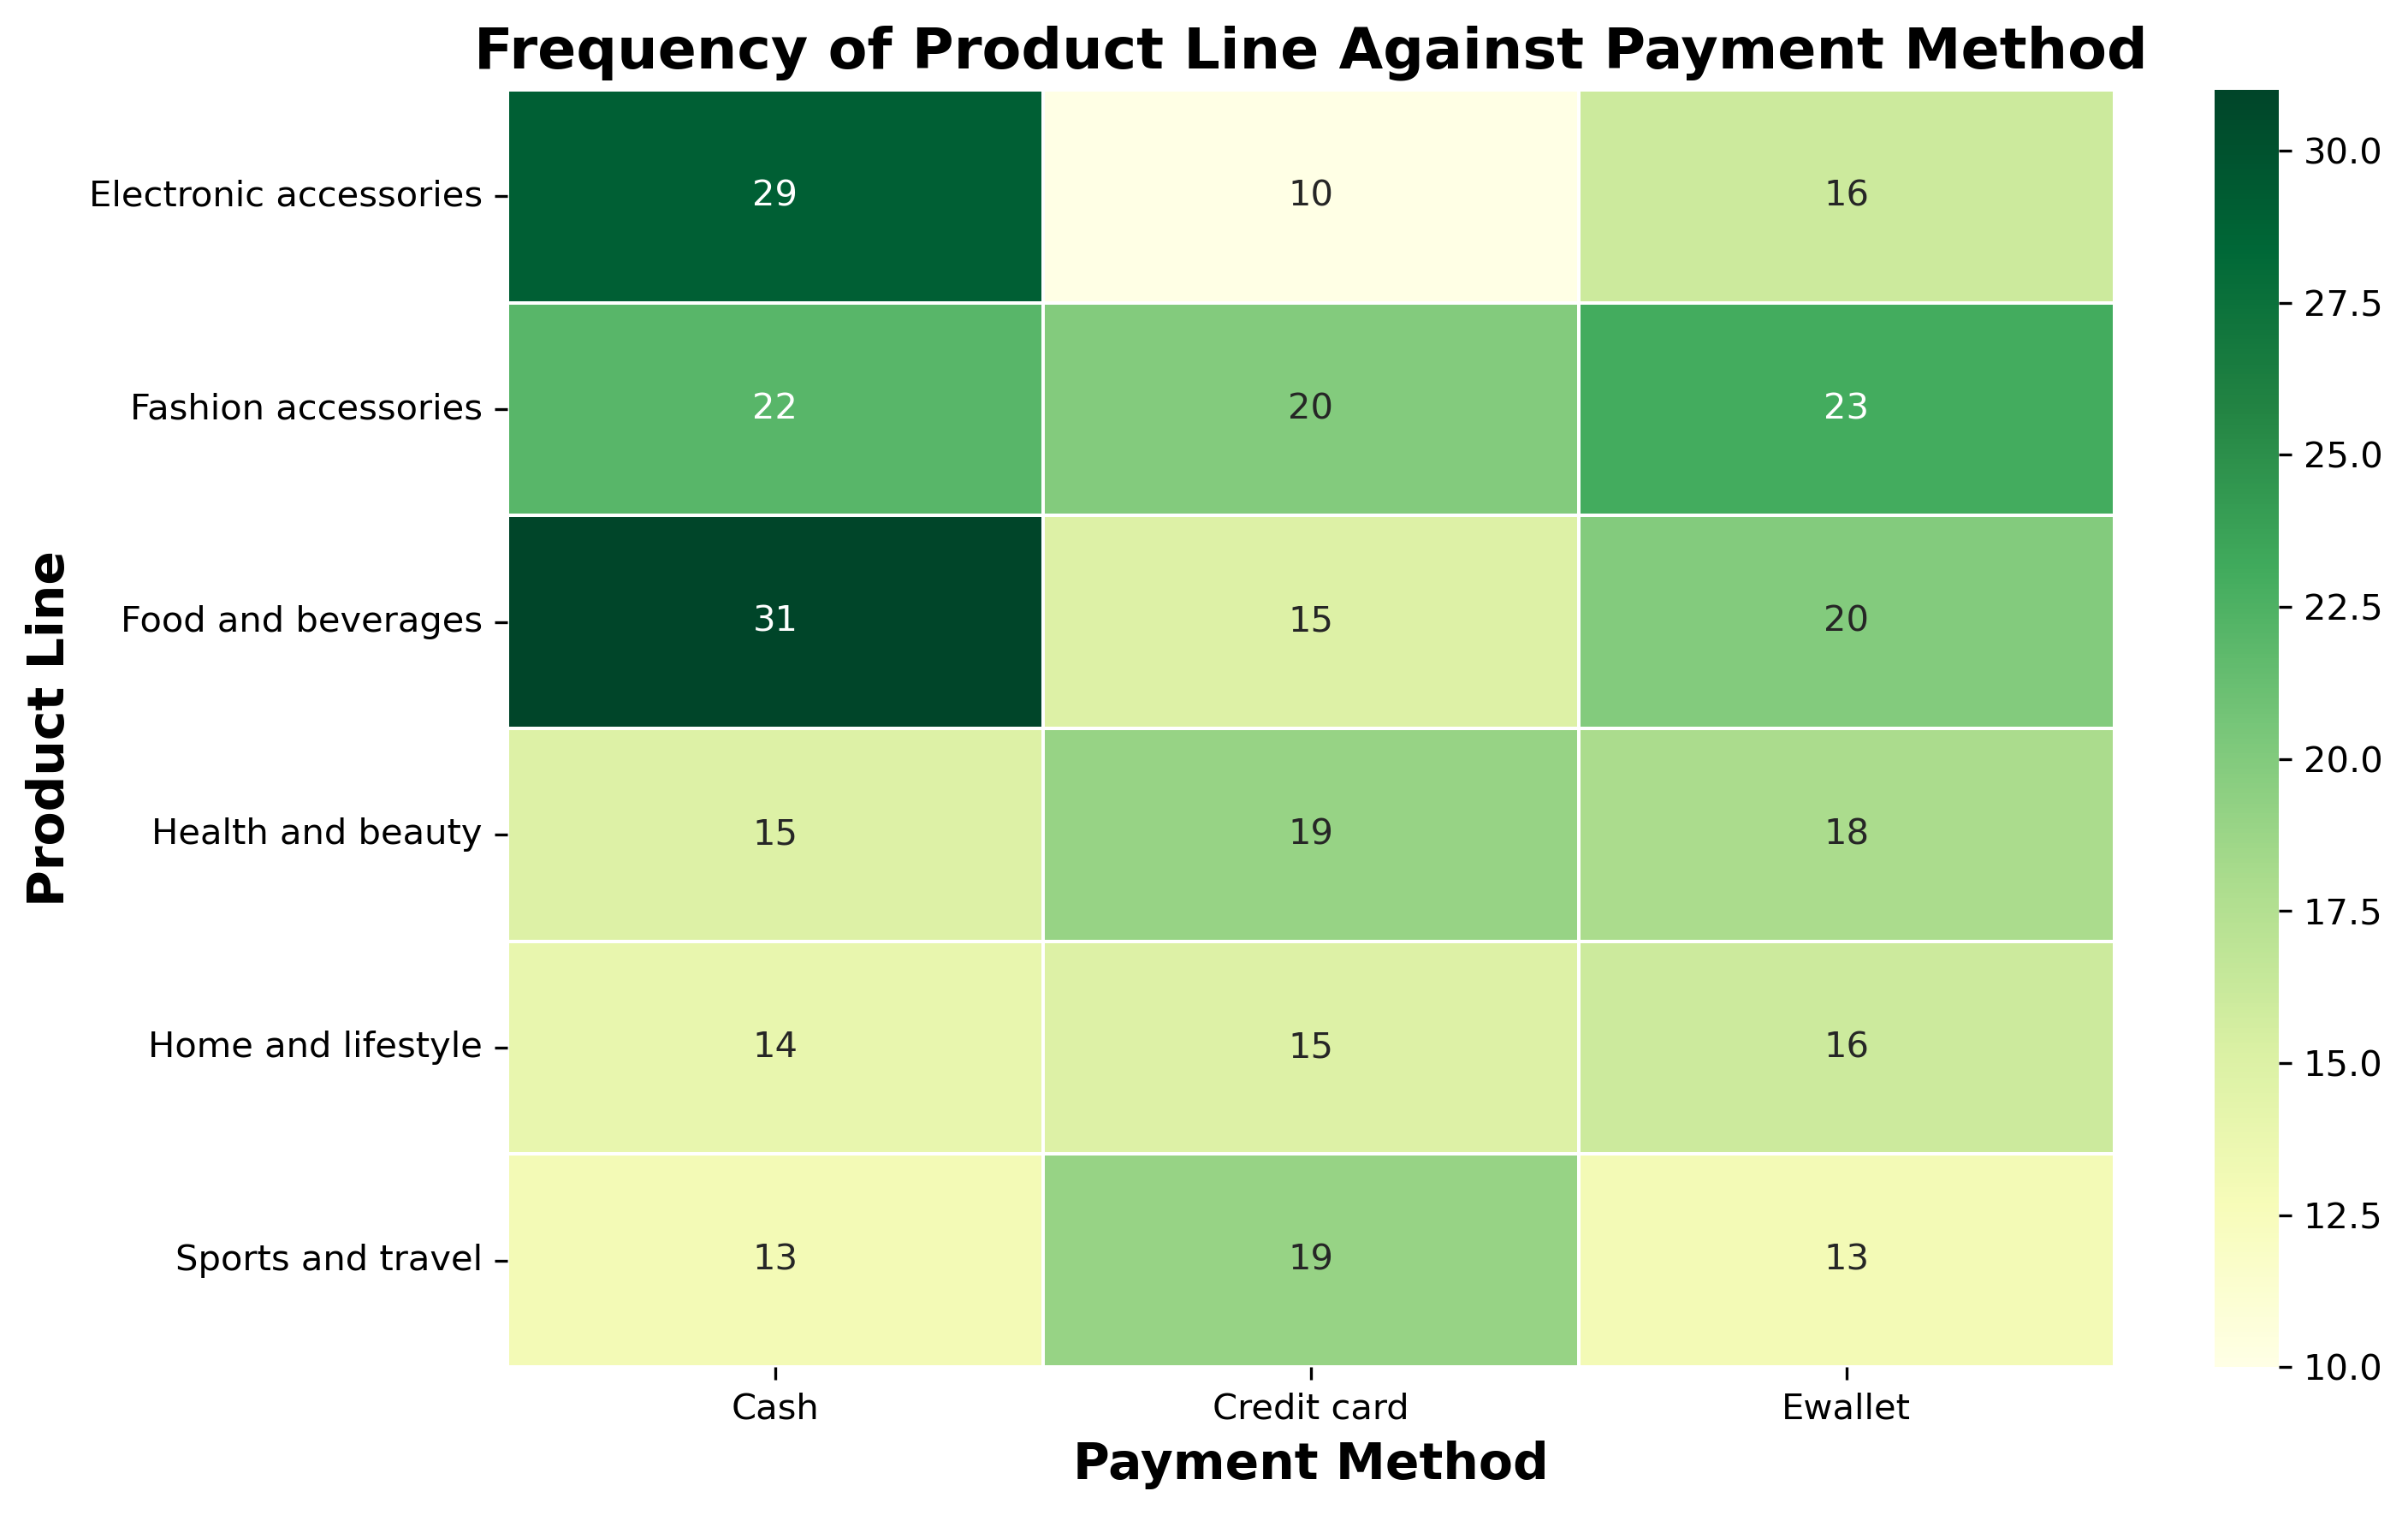

In [25]:
#I want to find out the relationship between product line and payment method 

rs_product_payment = branch_c_data.groupby(['Product line', 'Payment']).size().unstack()

plt.figure(figsize = (10, 6), dpi = 300)

sea.heatmap(rs_product_payment, annot = True, cmap = 'YlGn', linewidths = .5)

# Setting the title and labels
plt.title('Frequency of Product Line Against Payment Method', fontsize = 16, fontweight = 'bold')
plt.xlabel('Payment Method', fontsize = 14, fontweight = 'bold')
plt.ylabel('Product Line', fontsize = 14, fontweight = 'bold')

# Show the plot
plt.tight_layout()
plt.show()

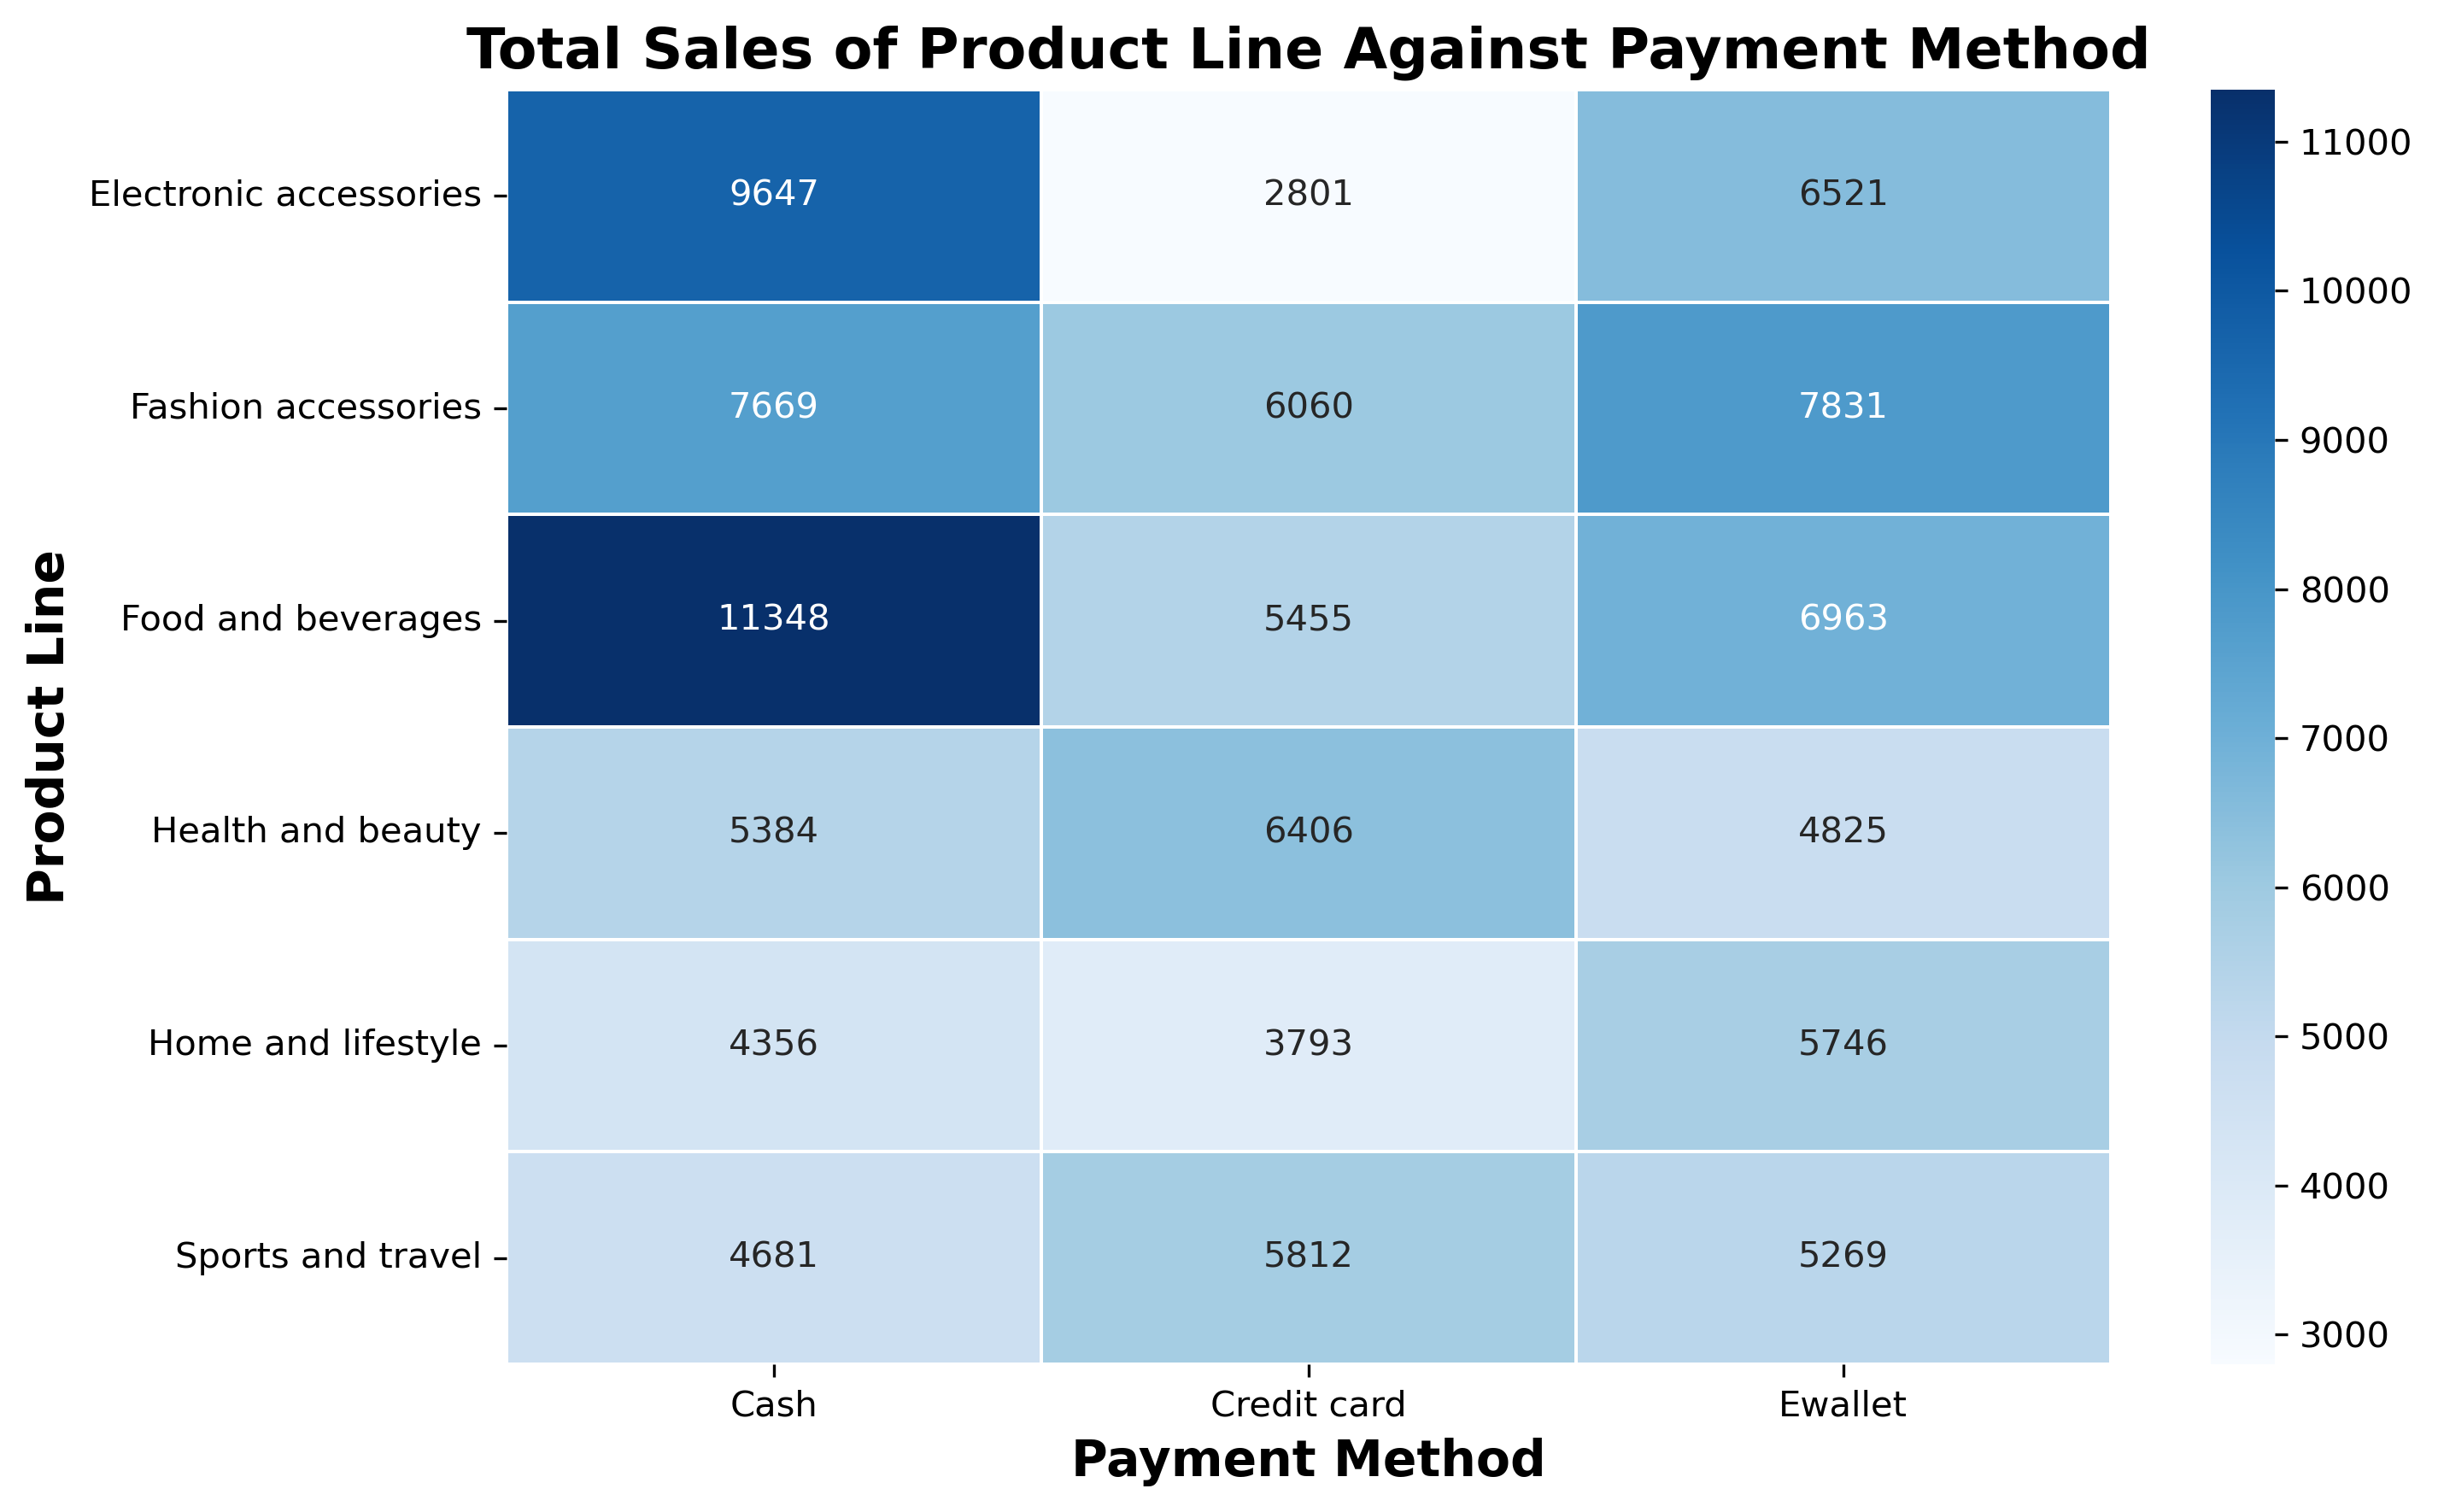

In [26]:
#I want to find out the relationship between payment method and sales 

rs_product_payment = branch_c_data.groupby(['Product line', 'Payment'])['Total'].sum().unstack()

plt.figure(figsize = (10, 6), dpi = 300)

sea.heatmap(rs_product_payment, annot = True, fmt = '.0f', cmap = 'Blues', linewidths = .5)

# Setting the title and labels
plt.title('Total Sales of Product Line Against Payment Method', fontsize = 16, fontweight = 'bold')
plt.xlabel('Payment Method', fontsize = 14, fontweight = 'bold')
plt.ylabel('Product Line', fontsize = 14, fontweight = 'bold')

# Show the plot
plt.tight_layout()
plt.show()

p-value: 7.126034181616563e-19


C:\Users\Aaron\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Aaron\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Aaron\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


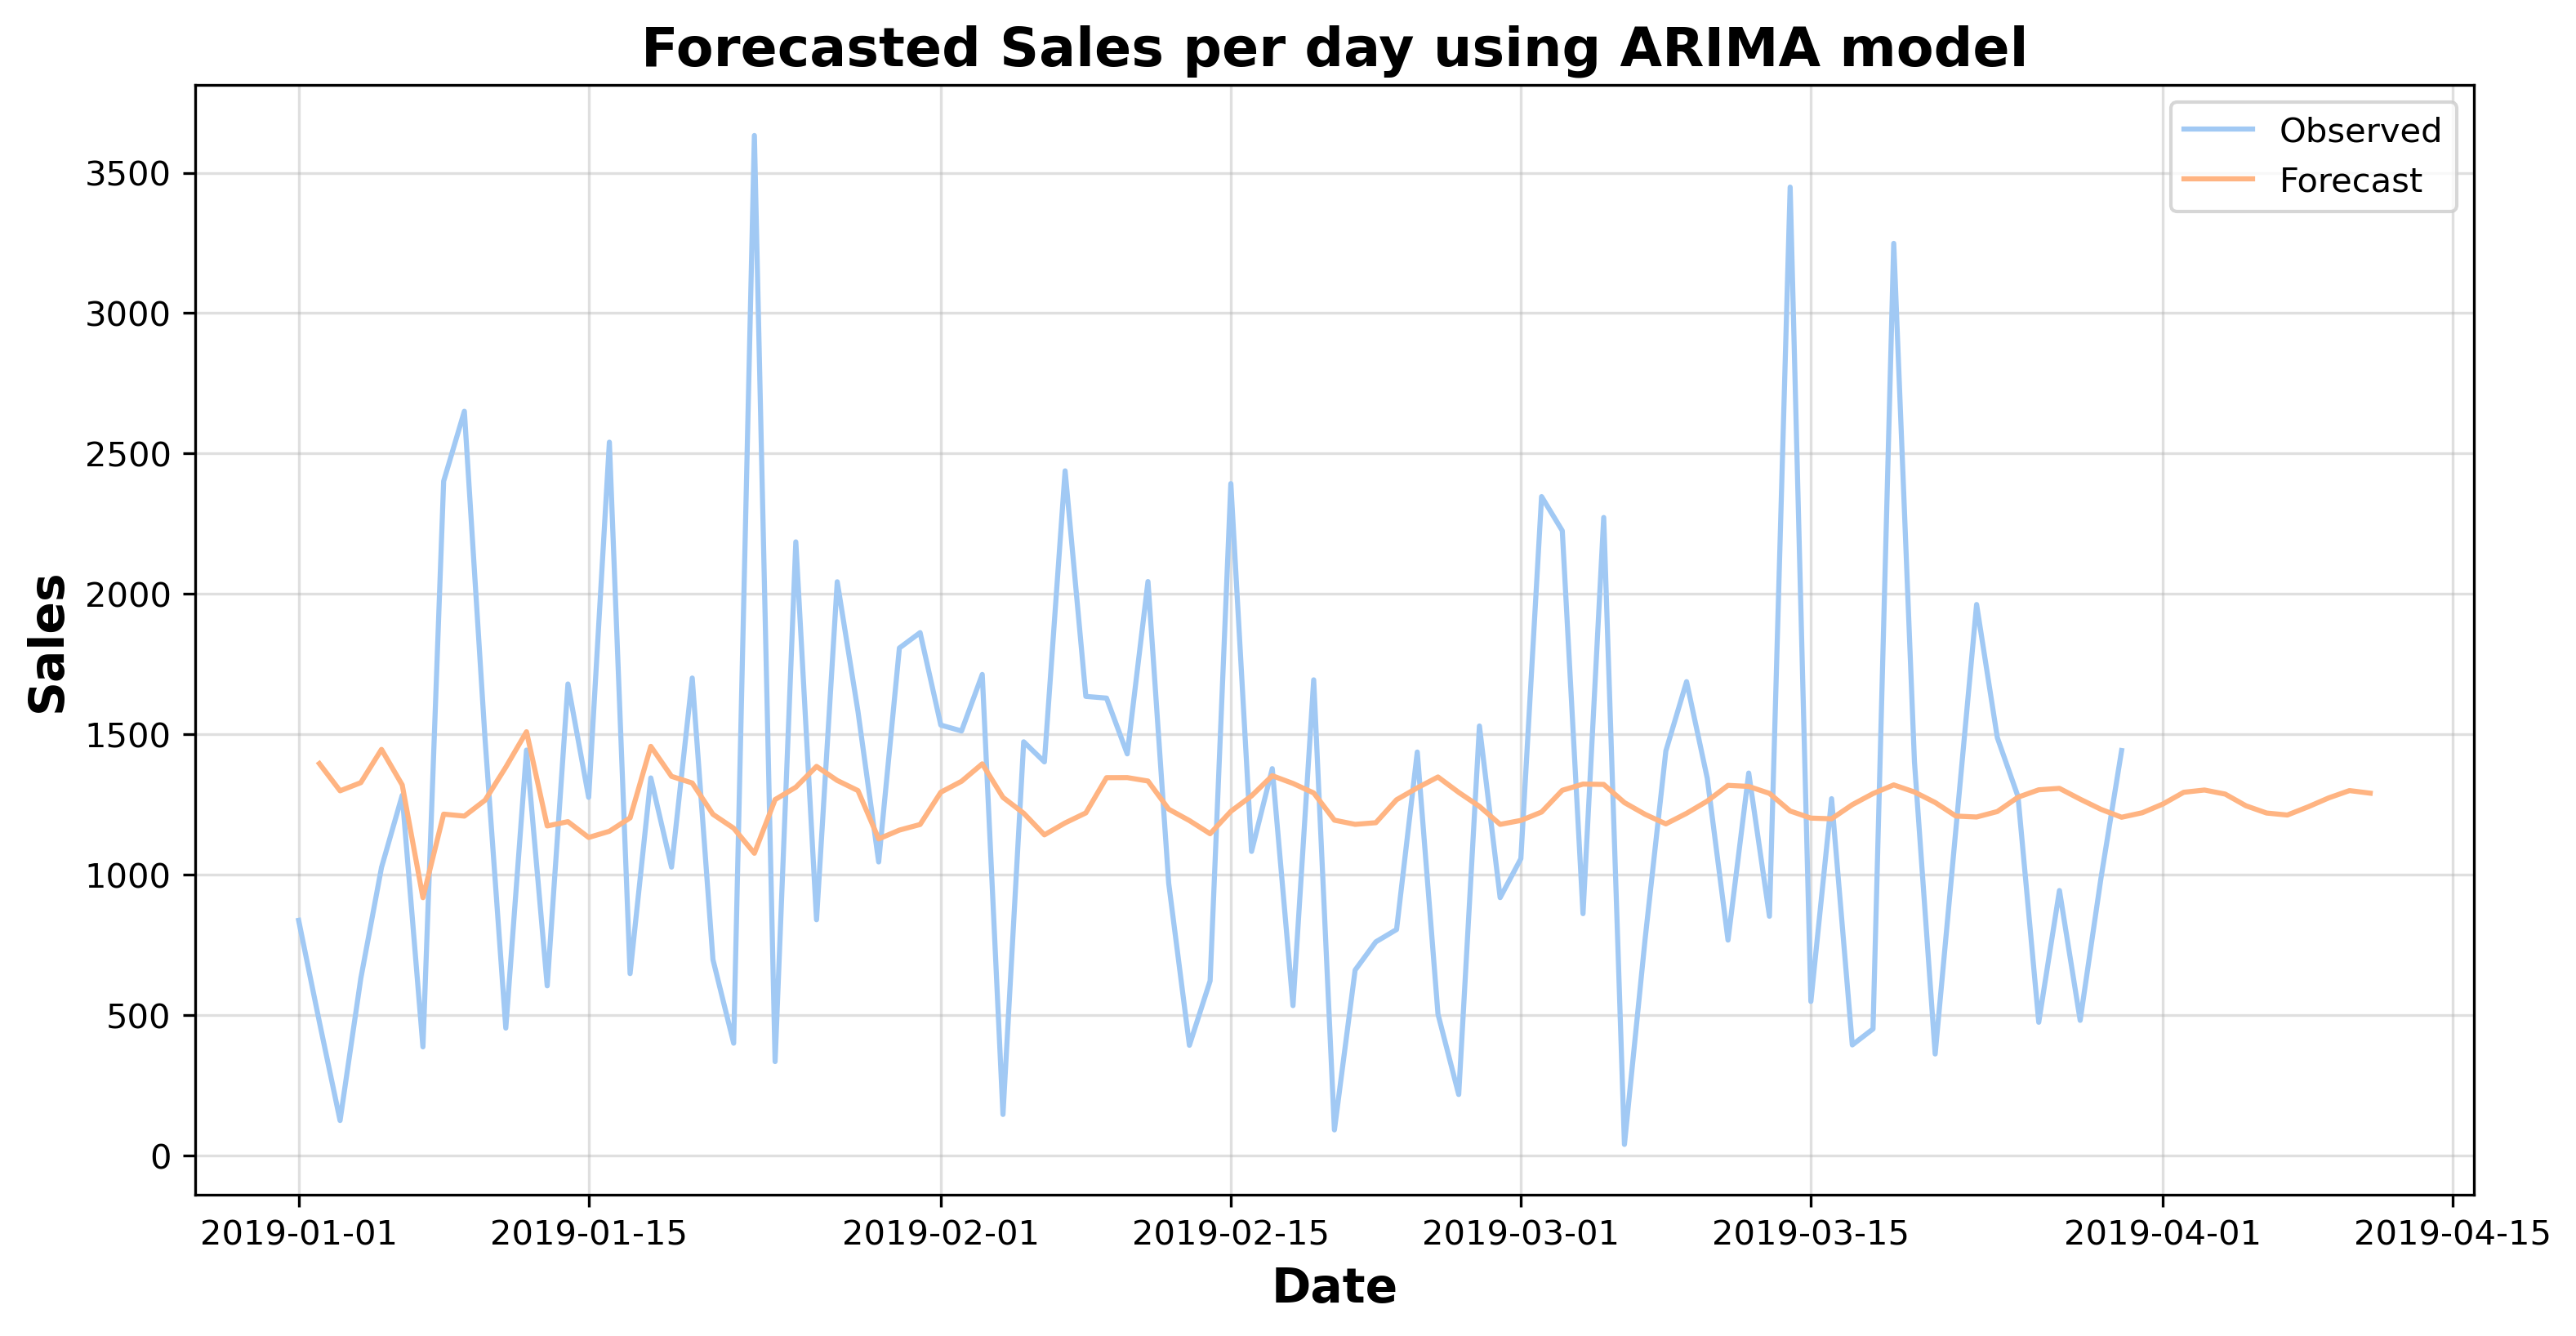

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

daily_sales = branch_c_data.groupby('Date')['Total'].sum().reset_index()

#Using the Augmented Dickey-Fuller test is a hypothesis testing that determines if the given time series is 
#stationary or not 

result = adfuller(daily_sales['Total'])
print('p-value:', result[1])

#Since p-value is less than 0.05, it is considered stationary so (p,d,q) -> d is 0

#determine parameter p n q with pacf and acf respectively 
#p is the number of autoregressive terms
#d is number of diffferences
#q is the number of moving average terms

model = ARIMA(daily_sales['Total'], order = (5, 0, 6))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps = 100)
#print(daily_sales['Date'])

last_date = daily_sales['Date'].iloc[1]
#print(type(last_date))

forecast_index = pd.date_range(start = last_date, periods = 100)
forecast_values = forecast.predicted_mean
plt.figure(figsize=(12, 6), dpi = 300)
plt.plot(daily_sales['Date'], daily_sales['Total'], label = 'Observed')
plt.plot(forecast_index, forecast_values, label = 'Forecast')

plt.title('Forecasted Sales per day using ARIMA model', fontweight = 'bold', fontsize = 16)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 14)
plt.xlabel('Date', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

<Figure size 4200x2100 with 0 Axes>

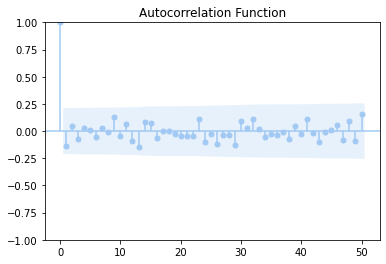

C:\Users\Aaron\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1008x504 with 0 Axes>

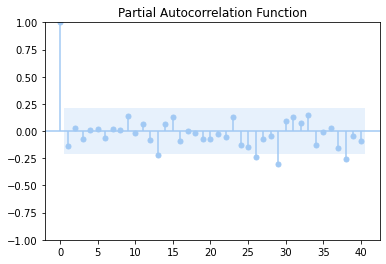

In [28]:
#Check the acf n pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot acf to find parameter q:
plt.figure(figsize=(14, 7), dpi = 300)
plot_acf(daily_sales['Total'], lags= 50, alpha = 0.05)  
plt.title('Autocorrelation Function')
plt.show()

# Plot pacf to find parameter p
plt.figure(figsize=(14, 7))
plot_pacf(daily_sales['Total'], lags = 40, alpha = 0.05)  # lags is the number of lags to show
plt.title('Partial Autocorrelation Function')
plt.show()
